In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




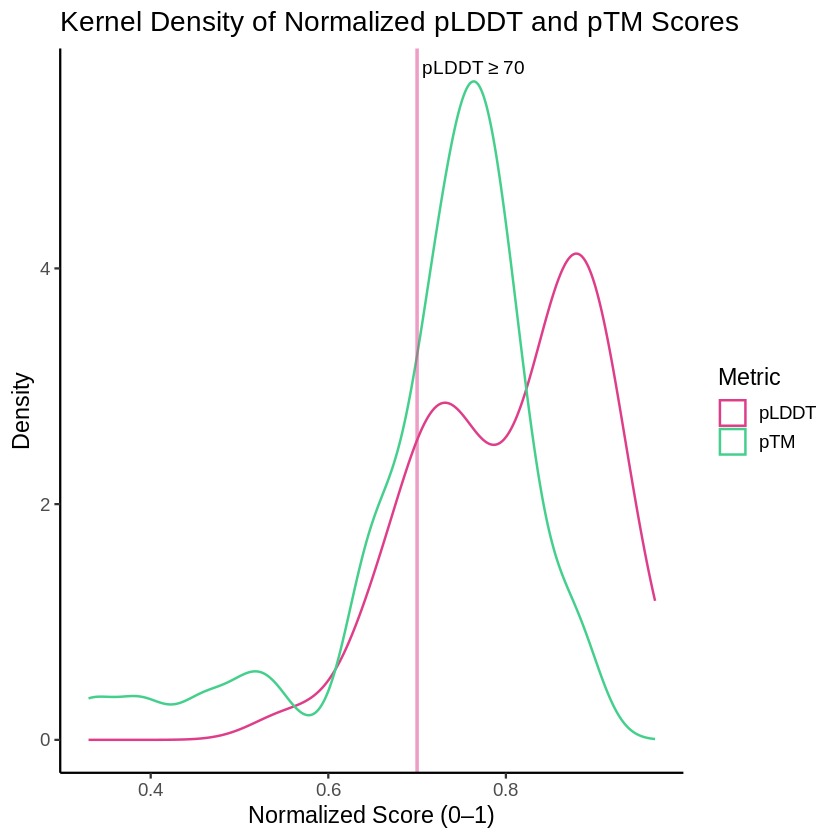

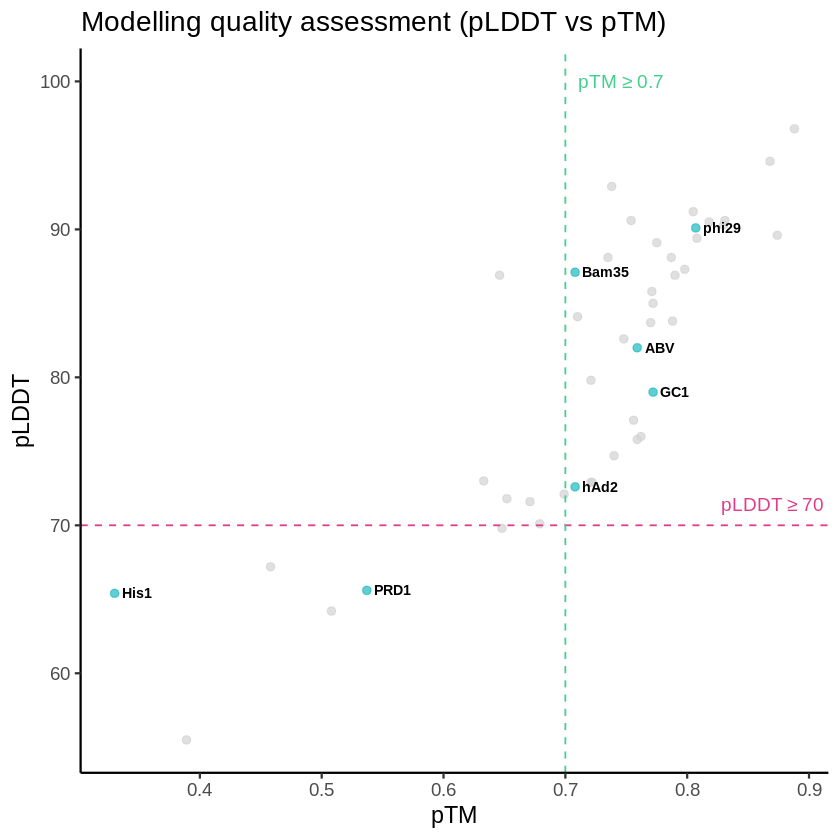

In [ ]:
AF <- read.csv("TP_pLDDT_pTM.csv", header = TRUE, sep = ',')
df_long <- AF %>%
  mutate(pLDDT = pLDDT / 100,) %>%     # Bring pLDDT to 0–1 scale
  pivot_longer(cols = c(pLDDT, pTM), names_to = "Metric", values_to = "Value")

# Step 2: Compute means and medians
stats <- df_long %>%
  group_by(Metric) %>%
  summarize(
    mean = mean(Value),
    median = median(Value)
  )

# Step 3: Plot
ggplot(df_long, aes(x = Value, fill = Metric, color = Metric)) +
  geom_density(alpha = 0, size = 0.7) +

  # Vertical lines for mean and median
  #geom_vline(data = stats, aes(xintercept = mean, color = Metric), linetype = "dashed", size = 1) +
  #geom_vline(data = stats, aes(xintercept = median, color = Metric), linetype = "dotted", size = 1) +

  # Highlight threshold for pLDDT >= 0.8
  geom_vline(xintercept = 0.7, linetype = "solid", color = "#de3e89", size = 1, alpha = 0.5) +
  annotate("text", x = 0.705, y = Inf, label = "pLDDT ≥ 70", vjust = 2, hjust = 0, color = "black", size = 4) +
  scale_color_manual(values = c("pLDDT" = "#de3e89", "pTM" = "#44cf8c")) +
  labs(
    x = "Normalized Score (0–1)",
    y = "Density",
    title = "Kernel Density of Normalized pLDDT and pTM Scores"
  ) +
  theme_classic(base_size = 14)

highlight_acronyms <- c("phi29", "PRD1", "GC1", "viph1008o", "hAd2", "Bam35", "ABV", "His1")
AF$highlight <- ifelse(AF$Acronym %in% highlight_acronyms, "Highlight", "Normal")

ggplot(AF, aes(x = pTM, y = pLDDT)) +
  geom_point(alpha = 0.7, color = "lightgrey", size = 2) +
  geom_point(data = subset(AF, highlight == "Highlight"),
            aes(x = pTM, y = pLDDT),
            color = "#0ec2c7", size = 2, alpha = 0.6) +
  geom_text(data = subset(AF, highlight == "Highlight"),
          aes(x = pTM + 0.006, y = pLDDT, label = Acronym),
          size = 3,
          fontface = "bold",
          hjust = 0,
          color = "black") +
  geom_hline(yintercept = 70, linetype = "dashed", color = "#de3e89") +
  geom_vline(xintercept = 0.7, linetype = "dashed", color = "#44cf8c") +
  annotate("text", x = 0.71, y = 100, label = "pTM ≥ 0.7", hjust = 0, color = "#44cf8c", size = 4) +
  annotate("text", x = 0.87, y = 71, label = "pLDDT ≥ 70", vjust = 0, color = "#de3e89", size = 4) +
  labs(
    x = "pTM",
    y = "pLDDT",
    title = "Modelling quality assessment (pLDDT vs pTM)"
  ) +
  theme_classic(base_size = 14)

#**Charge density distribution asymmetry**

In [ ]:
library('ggplot2')
install.packages("effectsize")
library('effectsize')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘parameters’, ‘performance’, ‘datawizard’




Df  Sum Sq       Mean Sq      F value   Pr(>F)   
Nature      1 0.0001211442 0.0001211442 0.4807899 0.4887554
Residuals 233 0.0587087803 0.0002519690        NA        NA


	Wilcoxon rank sum test with continuity correction

data:  Score by Nature
W = 5505, p-value = 0.005101
alternative hypothesis: true location shift is not equal to 0


r_rank_biserial CI   CI_low     CI_high  
1 0.2663906       0.95 0.08632166 0.4296051

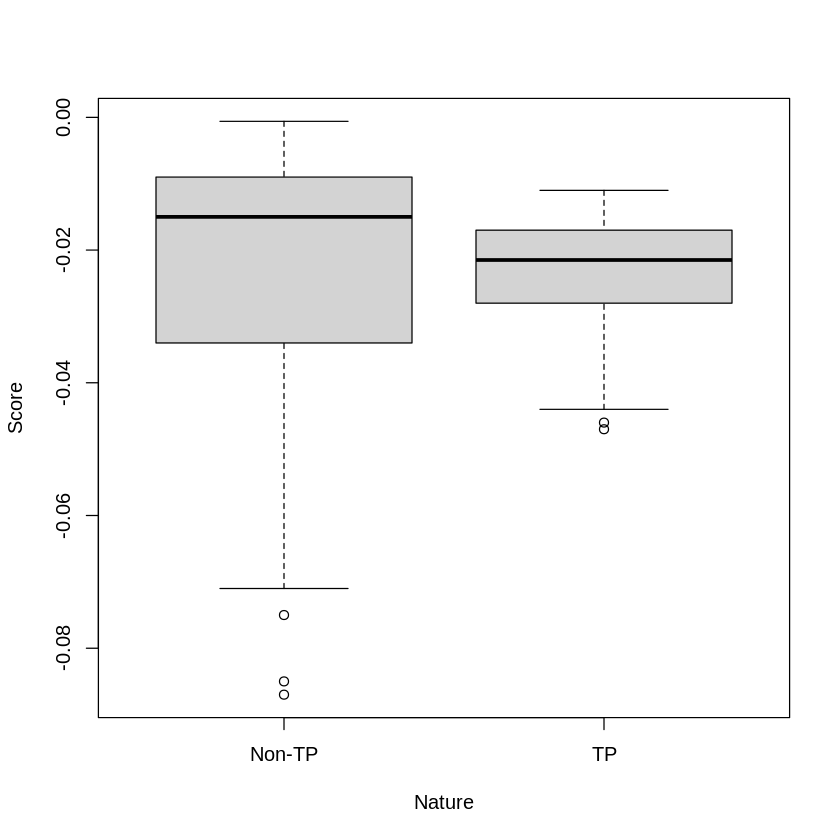

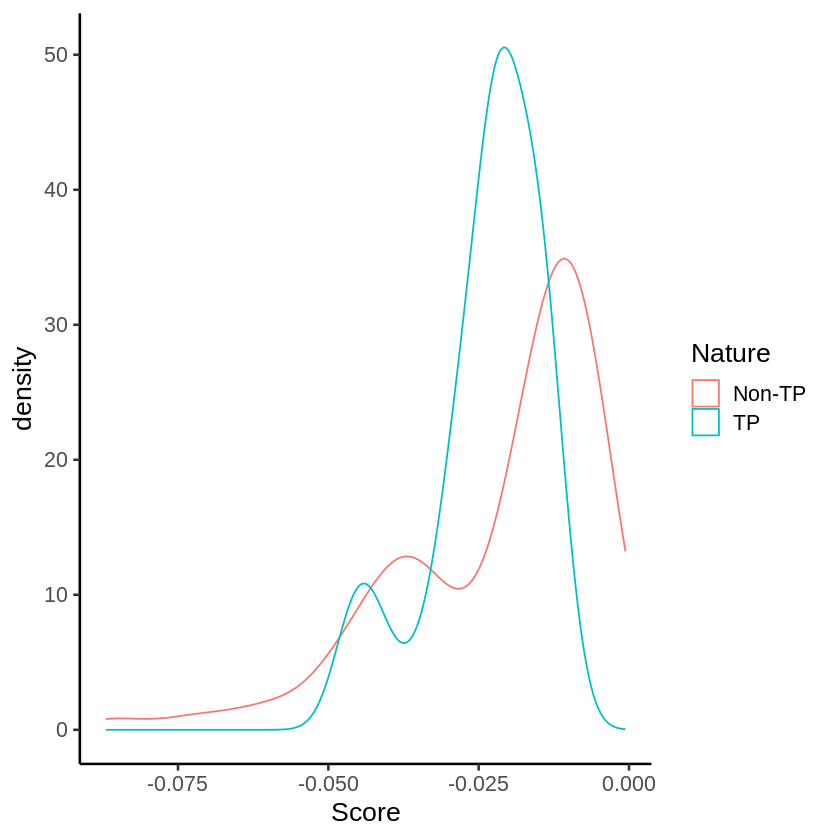

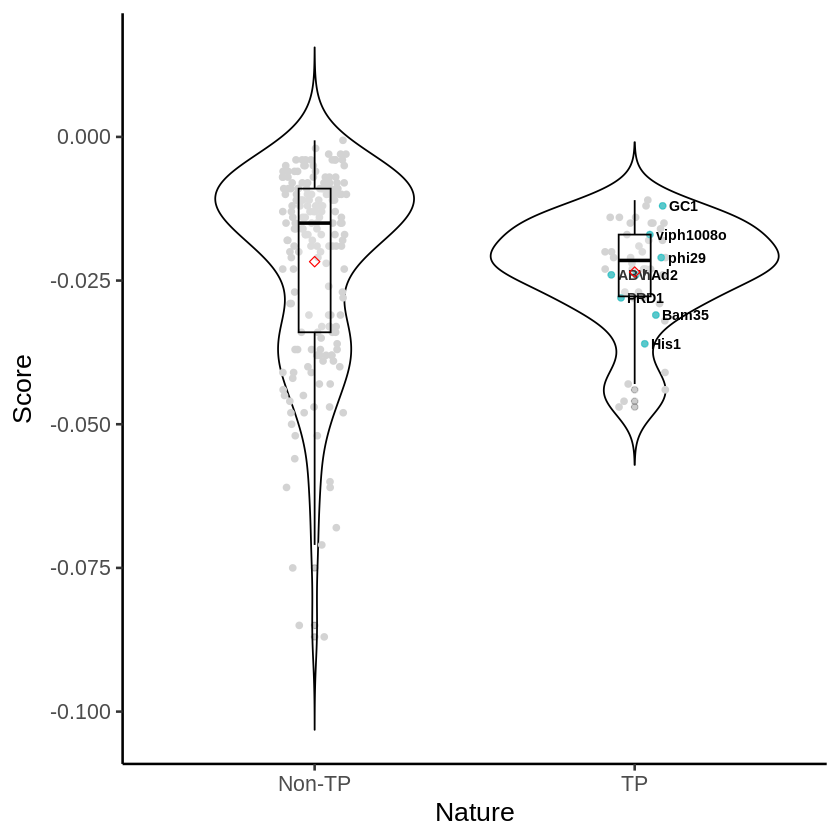

In [ ]:
TP <- read.csv("BaitTP.csv", header = TRUE, sep = ',')
cosa <- lm(Score ~ Nature, data = TP)
anova(cosa)
wilcox.test(Score ~ Nature, data = TP)
rank_biserial(Score ~ Nature, data = TP)
boxplot(Score ~ Nature, data = TP)

highlight_acronyms <- c("phi29", "PRD1", "GC1", "viph1008o", "hAd2", "Bam35", "ABV", "His1")
TP$highlight <- ifelse(TP$Acronym %in% highlight_acronyms, "Highlight", "Normal")


p <- ggplot(TP, aes(x=Score, color=Nature)) + geom_density() + theme_classic(base_size = 16)
p


set.seed(42)  # For reproducibility
TP$jittered_x <- as.numeric(factor(TP$Nature)) + runif(nrow(TP), -0.1, 0.1)
ggplot(TP, aes(x = Nature, y = Score)) +
  geom_violin(trim = FALSE, fill = "white", color = "black") +
  # All points (use jittered_x for position)
  geom_point(aes(x = jittered_x), color = "lightgrey", size = 1.5) +

  # Highlighted points
  geom_point(data = subset(TP, highlight == "Highlight"),
             aes(x = jittered_x),
             color = "#0ec2c7", size = 1.5, alpha = 0.6) +

  # Labels beside points
  geom_text(data = subset(TP, highlight == "Highlight"),
            aes(x = jittered_x + 0.02, y = Score, label = Acronym),
            size = 3,
            fontface = "bold",
            hjust = 0,
            color = "black") +

  # Clean theme
  scale_x_discrete(labels = levels(factor(TP$Nature))) +
  geom_boxplot(width = 0.1, color = "black", alpha = 0.2) +
  stat_summary(fun=mean, geom="point", shape=23, size=2, color="red") +
  theme_classic(base_size = 16)


r (rank biserial) |       95% CI
--------------------------------
0.27              | [0.09, 0.43]


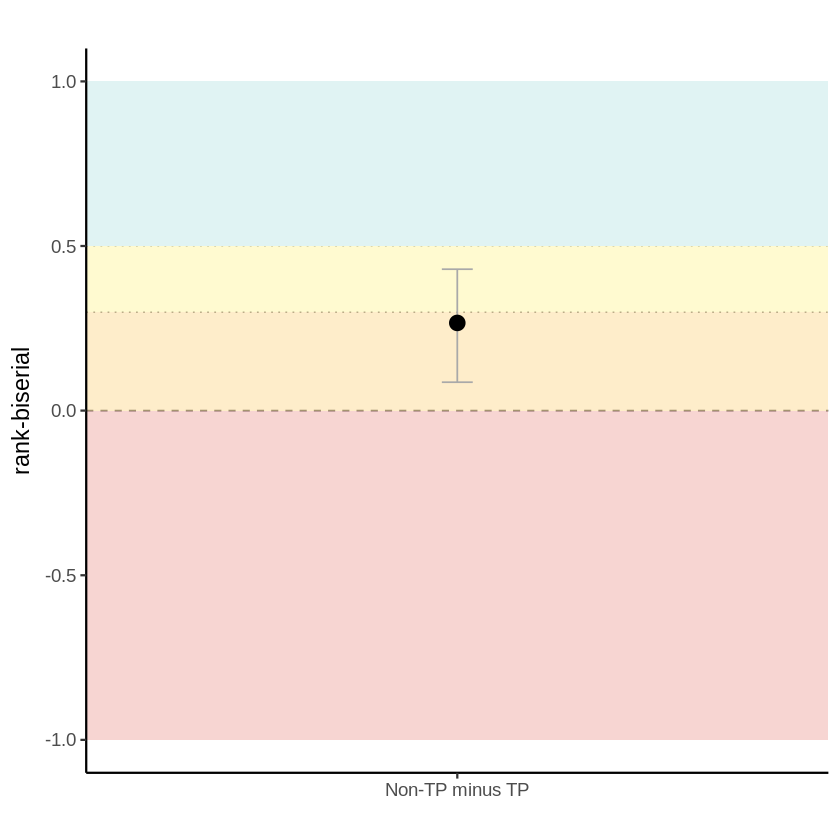

In [ ]:
# Rank-biserial correlation
rb <- rank_biserial(Score ~ Nature, data = TP)
print(rb)
rb_value <- rb$r_rank_biserial
ci_low <- rb$CI_low
ci_high <- rb$CI_high
df_rb <- data.frame(
  r = rb_value,
  CI_low = ci_low,
  CI_high = ci_high
)

ggplot(df_rb, aes(x = "Non-TP minus TP", y = r)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  geom_hline(yintercept = 0.3, linetype = "dotted", color = "gray50") +
  geom_hline(yintercept = 0.5, linetype = "dotted", color = "gray50") +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = 0.3, ymax = 0.5, fill = "#fff7bc", alpha = 0.7) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = 0, ymax = 0.3, fill = "#fec44f", alpha = 0.3) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = 0.5, ymax = 1, fill = "#e0f3f3", alpha = 1) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = -1, ymax = 0, fill = "#d7301f", alpha = 0.2) +
  geom_errorbar(aes(ymin = CI_low, ymax = CI_high), width = 0.05, color = "darkgrey") +
  geom_point(size = 4, color = "black") +
  ylim(-1, 1) +
  labs(title = "",
       y = "rank-biserial", x = "") +
  theme_classic(base_size = 14)

In [ ]:
install.packages("Durga")
library('Durga')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vipor’




Bootstrapped effect size
  Score ~ Nature
Groups:
              mean  median          sd          se    CI.lower    CI.upper   n
Non-TP -0.02171217 -0.0150 0.017084786 0.001242735 -0.02426504 -0.01935624 189
TP     -0.02352174 -0.0215 0.009229757 0.001360853 -0.02678261 -0.02124833  46
Unpaired Cohen's d (R = 1000, bootstrap CI method = bca):
  TP - Non-TP: -0.131788, 95% CI [-0.423679, 0.120719]

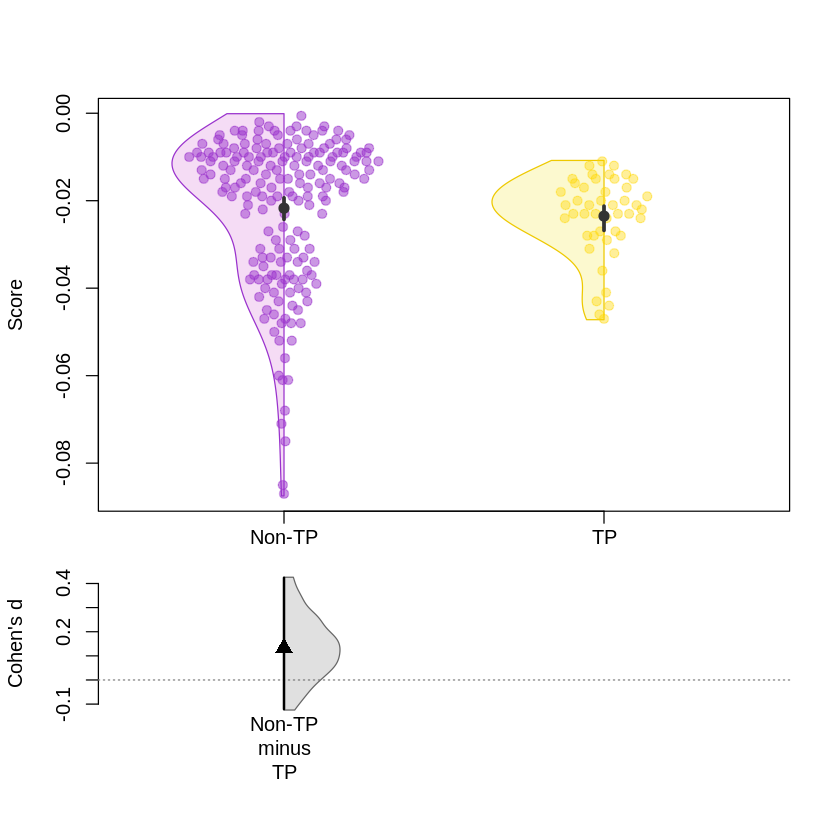

In [ ]:
d_TP = DurgaDiff(Score ~ Nature, data = TP, na.action = na.exclude, effect.type = 'cohens d')
d_TP
DurgaPlot(d_TP, points = c(DurgaTransparent("darkorchid", .5), DurgaTransparent("gold", .6)), violin = c("darkorchid3", "gold2"), violin.fill = c("#f5dcf5", "#fcf9cf"), ef.size.position = "below")

#**Secondary structure composition**

In [ ]:
library('ggplot2')

In [ ]:
install.packages("Durga")
library('Durga')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘vipor’




##Helices

Df  Sum Sq    Mean Sq   F value  Pr(>F)    
Nature      1  2111.128 2111.1281 5.018266 0.02603309
Residuals 231 97179.097  420.6887       NA         NA


	Wilcoxon rank sum test with continuity correction

data:  Helix by Nature
W = 3349.5, p-value = 0.03026
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Missing values detected. NAs dropped.”


r_rank_biserial CI   CI_low     CI_high    
1 -0.208156       0.95 -0.3794689 -0.02304308

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


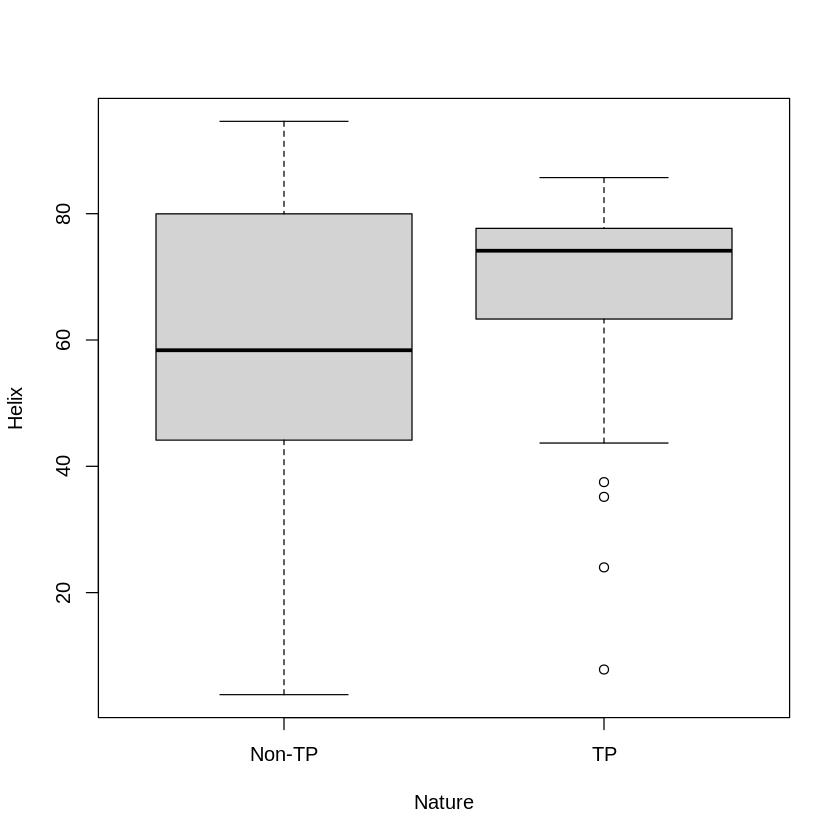

Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_summary()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


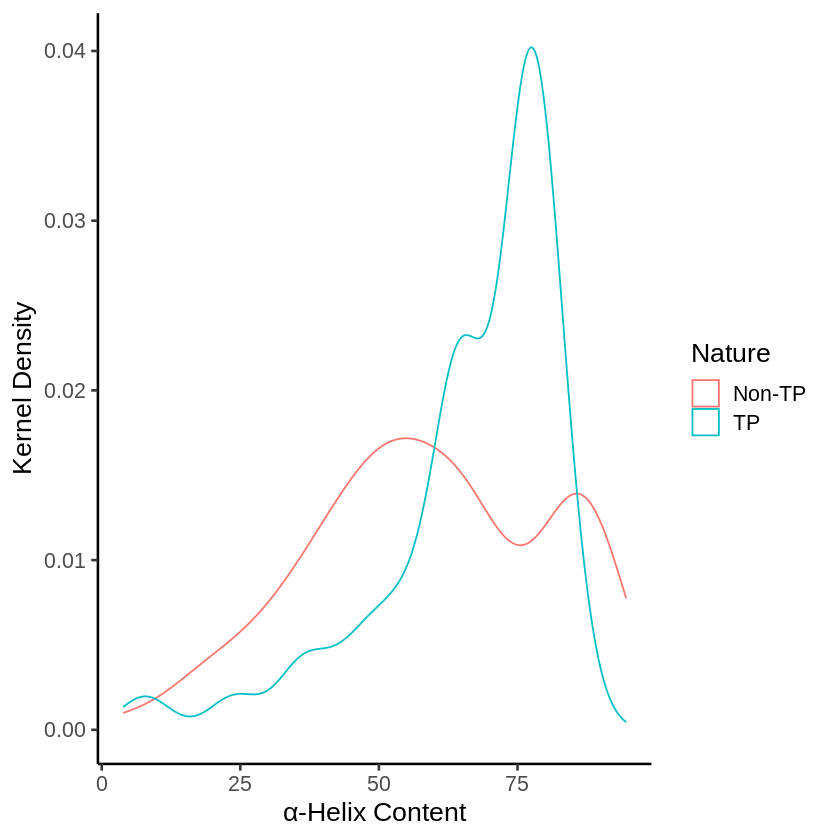

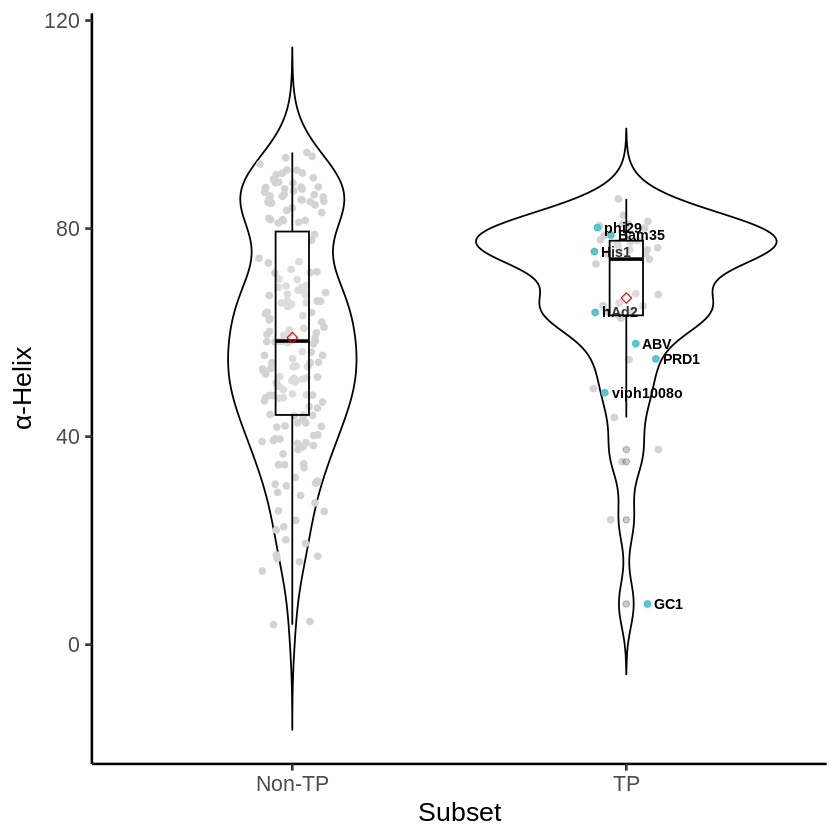

In [ ]:
TP <- read.csv("secondary.csv", header = TRUE, sep = ',')
h <- lm(Helix ~ Nature, data = TP)
anova(h)
wilcox.test(Helix ~ Nature, data = TP)
rank_biserial(Helix ~ Nature, data = TP)
boxplot(Helix ~ Nature, data = TP)

p <- ggplot(TP, aes(x=Helix, color=Nature)) + geom_density() + labs(x = "α-Helix Content", y = "Kernel Density") + theme_classic(base_size = 16)
p


highlight_acronyms <- c("phi29", "PRD1", "GC1", "viph1008o", "hAd2", "Bam35", "ABV", "His1")
TP$highlight <- ifelse(TP$Acronym %in% highlight_acronyms, "Highlight", "Normal")

set.seed(12)  # For reproducibility
TP$jittered_x <- as.numeric(factor(TP$Nature)) + runif(nrow(TP), -0.1, 0.1)

ggplot(TP, aes(x = Nature, y = Helix)) +
  geom_violin(trim = FALSE, fill = "white", color = "black") +
  geom_point(aes(x = jittered_x), color = "lightgrey", size = 1.5) +
  geom_point(data = subset(TP, highlight == "Highlight"),
             aes(x = jittered_x),
             color = "#0ec2c7", size = 1.5, alpha = 0.6) +
  geom_text(data = subset(TP, highlight == "Highlight"),
            aes(x = jittered_x + 0.02, y = Helix, label = Acronym),
            size = 3,
            fontface = "bold",
            hjust = 0,
            color = "black") +
  labs(x = "Subset", y = "α-Helix") +
  scale_x_discrete(labels = levels(factor(TP$Nature))) +
  geom_boxplot(width = 0.1, color = "black", alpha = 0.2) +
  stat_summary(fun=mean, geom="point", shape=23, size=2, color="red") +
  theme_classic(base_size = 16)

Warning message:
“Missing values detected. NAs dropped.”


r (rank biserial) |         95% CI
----------------------------------
-0.21             | [-0.38, -0.02]


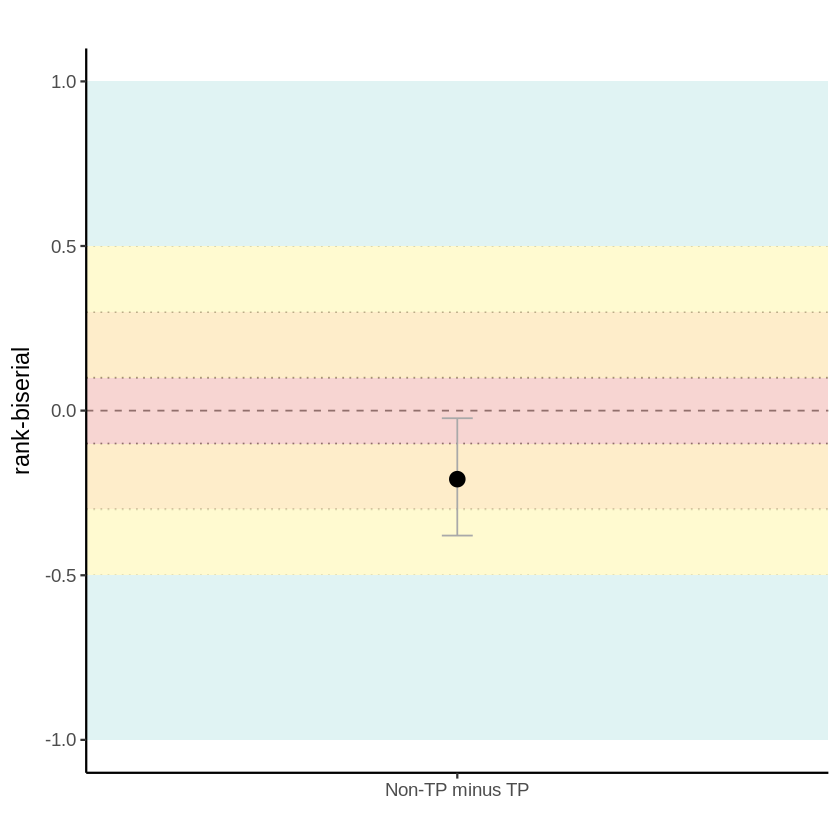

In [ ]:
# Rank-biserial correlation
rb <- rank_biserial(Helix ~ Nature, data = TP)
print(rb)
rb_value <- rb$r_rank_biserial
ci_low <- rb$CI_low
ci_high <- rb$CI_high
df_rb <- data.frame(
  r = rb_value,
  CI_low = ci_low,
  CI_high = ci_high
)

ggplot(df_rb, aes(x = "Non-TP minus TP", y = r)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  geom_hline(yintercept = 0.3, linetype = "dotted", color = "gray50") +
  geom_hline(yintercept = 0.5, linetype = "dotted", color = "gray50") +
  geom_hline(yintercept = 0.1, linetype = "dotted", color = "gray50") +
  geom_hline(yintercept = -0.1, linetype = "dotted", color = "gray50") +
  geom_hline(yintercept = -0.3, linetype = "dotted", color = "gray50") +
  geom_hline(yintercept = -0.5, linetype = "dotted", color = "gray50") +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = 0.3, ymax = 0.5, fill = "#fff7bc", alpha = 0.7) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = 0.1, ymax = 0.3, fill = "#fec44f", alpha = 0.3) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = 0.5, ymax = 1, fill = "#e0f3f3", alpha = 1) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = -0.1, ymax = 0.1, fill = "#d7301f", alpha = 0.2) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = -0.5, ymax = -0.3, fill = "#fff7bc", alpha = 0.7) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = -0.3, ymax = -0.1, fill = "#fec44f", alpha = 0.3) +
  annotate("rect", xmin = -Inf, xmax = Inf, ymin = -1, ymax = -0.5, fill = "#e0f3f3", alpha = 1) +
  geom_errorbar(aes(ymin = CI_low, ymax = CI_high), width = 0.05, color = "darkgrey") +
  geom_point(size = 4, color = "black") +
  ylim(-1, 1) +
  labs(title = "",
       y = "rank-biserial", x = "") +
  theme_classic(base_size = 14)

Bootstrapped effect size
  Helix ~ Nature
Groups:
           mean   median       sd       se CI.lower CI.upper   n
Non-TP 59.03213 58.38157 21.33867 1.556282 55.95849 61.83093 188
TP     66.65731 74.13793 16.53560 2.464981 60.68368 70.63346  45
Unpaired Cohen's d (R = 1000, bootstrap CI method = bca):
  TP - Non-TP: 0.399458, 95% CI [0.0774323, 0.75648]

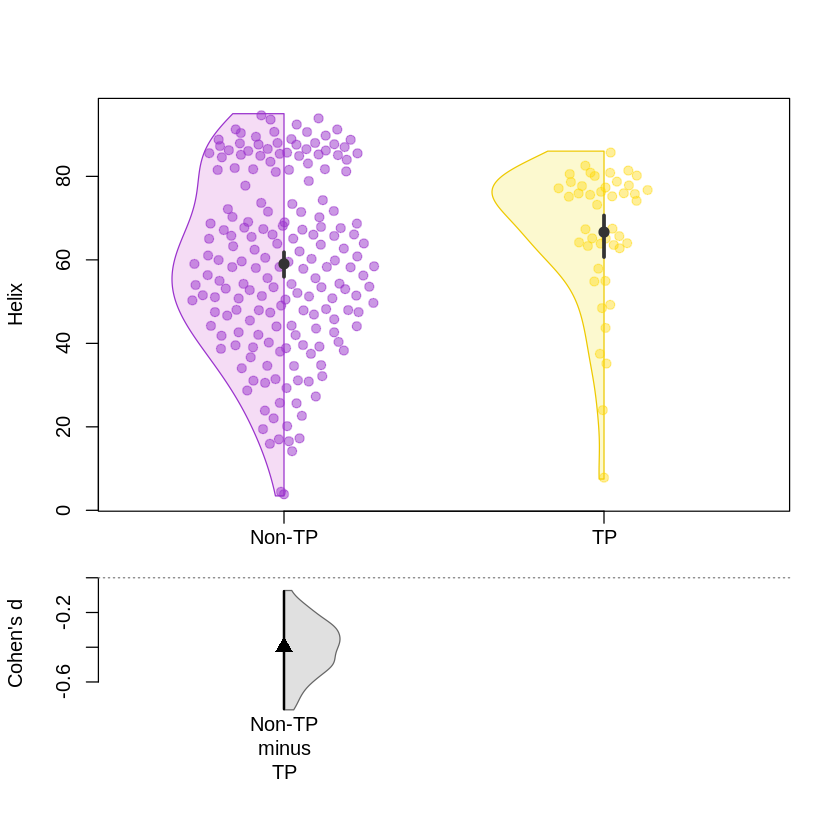

In [ ]:
h_TP = DurgaDiff(Helix ~ Nature, data = TP, na.action = na.exclude, effect.type = 'cohens d')
h_TP
DurgaPlot(h_TP, points = c(DurgaTransparent("darkorchid", .5), DurgaTransparent("gold", .6)), violin = c("darkorchid3", "gold2"), violin.fill = c("#f5dcf5", "#fcf9cf"), ef.size.position = "below")

##Sheets

Df  Sum Sq     Mean Sq  F value Pr(>F)   
Nature      1   286.6156 286.6156 1.24612 0.2654546
Residuals 231 53131.4683 230.0064      NA        NA


	Wilcoxon rank sum test with continuity correction

data:  Sheet by Nature
W = 4505, p-value = 0.4975
alternative hypothesis: true location shift is not equal to 0


Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_summary()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


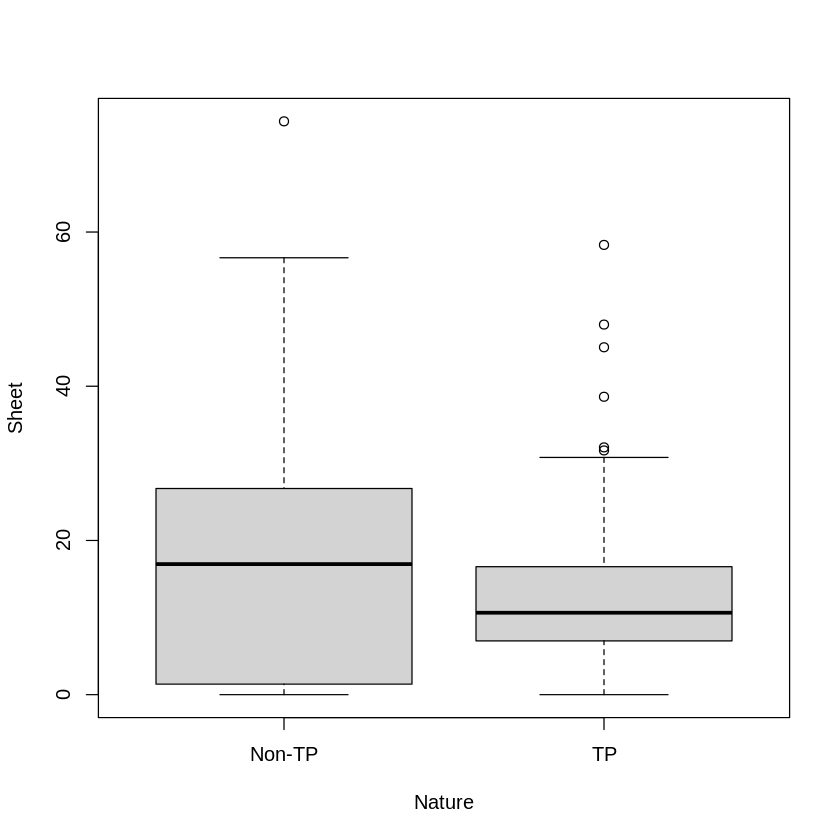

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


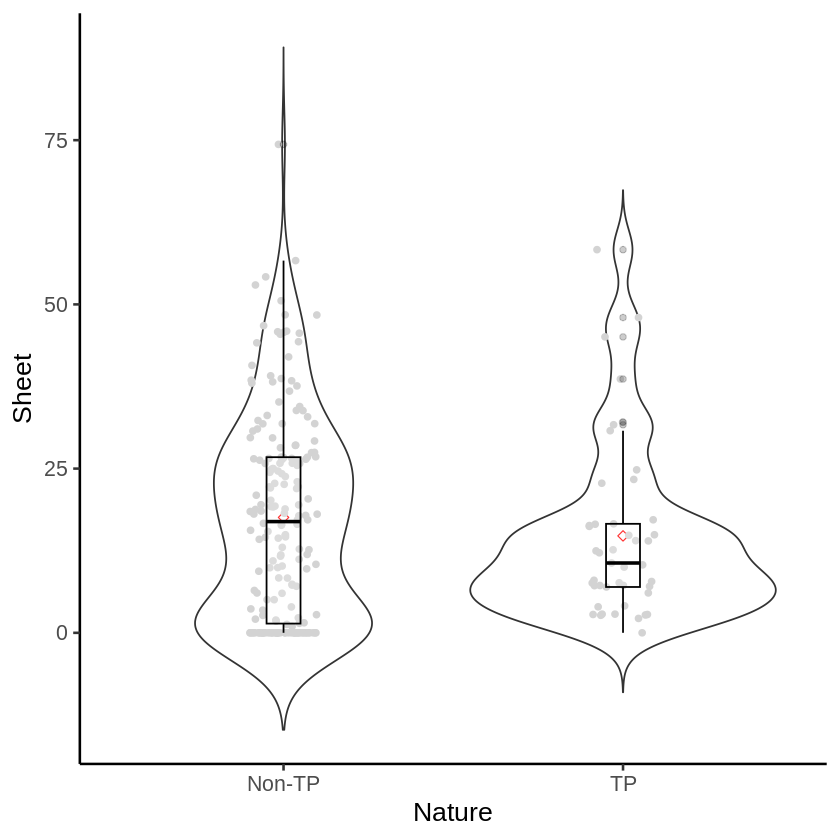

Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_summary()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


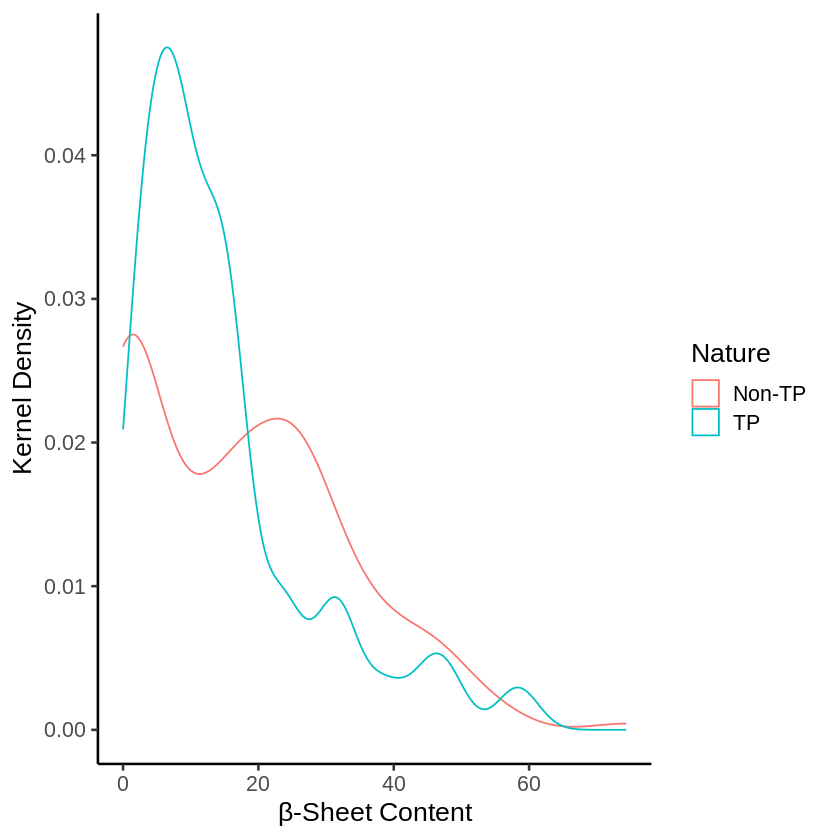

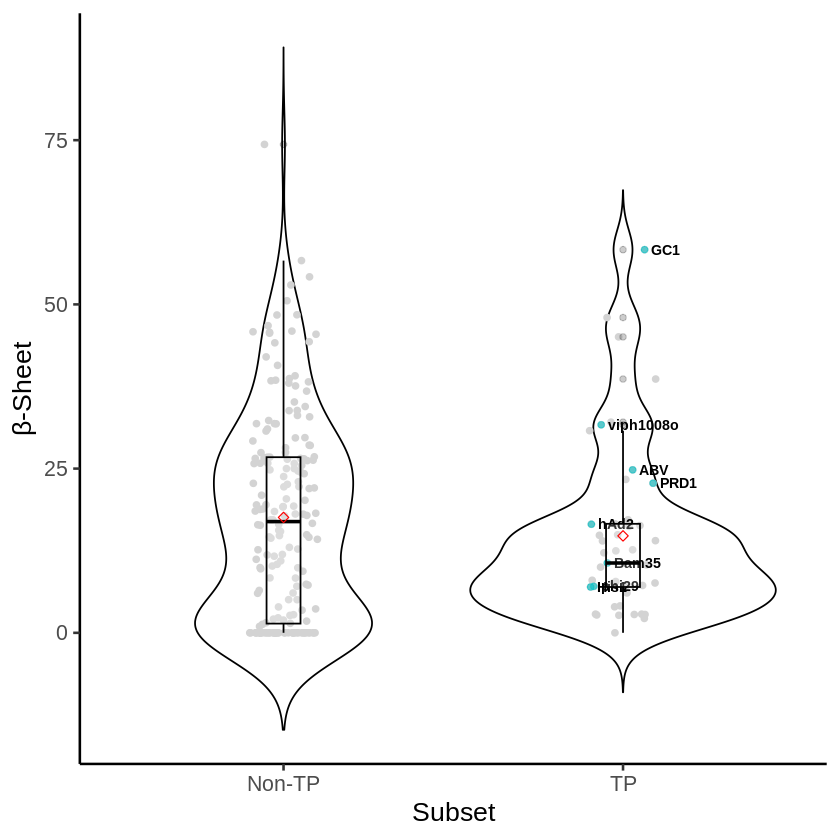

In [ ]:
TP <- read.csv("secondary.csv", header = TRUE, sep = ',')
s <- lm(Sheet ~ Nature, data = TP)
anova(s)
wilcox.test(Sheet ~ Nature, data = TP)
boxplot(Sheet ~ Nature, data = TP)

plt <- ggplot(TP, aes(x=Nature, y=Sheet)) + geom_violin(trim=FALSE)
plt + stat_summary(fun=mean, geom="point", shape=23, size=2, color="red") + geom_jitter(height = 0, width = 0.1, color = "lightgrey") + geom_boxplot(width=0.1, color="black", alpha=0.2) + theme_classic(base_size = 16)

p <- ggplot(TP, aes(x=Sheet, color=Nature)) + geom_density() + labs(x = "β-Sheet Content", y = "Kernel Density") + theme_classic(base_size = 16)
p

highlight_acronyms <- c("phi29", "PRD1", "GC1", "viph1008o", "hAd2", "Bam35", "ABV", "His1")
TP$highlight <- ifelse(TP$Acronym %in% highlight_acronyms, "Highlight", "Normal")

set.seed(12)  # For reproducibility
TP$jittered_x <- as.numeric(factor(TP$Nature)) + runif(nrow(TP), -0.1, 0.1)

ggplot(TP, aes(x = Nature, y = Sheet)) +
  geom_violin(trim = FALSE, fill = "white", color = "black") +
  geom_point(aes(x = jittered_x), color = "lightgrey", size = 1.5) +
  geom_point(data = subset(TP, highlight == "Highlight"),
             aes(x = jittered_x),
             color = "#0ec2c7", size = 1.5, alpha = 0.6) +
  geom_text(data = subset(TP, highlight == "Highlight"),
            aes(x = jittered_x + 0.02, y = Sheet, label = Acronym),
            size = 3,
            fontface = "bold",
            hjust = 0,
            color = "black") +
  labs(x = "Subset", y = "β-Sheet") +
  scale_x_discrete(labels = levels(factor(TP$Nature))) +
  geom_boxplot(width = 0.1, color = "black", alpha = 0.2) +
  stat_summary(fun=mean, geom="point", shape=23, size=2, color="red") +
  theme_classic(base_size = 16)

Bootstrapped effect size
  Sheet ~ Nature
Groups:
           mean   median       sd       se CI.lower CI.upper   n
Non-TP 17.56619 16.93392 15.58727 1.136819 15.25351 19.66465 188
TP     14.75660 10.62802 13.22651 1.971691 11.52739 19.32566  45
Unpaired Cohen's d (R = 1000, bootstrap CI method = bca):
  TP - Non-TP: -0.194366, 95% CI [-0.523117, 0.135005]

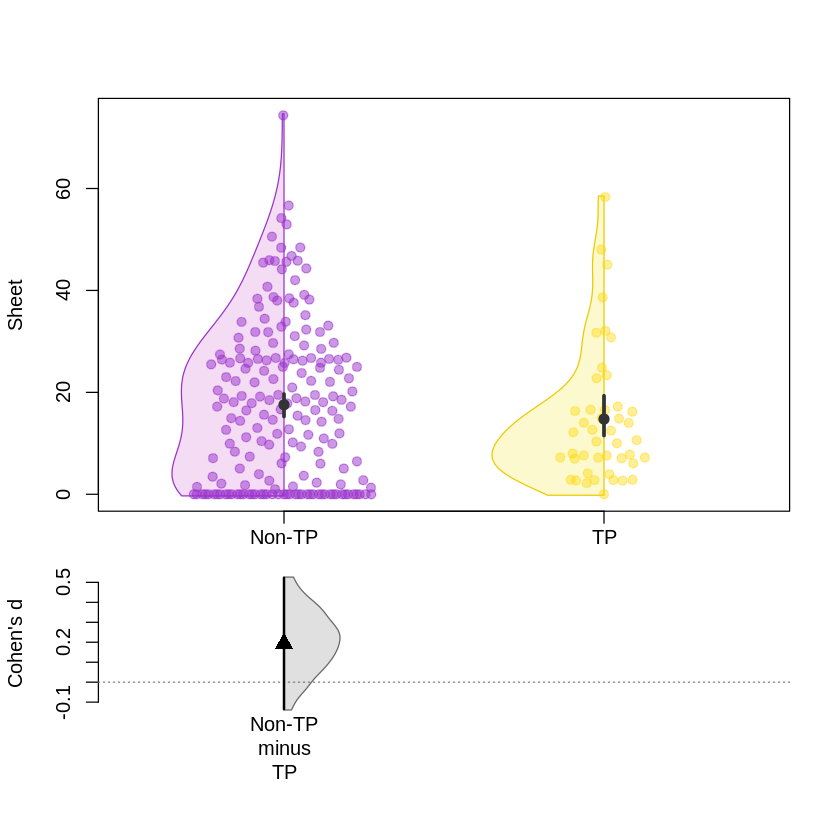

In [ ]:
s_TP = DurgaDiff(Sheet ~ Nature, data = TP, na.action = na.exclude, effect.type = 'cohens d')
s_TP
DurgaPlot(s_TP, points = c(DurgaTransparent("darkorchid", .5), DurgaTransparent("gold", .6)), violin = c("darkorchid3", "gold2"), violin.fill = c("#f5dcf5", "#fcf9cf"), ef.size.position = "below")

#**Models**

In [ ]:
TP <- read.csv("secondary.csv", header = TRUE, sep = ',')
m <- lm(Helix ~ Nature * Score, data = TP)
anova(m)

Df  Sum Sq    Mean Sq   F value  Pr(>F)    
Nature         1  2111.128 2111.1281 5.100187 0.02486533
Score          1   906.137  906.1370 2.189099 0.14036492
Nature:Score   1  1482.652 1482.6516 3.581877 0.05967438
Residuals    229 94790.308  413.9315       NA         NA

#**TP DATASET**

In [ ]:
library('ggplot2')

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


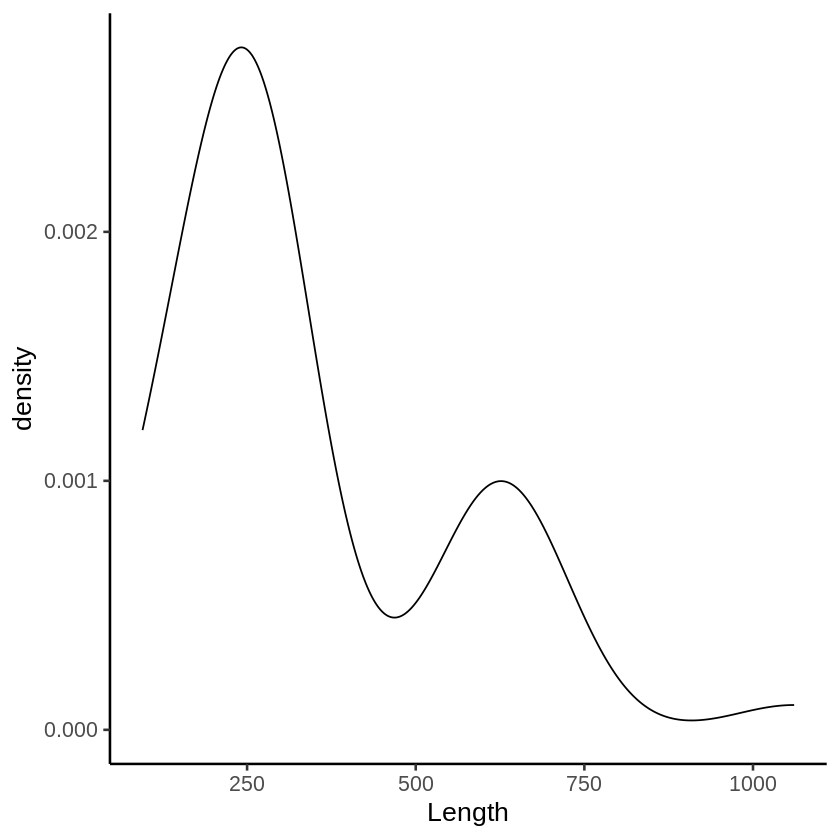

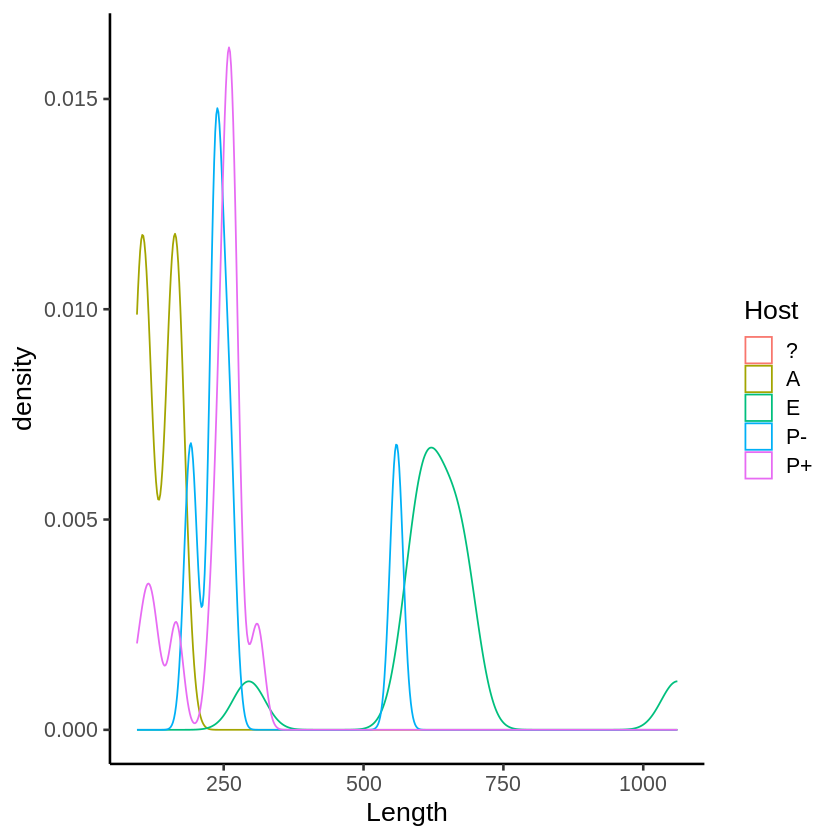

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”


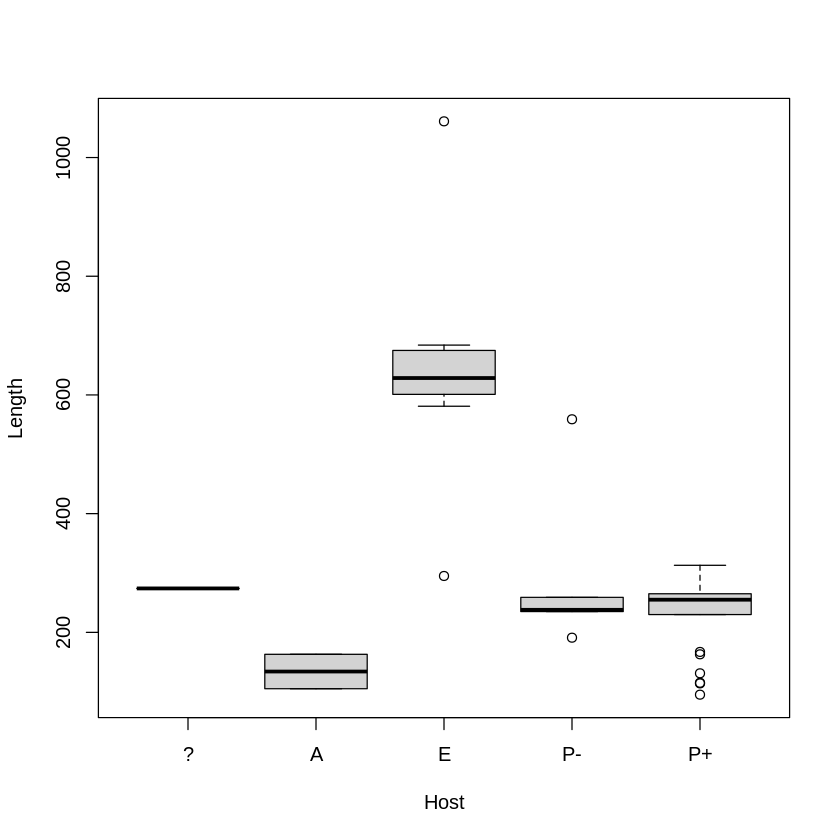

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lenTP)

$Host
         diff        lwr        upr     p adj
A-?   -140.00 -526.62630  246.62630 0.8379918
E-?    367.00   38.43082  695.56918 0.0219109
P--?    22.40 -323.40908  368.20908 0.9997262
P+-?   -43.68 -365.61073  278.25073 0.9950303
E-A    507.00  265.89614  748.10386 0.0000045
P--A   162.40 -101.71605  426.51605 0.4126525
P+-A    96.32 -135.65578  328.29578 0.7592688
P--E  -344.60 -512.63301 -176.56699 0.0000072
P+-E  -410.68 -521.54284 -299.81716 0.0000000
P+-P-  -66.08 -220.73052   88.57052 0.7397002


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = charTP)

$Host
          diff        lwr       upr     p adj
A-?   -0.01500 -16.945756 16.915756 1.0000000
E-?   -2.67650 -17.064876 11.711876 0.9835675
P--?  -0.00800 -15.151329 15.135329 1.0000000
P+-?  -0.00696 -14.104632 14.090712 1.0000000
E-A   -2.66150 -13.219681  7.896681 0.9506583
P--A   0.00700 -11.558908 11.572908 1.0000000
P+-A   0.00804 -10.150414 10.166494 1.0000000
P--E   2.66850  -4.689835 10.026835 0.8372568
P+-E   2.66954  -2.185256  7.524336 0.5244003
P+-P-  0.00104  -6.771262  6.773342 1.0000000


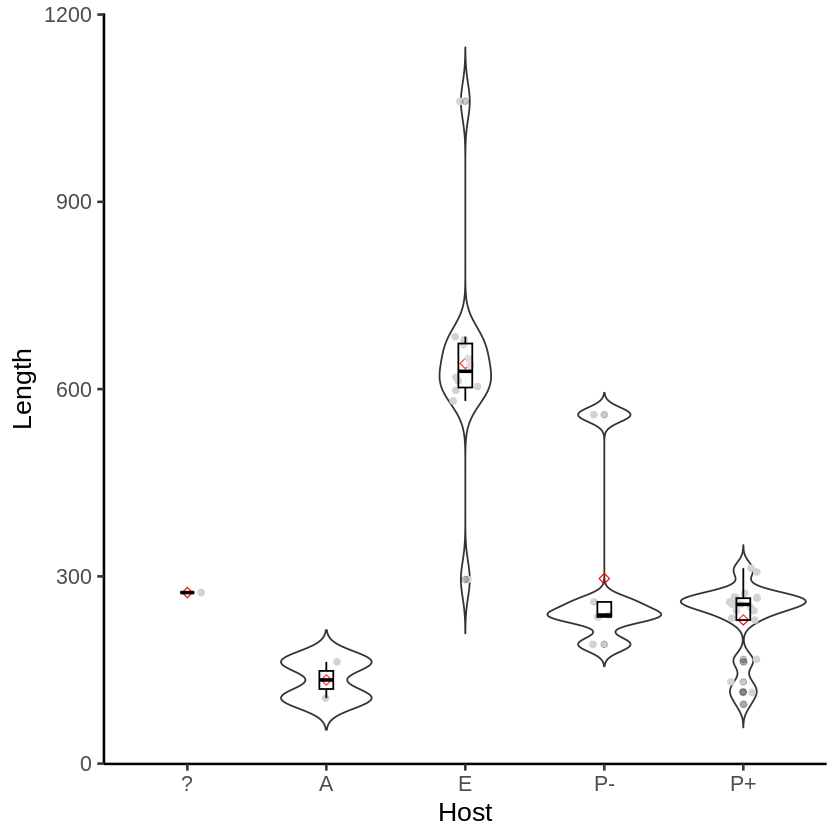

In [ ]:
TP <- read.csv("TP_Dataset.csv", header = TRUE, sep = ',')
p <- ggplot(TP, aes(x=Length)) + geom_density() + theme_classic(base_size = 16)
p
q <- ggplot(TP, aes(x=Length, color=Host)) + geom_density() + theme_classic(base_size = 16)
q
boxplot(Length ~ Host, data = TP)
plt <- ggplot(TP, aes(x=Host, y=Length)) + geom_violin(trim=FALSE)
plt + stat_summary(fun=mean, geom="point", shape=23, size=2, color="red") + geom_jitter(height = 0, width = 0.1, color = "lightgrey") + geom_boxplot(width=0.1, color="black", alpha=0.2) + theme_classic(base_size = 16)


lenTP <- lm(Length ~ Host, data = TP)
TukeyHSD(aov(lenTP))

charTP <- lm(Charge ~ Host, data = TP)
TukeyHSD(aov(charTP))

In [ ]:
charge <- lm(Charge ~ Length, data=TP)

comp <- lm(Charge ~ Host * Length, data=TP)
anova(comp)

len <- lm(Length ~ Host * Charge, data=TP)
anova(len)

Df Sum Sq       Mean Sq      F value      Pr(>F)   
Host         4  62.69249595 15.673123988 0.6021379834 0.6635419
Length       1   0.02271004  0.022710038 0.0008724857 0.9765988
Host:Length  3   0.01014875  0.003382916 0.0001299666 0.9999979
Residuals   36 937.04844917 26.029123588           NA        NA

Df Sum Sq       Mean Sq      F value      Pr(>F)      
Host         4 1.486015e+06 371503.64000 2.837254e+01 1.088200e-10
Charge       1 1.184262e+01     11.84262 9.044468e-04 9.761741e-01
Host:Charge  3 1.727288e+04   5757.62591 4.397224e-01 7.259756e-01
Residuals   36 4.713759e+05  13093.77555           NA           NA

#**Taxonomic Scrutiny**

In [ ]:
library(dplyr)
library(ggplot2)

Taxon        Count
1 Virus        403  
2 Bacteria     702  
3 Archaea       36  
4 Eukaryota     65  
5 Parakaryota    0  
6 OtherAcytota   0  
7 Unclassified   7

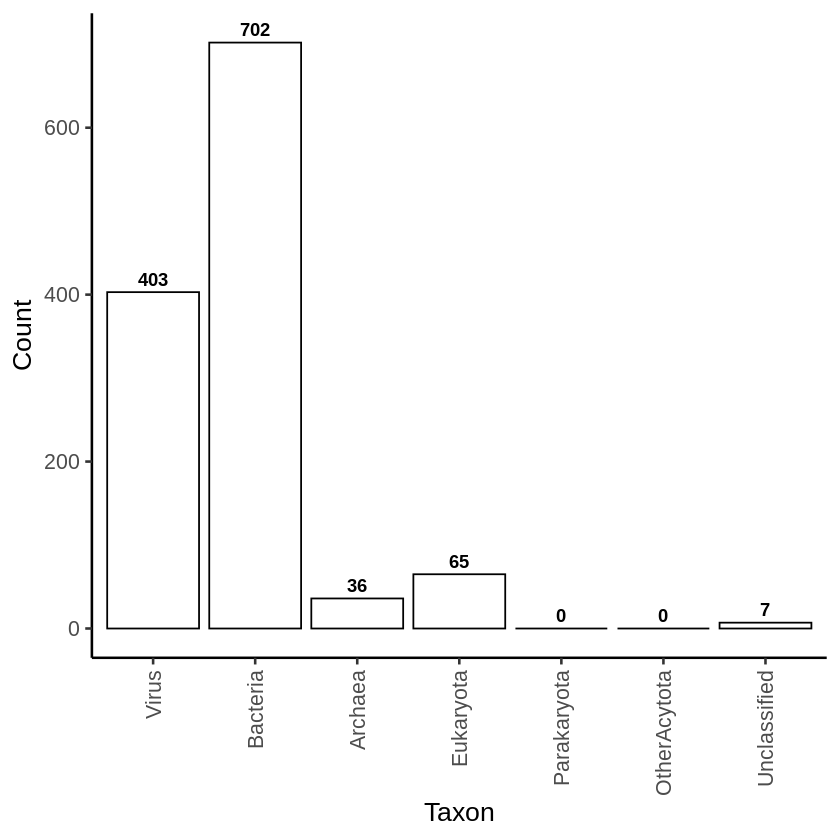

In [ ]:
TAX <- read.csv("new_tax.csv", header=FALSE, sep=',')
TAX <- rename(TAX, Taxon = V1)
TAX <- rename(TAX, Count = V2)
TAX

TAX$Taxon <- factor(TAX$Taxon, levels = unique(TAX$Taxon))

b <- ggplot(TAX, aes(x=Taxon, y=Count)) + geom_bar(stat = "identity", color = "black", fill = "white") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
b

In [ ]:
ggsave("my_barplot.pdf", plot = b, width = 10, height = 6, units = "in", useDingbats = FALSE)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on 'Viral_Domains.csv'”


Domain        Count
1 UNKNOWN       17   
2 Duplodnaviria 43   
3 Adnaviria      4   
4 Varidnaviria   8

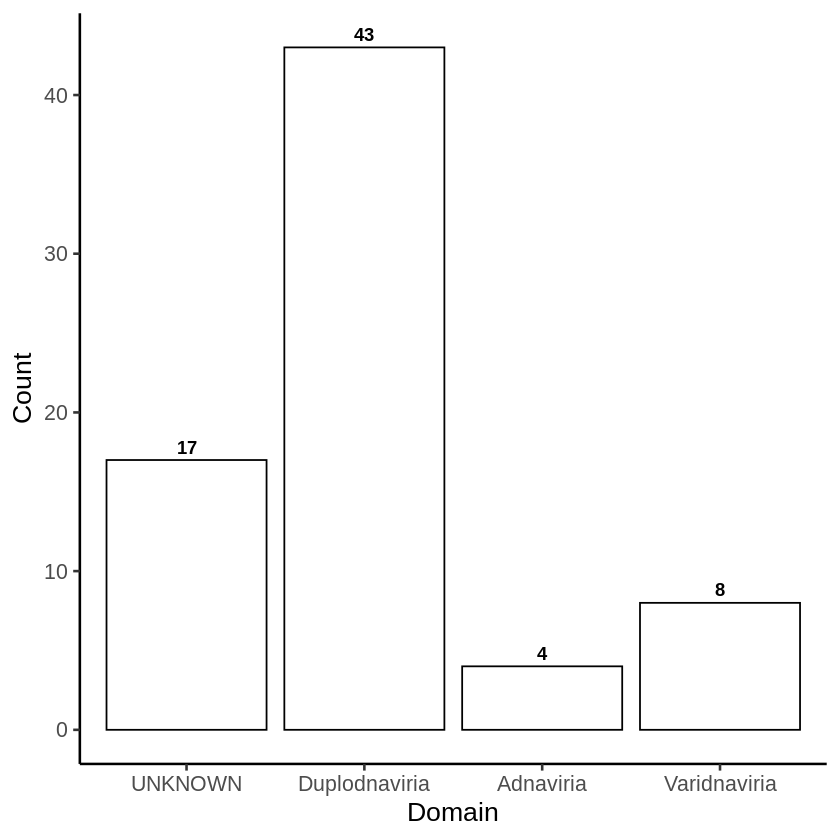

In [ ]:
TAX <- read.csv("Viral_Domains.csv", header=FALSE, sep=',')
TAX <- rename(TAX, Domain = V1)
TAX <- rename(TAX, Count = V2)
TAX

TAX$Domain <- factor(TAX$Domain, levels = unique(TAX$Domain))

b <- ggplot(TAX, aes(x=Domain, y=Count)) + geom_bar(stat = "identity", color = "black", fill = "white") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16)
b

Empire  Realm         Kingdom           Phylum                 
1    Cytota  Bacteria      Bacillati         Bacillota              
2    Viruses Duplodnaviria Heunggongvirae    Uroviricota            
3    Cytota  Bacteria      Pseudomonadati    Thermodesulfobacteriota
4    Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
5    Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
6    Cytota  Archaea       Methanobacteriati Methanobacteriota      
7    Cytota  Bacteria      Bacillati         Bacillota              
8    Cytota  Bacteria                                               
9    Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
10   Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
11   Cytota  Archaea       Thermoproteati                           
12   Cytota  Bacteria      Bacillati         Bacillota              
13   Cytota  Bacteria      Bacillati         Bacillota              
14   Cytota  Archaea                                                
15   Cytota  Bacteria      Bacillati         Bacillota              
16   Cytota  Bacteria      Bacillati         Bacillota              
17   Cytota  Bacteria      Pseudomonadati    Campylobacterota       
18   Viruses Duplodnaviria Heunggongvirae    Uroviricota            
19   Cytota  Bacteria      Bacillati         Bacillota              
20   Viruses Duplodnaviria Heunggongvirae    Uroviricota            
21   Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
22   Cytota  Archaea       Methanobacteriati Thermoplasmatota       
23   Cytota  Bacteria      Pseudomonadati    Campylobacterota       
24   Cytota  Bacteria      Bacillati         Actinomycetota         
25   Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
26   Cytota  Archaea       Methanobacteriati Thermoplasmatota       
27   Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
28   Cytota  Bacteria      Bacillati         Actinomycetota         
29   Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
30   Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
⋮    ⋮       ⋮             ⋮                 ⋮                      
1182 Cytota  Bacteria      Pseudomonadati    Elusimicrobiota        
1183 Cytota  Bacteria      Bacillati         Bacillota              
1184 Cytota  Bacteria      Pseudomonadati    Ignavibacteriota       
1185 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1186 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1187 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1188 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1189 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1190 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1191 Cytota  Bacteria      Bacillati         Actinomycetota         
1192 Cytota  Bacteria      Pseudomonadati    Bacteroidota           
1193 Cytota  Bacteria      Bacillati         Bacillota              
1194 Cytota  Bacteria      Bacillati         Bacillota              
1195 Viruses Varidnaviria  Bamfordvirae      Nucleocytoviricota     
1196 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1197 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1198 Cytota  Bacteria      Pseudomonadati    Chlamydiota            
1199 Cytota  Bacteria      Pseudomonadati    Bacteroidota           
1200 Cytota  Bacteria      Pseudomonadati    Bacteroidota           
1201 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1202 Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
1203 Viruses Varidnaviria  Bamfordvirae      Nucleocytoviricota     
1204 Cytota  Bacteria      Thermotogati      Synergistota           
1205 Viruses Duplodnaviria Heunggongvirae    Uroviricota            
1206 Cytota  Bacteria      Bacillati         Bacillota              
1207 Cytota  Bacteria      Pseudomonadati    Pseudomonadota         
120

Realm         Count
1 Bacteria      659  
2 Duplodnaviria 330  
3 Archaea        79  
4 Eukaryota      66  
5 Varidnaviria   35  
6 UNKNOWN        37  
7 Adnaviria       4  
8 Riboviria       1

Realm         Count
1 Duplodnaviria 330  
2 Varidnaviria   35  
3 UNKNOWN        37  
4 Adnaviria       4  
5 Riboviria       1

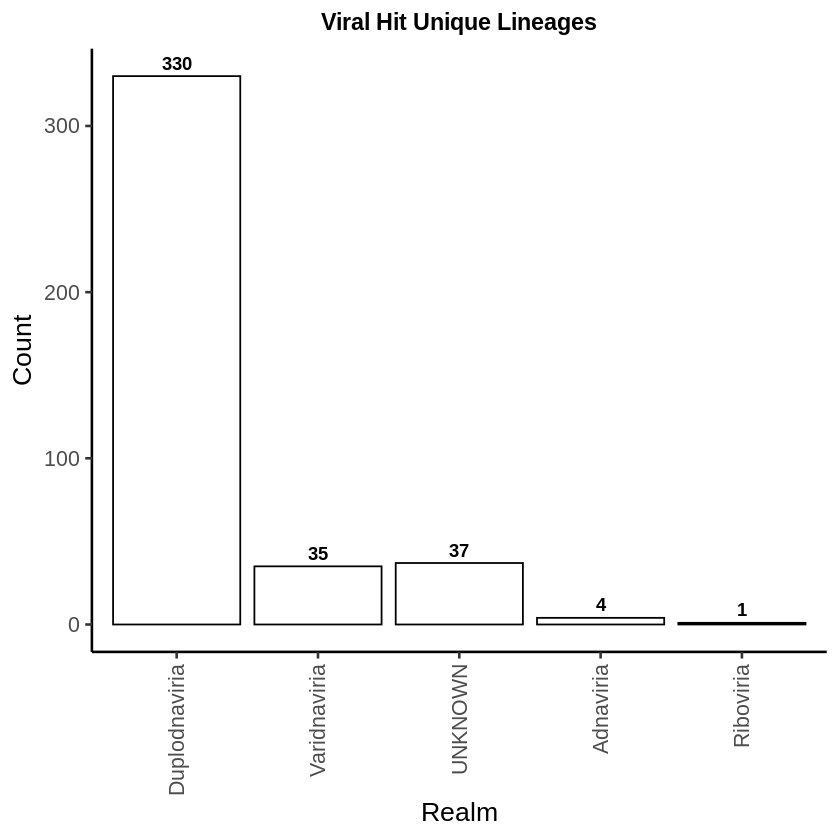

In [ ]:
# ALTERNATIVE FOR VIRAL DOMAINS
install.packages("tidyr")
library(ggplot2)
library(tidyr)
library(dplyr)

lin <- read.csv("lineage_classification_results_low_updated.csv", header = TRUE, sep = ",")
lin

lin <- lin %>%
  mutate(Realm = ifelse(Realm == "" | is.na(Realm), "UNKNOWN", Realm))
lin$Realm <- factor(lin$Realm, levels = unique(lin$Realm))

real <- as.data.frame(table(lin$Realm))
real <- rename(real, Realm = Var1)
real <- rename(real, Count = Freq)
real

filt <- real %>%
  filter(!Realm %in% c("Bacteria", "Archaea", "Eukaryota"))

filt


b <- ggplot(filt, aes(x=Realm, y=Count)) + geom_bar(stat = "identity", fill = "white", color = "black") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) + ggtitle("Viral Hit Unique Lineages")
b

Domain.Kingdom             Phylum             Count
1 UNKNOWN-UNKNOWN            dsDNA              10   
2 UNKNOWN-UNKNOWN            UNKNOWN             7   
3 Duplodnviria-Heuggongvirae Uroviricota        42   
4 Duplodnviria-Heuggongvirae Peploviricota       1   
5 Varidnaviria-Bamfordvirae  Nucleocytoviricota  8   
6 Varidnaviria-Bamfordvirae  Preplasmiviricota   0   
7 Varidnaviria-Helvetiavirae Dividoviricota      0   
8 Adnaviria-Zilligvirae      Taleaviricota       4

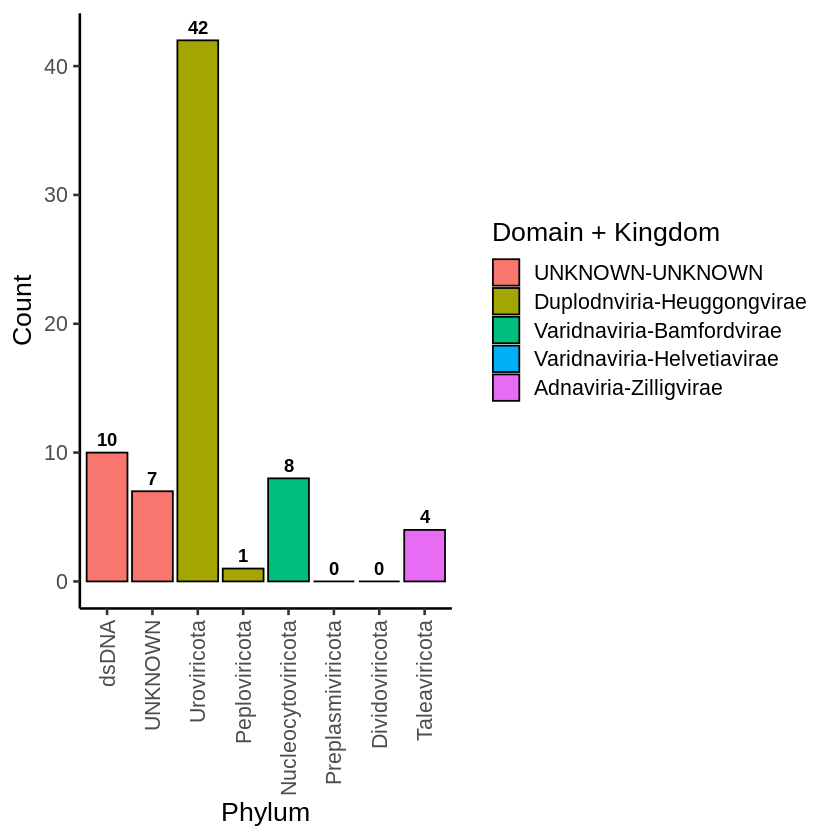

In [ ]:
phyla <- read.csv("phyla.csv", header=TRUE, sep=",")
phyla

phyla$Domain.Kingdom <- factor(phyla$Domain.Kingdom, levels = unique(phyla$Domain.Kingdom))
phyla$Phylum <- factor(phyla$Phylum, levels = unique(phyla$Phylum))

b <- ggplot(phyla, aes(x=Phylum, y=Count, fill = Domain.Kingdom)) + geom_bar(stat = "identity", color = "black") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + labs(fill = "Domain + Kingdom") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
b

In [ ]:
ggsave("my_barplot.pdf", plot = b, width = 10, height = 6, units = "in", useDingbats = FALSE)

In [ ]:
install.packages("networkD3")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘igraph’




In [ ]:
# Load required libraries
library(dplyr)
library(tidyr)
library(networkD3)
library(readr)

# Load the dataset
lineages_data <- read_csv("taxonomy_classification_results.csv")

# Check column names and clean lineage data
lineages_data <- lineages_data %>%
  rename(Lineage = LineageColumnNameIfDifferent) %>%  # Adjust column name if necessary
  filter(!is.na(Lineage) & Lineage != "")

# Extract and clean the lineage information
lineages_split <- lineages_data %>%
  filter(!is.na(Lineage) & Lineage != "") %>%  # Ensure Lineage column is valid
  select(Lineage) %>%
  separate_rows(Lineage, sep = "; ") %>%
  group_by(Lineage) %>%
  mutate(Level = row_number()) %>%
  ungroup()

# Assign unique IDs for each taxon
lineages_split <- lineages_split %>% mutate(TaxID = as.integer(factor(Lineage)))

# Prepare data for Sankey plot
node_counts <- lineages_split %>%
  group_by(Lineage, Level) %>%
  summarise(Count = n(), .groups = 'drop')

edges <- lineages_split %>%
  group_by(Level) %>%
  mutate(Source = lead(TaxID)) %>%
  ungroup() %>%
  filter(!is.na(Source)) %>%
  select(Source = TaxID, Target = Source) %>%
  left_join(node_counts, by = c("Source" = "TaxID"))

# Create nodes for Sankey
nodes <- node_counts %>%
  distinct(Lineage) %>%
  mutate(NodeID = row_number() - 1)  # Zero-indexed for Sankey

# Update edges with correct NodeIDs
edges <- edges %>%
  left_join(nodes, by = c("Source" = "Lineage")) %>%
  rename(SourceID = NodeID) %>%
  left_join(nodes, by = c("Target" = "Lineage")) %>%
  rename(TargetID = NodeID) %>%
  select(SourceID, TargetID, Count)

# Prepare SankeyNetwork
sankey <- sankeyNetwork(
  Links = edges,
  Nodes = nodes,
  Source = "SourceID",
  Target = "TargetID",
  Value = "Count",
  NodeID = "Lineage",
  units = "Count",
  fontSize = 12,
  nodeWidth = 30
)

# Plot Sankey
sankey

Rows: 375 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Lineage, Category
dbl (1): TaxID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: [1m[33mError[39m in `rename()`:[22m
[33m![39m Can't rename columns that don't exist.
[31m✖[39m Column `LineageColumnNameIfDifferent` doesn't exist.


In [ ]:
install.packages("ggalluvial")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘lazyeval’




Empire               Realm         Kingdom          
1   Viruses              Unknown       Unknown          
2   Viruses              Duplodnaviria Heunggongvirae   
3   Cytota               Bacteria      Pseudomonadati   
4   Cytota               Bacteria      Pseudomonadati   
5   unclassified entries Unknown       Unknown          
6   Cytota               Archaea       Unknown          
7   Viruses              Duplodnaviria Heunggongvirae   
8   unclassified entries Unknown       Unknown          
9   Cytota               Bacteria      Unknown          
10  Cytota               Bacteria      Pseudomonadati   
11  Cytota               Bacteria      Pseudomonadati   
12  unclassified entries Unknown       Unknown          
13  Cytota               Archaea       Methanobacteriati
14  Cytota               Bacteria      Pseudomonadati   
15  Cytota               Archaea       Thermoproteati   
16  Cytota               Bacteria      Bacillati        
17  Cytota               Archaea       Methanobacteriati
18  Cytota               Bacteria      Pseudomonadati   
19  Cytota               Bacteria      Bacillati        
20  Cytota               Bacteria      Unknown          
21  Cytota               Archaea       Thermoproteati   
22  Cytota               Bacteria      Pseudomonadati   
23  Cytota               Bacteria      Pseudomonadati   
24  Viruses              Adnaviria     Zilligvirae      
25  Cytota               Bacteria      Pseudomonadati   
26  Cytota               Bacteria      Pseudomonadati   
27  Cytota               Bacteria      Bacillati        
28  Viruses              Duplodnaviria Heunggongvirae   
29  Viruses              Unknown       Unknown          
30  Cytota               Archaea       Methanobacteriati
⋮   ⋮                    ⋮             ⋮                
346 Cytota               Archaea       Methanobacteriati
347 Cytota               Bacteria      Pseudomonadati   
348 Cytota               Bacteria      Bacillati        
349 Cytota               Bacteria      Pseudomonadati   
350 Cytota               Bacteria      Pseudomonadati   
351 Cytota               Bacteria      Bacillati        
352 Cytota               Bacteria      Bacillati        
353 Cytota               Bacteria      Pseudomonadati   
354 Cytota               Bacteria      Pseudomonadati   
355 Cytota               Bacteria      Thermotogati     
356 Viruses              Varidnaviria  Bamfordvirae     
357 Cytota               Bacteria      Pseudomonadati   
358 Viruses              Duplodnaviria Heunggongvirae   
359 Cytota               Bacteria      Pseudomonadati   
360 Cytota               Bacteria      Pseudomonadati   
361 Cytota               Bacteria      Pseudomonadati   
362 Cytota               Archaea       Methanobacteriati
363 Viruses              Varidnaviria  Bamfordvirae     
364 Viruses              Duplodnaviria Heunggongvirae   
365 Viruses              Duplodnaviria Heunggongvirae   
366 Cytota               Eukaryota     Metazoa          
367 Cytota               Archaea       Nanobdellati     
368 Cytota               Archaea       Methanobacteriati
369 Cytota               Archaea       Methanobacteriati
370 Cytota               Bacteria      Pseudomonadati   
371 Viruses              Unknown       Unknown          
372 Cytota               Bacteria      Pseudomonadati   
373 Cytota               Archaea       Thermoproteati   
374 Cytota               Archaea       Methanobacteriati
375 Cytota               Bacteria      Pseudomonadati   
    Phylum                         Class                  
1   Unknown                        Unknown                
2   Uroviricota                    Caudoviricetes         
3   Pseudomonadota                 Alphaproteobacteria    
4   Candidatus Magnetoglobus       Desulfobacteria        
5   Unknown                        Unknown                
6   Candidatus Hydrothermarchaeota Unknown                
7   Uroviricota                    Caudoviricetes        

[1] TRUE

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


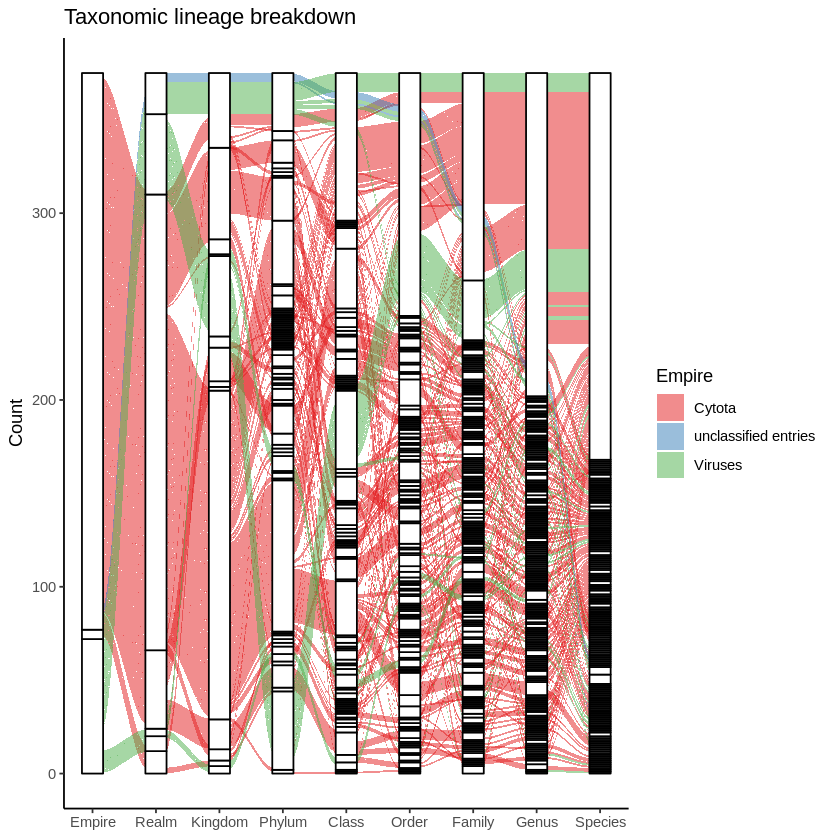

In [ ]:
library(ggplot2)
library(ggalluvial)

taxc <- read.csv('tax_counts.csv', header = TRUE, sep = ',')


taxc[taxc == ''] <- 'Unknown'
taxc

taxc$Realm <- factor(taxc$Realm, levels = unique(taxc$Realm))


is_alluvia_form(taxc, axes = 1:10, silent = TRUE)


alluvial <- ggplot(taxc, aes(y = Count, axis1 = Empire, axis2 = Realm, axis3 = Kingdom, axis4 = Phylum, axis5 = Class, axis6 = Order, axis7 = Family, axis8 = Genus, axis9 = Species)) +
  geom_alluvium(aes(fill = Empire), width = 1/12) +
  geom_stratum() +
  geom_label(stat = "stratum", aes(label = after_stat(stratum))) +
  scale_x_discrete(limits = c("Empire", "Realm", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"), expand = c(.05, .05)) +
  scale_fill_brewer(type = "qual", palette = "Set1") +
  ggtitle("Taxonomic lineage breakdown") +
  theme_classic()
alluvial

In [ ]:
ggsave("alluvial_plot.pdf", plot = alluvial, width = 50, height = 15, units = "in", useDingbats = FALSE, limitsize = FALSE)

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


#**RESULTS**

TP             Hits
1  ABV            2243
2  AP50            178
3  Av-1             33
4  Ayka             48
5  BAdV-3          101
6  Bam35           340
7  Chedec11         72
8  Cp1              97
9  CPAdV-2          91
10 CrAdV-1         138
11 ctnWS46          71
12 Curie            35
13 DAdV-1           73
14 DLc1             45
15 DSL-LC02       2590
16 EAdV-1          189
17 Evcara          144
18 FAdV-8           71
19 Forthebois      133
20 GA1              47
21 GAdV-4           82
22 GC1            2233
23 hAd2             82
24 HAdV-12        1450
25 Harambe          49
26 His1            396
27 Karezi           48
28 LY3              72
29 PAdV-4           89
30 phi29            76
31 phiYS61         135
32 phiZP2           18
33 PiAdV-1         100
34 PineapplePizza   76
35 PRD1           1906
36 PsAdV-3          73
37 Sato             76
38 S-CREM2        3132
39 S-SCSM1        3474
40 St134           284
41 Tillums          61
42 Toil           2140
43 viph1008o      1891
44 viph1249b       892
45 Voltaire         70
46 WhyPhy           55

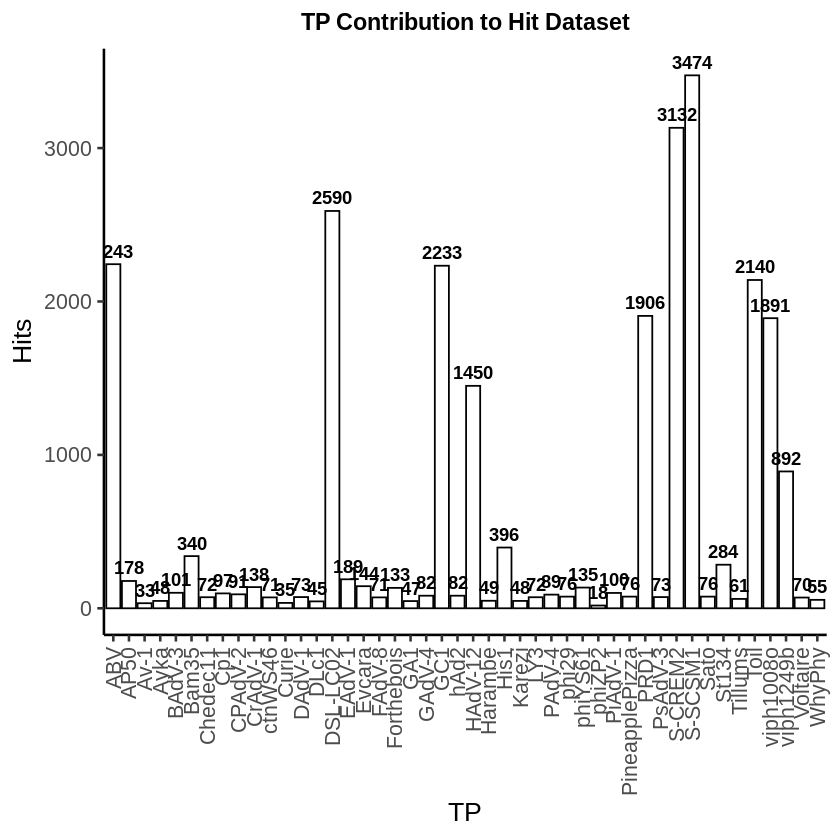

In [ ]:
library(ggplot2)
Hits <- read.csv("Hits.csv", header=TRUE, sep=",")
Hits

b <- ggplot(Hits, aes(x=TP, y=Hits)) + geom_bar(stat = "identity", fill = "white", color = "black") + geom_text(aes(label = Hits), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) + ggtitle("TP Contribution to Hit Dataset")
b

In [ ]:
ggsave("Contribution.pdf", plot = b, width = 14, height = 6, units = "in", useDingbats = FALSE)

In [ ]:
library(dplyr)
library(tidyr)
exploded <- read.csv("Full_FoldSeek_results_updated.csv", header=TRUE, sep=",")
pref_h <- read.csv("Prefilt_FoldSeek_results_high_updated.csv", header=TRUE, sep=",")
pref_l <- read.csv("Prefilt_FoldSeek_results_low_updated.csv", header=TRUE, sep=",")
dedup_h <- read.csv("Dedup_FoldSeek_results_high_updated.csv", header=TRUE, sep=",")
dedup_l <- read.csv("Dedup_FoldSeek_results_low_updated.csv", header=TRUE, sep=",")

full <- as.data.frame(table(exploded$TP))
full <- rename(full, TP = Var1)
full <- rename(full, FoldSeek = Freq)
#Hits <- rename(Hits, FoldSeek = Hits$Hits)

Prefilt_h <- as.data.frame(table(pref_h$TP))
Prefilt_h <- rename(Prefilt_h, TP = Var1)
Prefilt_h <- rename(Prefilt_h, Prefilt_High = Freq)

Prefilt_l <- as.data.frame(table(pref_l$TP))
Prefilt_l <- rename(Prefilt_l, TP = Var1)
Prefilt_l <- rename(Prefilt_l, Prefilt_Low = Freq)

Dedup_h <- as.data.frame(table(dedup_h$TP))
Dedup_h <- rename(Dedup_h, TP = Var1)
Dedup_h <- rename(Dedup_h, Dedup_High = Freq)

Dedup_l <- as.data.frame(table(dedup_l$TP))
Dedup_l <- rename(Dedup_l, TP = Var1)
Dedup_l <- rename(Dedup_l, Dedup_Low = Freq)

comp <- Reduce(function(x, y) merge(x, y, by = "TP", all = TRUE), list(full, Prefilt_l, Prefilt_h, Dedup_l, Dedup_h))
comp[is.na(comp)] <- 0
comp

TP             FoldSeek Prefilt_Low Prefilt_High Dedup_Low Dedup_High
1  ABV            2547     1051        624          988       598       
2  AP50            231       13         13            9         9       
3  Av-1             39       11          9            3         3       
4  Ayka             65       16         11            0         0       
5  BAdV-3          109       10         10            1         1       
6  Bam35           433       13         11            7         7       
7  Chedec11         87       34         30           12        10       
8  Cp1             101        1          1            1         1       
9  CPAdV-2          99        8          8            2         2       
10 CrAdV-1         141       10         10            3         3       
11 ctnWS46          92       27         18            6         6       
12 Curie            35       20         12            2         1       
13 DAdV-1           78        9          9            4         4       
14 DLc1             48       18         11            1         1       
15 DSL-LC02       3340       81         73           71        65       
16 EAdV-1          219        9          9            2         2       
17 Evcara          172       19         13            2         1       
18 FAdV-8           73        9          9            2         2       
19 Forthebois      155        1          1            1         1       
20 GA1              65       31         22            2         2       
21 GAdV-4           95       10         10            2         2       
22 GC1            2600      801        460          707       427       
23 hAd2             88       11         11            5         5       
24 Harambe          51       27         21            4         3       
25 His1            448        1          1            1         1       
26 Karezi           65       26         22            1         1       
27 LY3              74       18         11            3         2       
28 PAdV-4           99       11         11            1         1       
29 phi29            89       32         26            5         5       
30 phiYS61         162        1          1            1         1       
31 phiZP2           25        1          1            1         1       
32 PiAdV-1         105        9          9            2         2       
33 PineapplePizza   93       23         16            3         3       
34 PRD1           2281        6          2            5         1       
35 PsAdV-3          78        9          9            1         1       
36 S-CREM2        5344       21         15            2         2       
37 S-SCSM1        6533       31         24           20        15       
38 Sato             97       10         10            5         5       
39 St134           360       42         21            3         2       
40 Tillums          63       20         13            1         1       
41 Toil           2437       10          2           10         2       
42 viph1008o      2205        6          3            4         1       
43 viph1249b      1041        4          4            3         3       
44 Voltaire        105       25         15            2         1       
45 WhyPhy           55       26         20            3         3

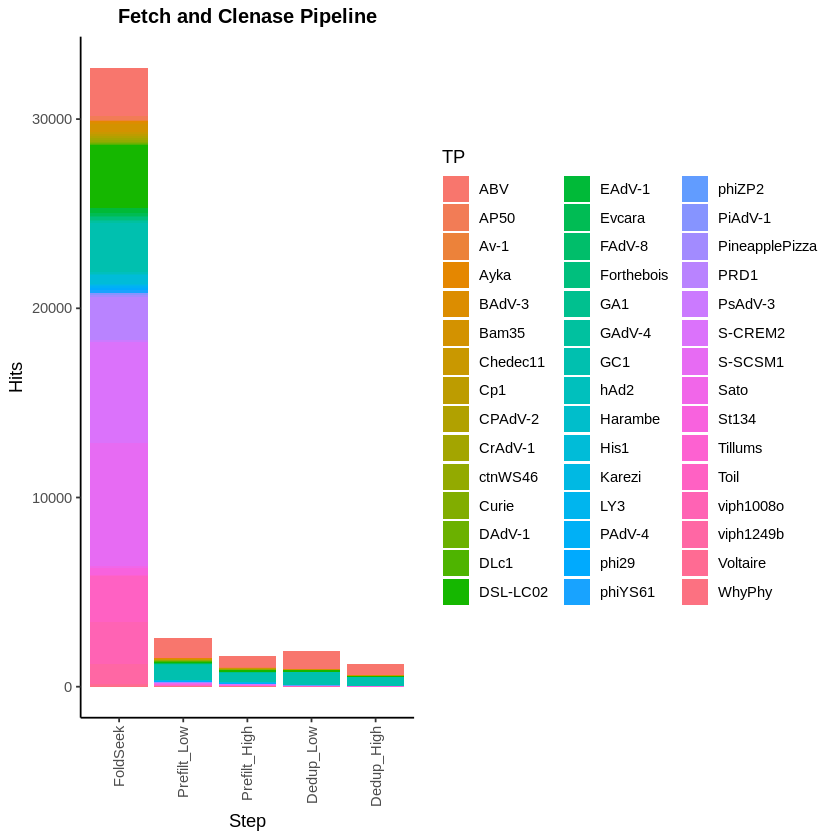

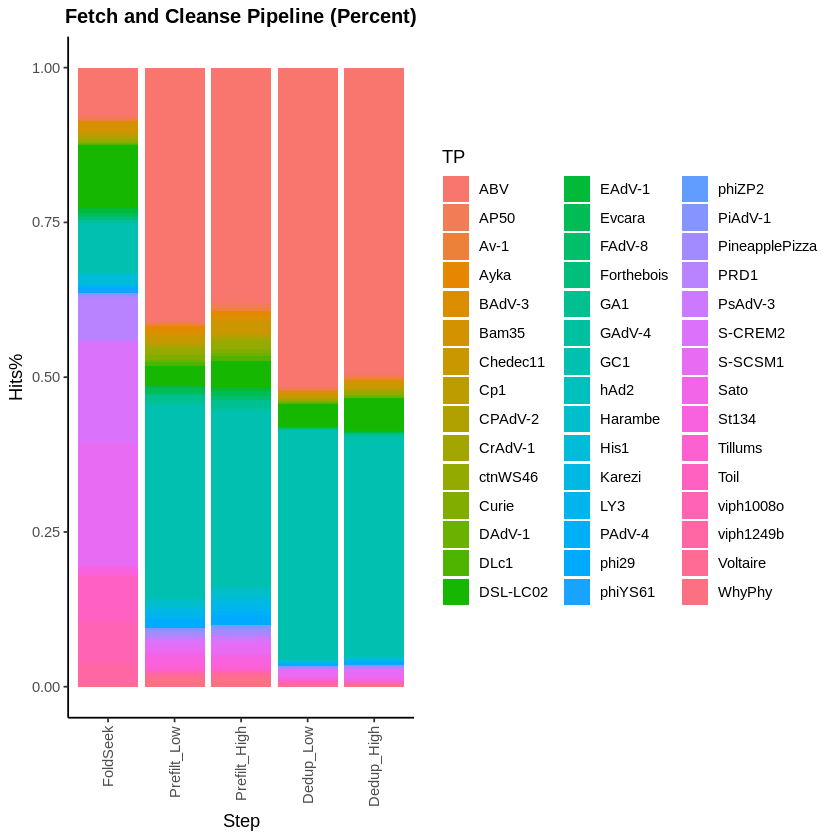

In [ ]:
# Load necessary library
library(ggplot2)
library(tidyr)

# Reshape the data to long format
df_long <- comp %>%
  pivot_longer(
    cols = -TP, # Exclude the ID column
    names_to = "Step", # Name for the new condition column
    values_to = "Hits" # Name for the new value column
  )

df_long$Step <- factor(df_long$Step, levels = unique(df_long$Step))

# Stacked bar plot
ggplot(df_long, aes(x = Step, y = Hits, fill = TP)) +
  geom_bar(stat = "identity") + # Stacked bar plot
  theme_minimal() +
  labs(title = "Fetch and Clenase Pipeline",
       x = "Step",
       y = "Hits") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

ggplot(df_long, aes(x = Step, y = Hits, fill = TP)) +
  geom_bar(position = "fill", stat = "identity") + # Stacked bar plot
  theme_minimal() +
  labs(title = "Fetch and Cleanse Pipeline (Percent)",
       x = "Step",
       y = "Hits%") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

Empire  Realm         Kingdom        Phylum                 
1    Cytota  Bacteria      Bacillati      Bacillota              
2    Cytota  Eukaryota                                           
3    Cytota  Eukaryota     Metazoa        Arthropoda             
4    Cytota  Eukaryota                    Mucoromycota           
5    Viruses Duplodnaviria Heunggongvirae Uroviricota            
6    Cytota  Eukaryota     Metazoa        Cnidaria               
7    Cytota  Bacteria      Pseudomonadati Thermodesulfobacteriota
8    Cytota  Eukaryota     Metazoa        Arthropoda             
9    Cytota  Bacteria      Pseudomonadati Pseudomonadota         
10   Cytota  Eukaryota     Metazoa        Arthropoda             
11   Cytota  Eukaryota     Metazoa        Chordata               
12   Cytota  Eukaryota     Metazoa        Nematoda               
13   Cytota  Eukaryota     Metazoa        Arthropoda             
14   Cytota  Eukaryota     Metazoa        Arthropoda             
15   Cytota  Bacteria      Pseudomonadati Pseudomonadota         
16   Cytota  Eukaryota     Metazoa        Chordata               
17   Cytota  Eukaryota     Metazoa        Arthropoda             
18   Cytota  Eukaryota     Metazoa        Arthropoda             
19   Cytota  Eukaryota     Viridiplantae  Spermatophyta          
20   Cytota  Eukaryota     Metazoa        Arthropoda             
21   Cytota  Eukaryota     Metazoa        Nematoda               
22   Cytota  Bacteria      Bacillati      Bacillota              
23   Cytota  Bacteria      Bacillati      Actinomycetota         
24   Cytota  Bacteria      Pseudomonadati Pseudomonadota         
25   Cytota  Bacteria      Pseudomonadati Campylobacterota       
26   Cytota  Bacteria      Pseudomonadati Pseudomonadota         
27   Cytota  Bacteria      Bacillati      Bacillota              
28   Cytota  Eukaryota     Viridiplantae  Spermatophyta          
29   Cytota  Bacteria      Pseudomonadati Pseudomonadota         
30   Cytota  Eukaryota     Viridiplantae  Spermatophyta          
⋮    ⋮       ⋮             ⋮              ⋮                      
1544 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1545 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1546 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1547 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1548 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1549 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1550 Cytota  Bacteria      Bacillati      Actinomycetota         
1551 Cytota  Bacteria      Pseudomonadati Bacteroidota           
1552 Cytota  Bacteria      Bacillati      Bacillota              
1553 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1554 Viruses Varidnaviria  Bamfordvirae   Nucleocytoviricota     
1555 Cytota  Bacteria      Bacillati      Bacillota              
1556 Viruses Varidnaviria  Bamfordvirae   Nucleocytoviricota     
1557 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1558 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1559 Cytota  Bacteria      Pseudomonadati Chlamydiota            
1560 Cytota  Bacteria      Pseudomonadati Bacteroidota           
1561 Cytota  Bacteria      Pseudomonadati Bacteroidota           
1562 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1563 Cytota  Bacteria      Pseudomonadati Pseudomonadota         
1564 Viruses Varidnaviria  Bamfordvirae   Nucleocytoviricota     
1565 Cytota  Bacteria      Thermotogati   Synergistota           
1566 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1567 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1568 Cytota  Bacteria      Bacillati      Bacillota              
1569 Cytota  Bacteria      Pseudomonadati Pseudomonadota         
1570 Cytota  Bacteria      Pseudomonadati Bacteroidota           
1571 Viruses Duplodnaviria Heunggongvirae Uroviricota            
1572 Viruses Duplodnaviria Heunggongvirae Uro

Realm         Count
1 Bacteria      762  
2 Eukaryota     233  
3 Duplodnaviria 357  
4 Archaea        86  
5 Varidnaviria   64  
6 UNKNOWN        55  
7 Monodnaviria   11  
8 Adnaviria       4  
9 Riboviria       1

Realm         Count
1 Duplodnaviria 357  
2 Varidnaviria   64  
3 UNKNOWN        55  
4 Monodnaviria   11  
5 Adnaviria       4  
6 Riboviria       1

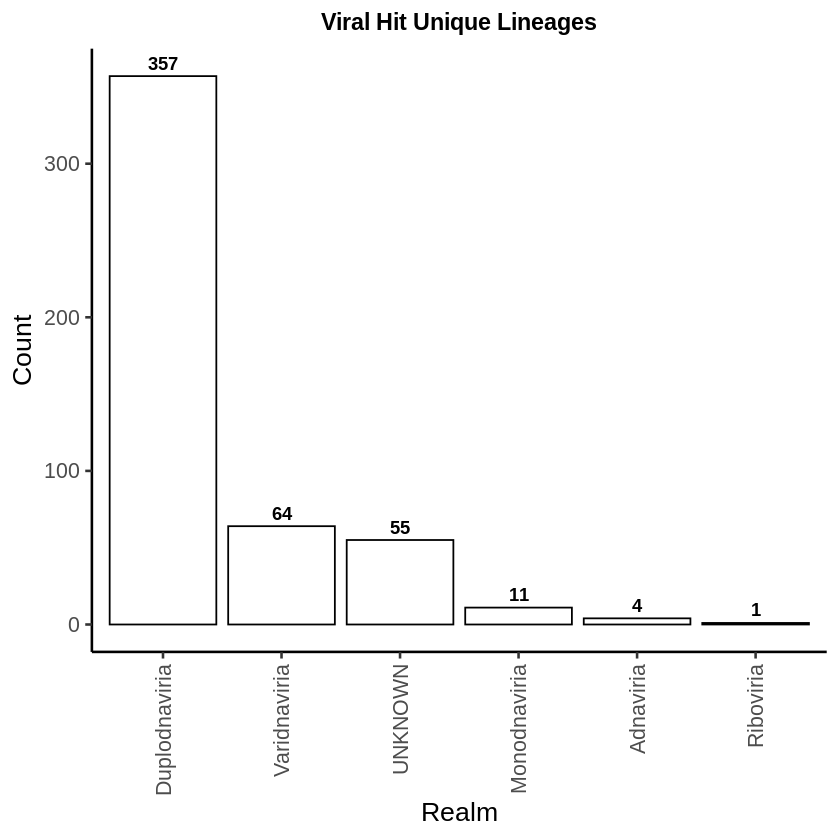

In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)

lin <- read.csv("lineage_classification_results.csv", header = TRUE, sep = ",")
lin

lin <- lin %>%
  mutate(Realm = ifelse(Realm == "" | is.na(Realm), "UNKNOWN", Realm))
lin$Realm <- factor(lin$Realm, levels = unique(lin$Realm))

real <- as.data.frame(table(lin$Realm))
real <- rename(real, Realm = Var1)
real <- rename(real, Count = Freq)
real

filt <- real %>%
  filter(!Realm %in% c("Bacteria", "Archaea", "Eukaryota"))

filt


b <- ggplot(filt, aes(x=Realm, y=Count)) + geom_bar(stat = "identity", fill = "white", color = "black") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) + ggtitle("Viral Hit Unique Lineages")
b

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 33548 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to 

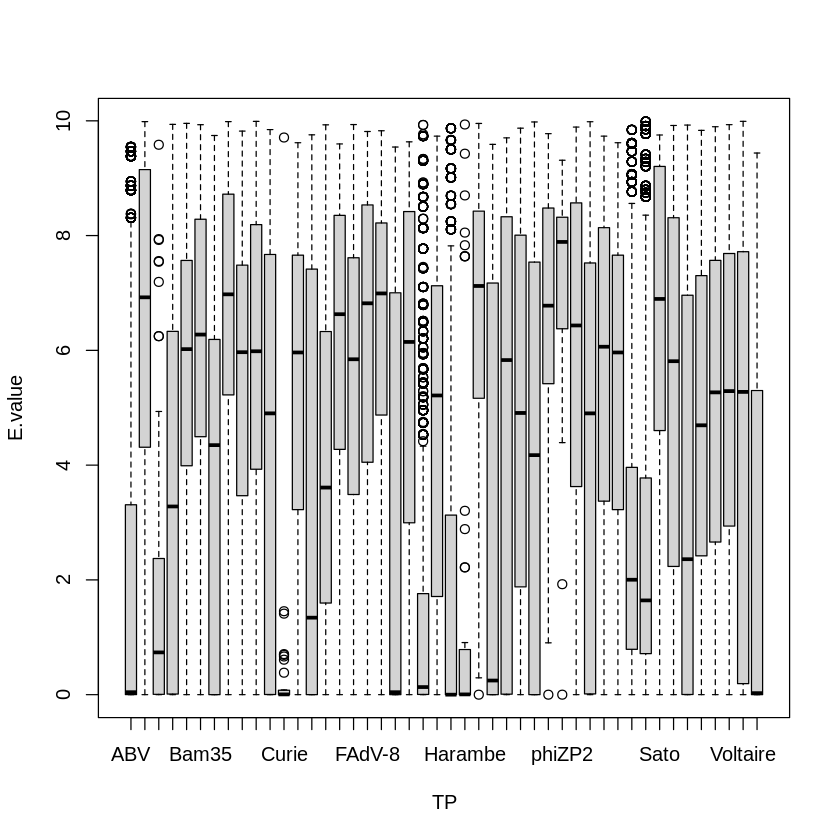

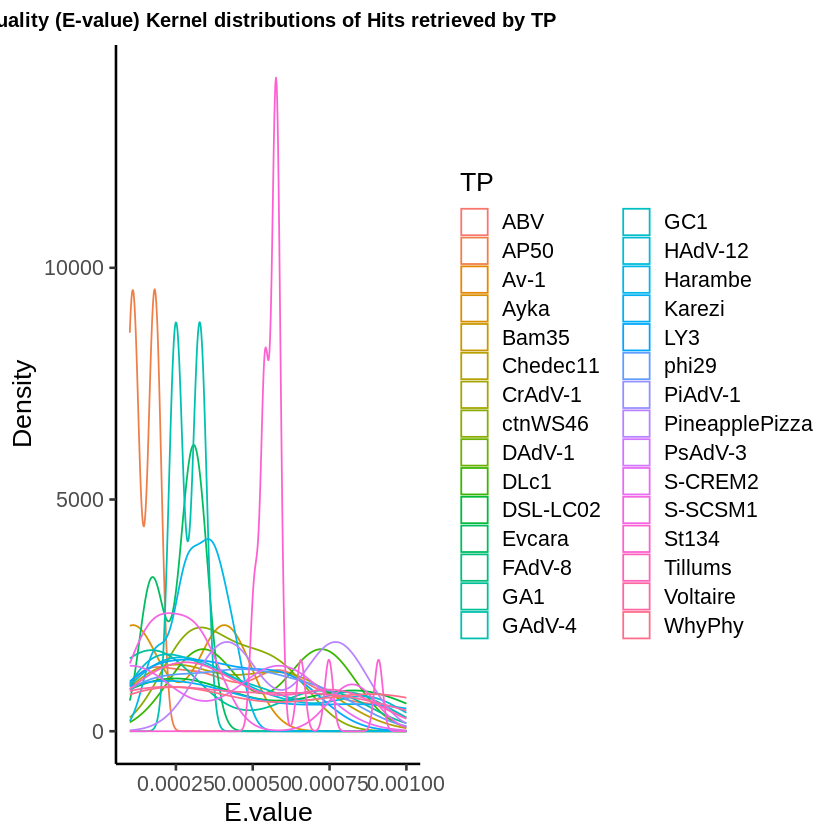

In [ ]:
library("ggplot2")

Hits <- read.csv("Full_FoldSeek_results.csv", header=TRUE, sep=",")

boxplot(E.value ~ TP, data = Hits)

plt <- ggplot(Hits, aes(x=TP, y=E.value)) + geom_violin(trim=FALSE) + scale_y_log10()
q <- plt + stat_summary(fun=mean, geom="point", shape=23, size=2, color="red") + geom_jitter(height = 0, width = 0.1, color = "lightgrey") + geom_boxplot(width=0.1, color="black", alpha=0.2) + theme_classic(base_size = 16)

p <- ggplot(Hits, aes(x=E.value, color=TP)) + geom_density() + scale_x_log10() + xlim(0.0001, 0.001) + labs(title = "Quality (E-value) Kernel distributions of Hits retrieved by TP", y = "Density")+ theme_classic(base_size = 16) + theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))
p

In [ ]:
ggsave("density.pdf", plot = p, width = 24, height = 12, units = "in", useDingbats = FALSE)
ggsave("
violin_hits.pdf", plot = q, width = 45, height = 12, units = "in", useDingbats = FALSE)

Warning message:
“Removed 33548 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; r

#**PSI-BLAST RESULTS**

Taxon        Count
1 Virus        375  
2 Bacteria     365  
3 Archaea       10  
4 Eukaryota     13  
5 Parakaryota    0  
6 OtherAcytota   0  
7 Unclassified   0

Taxon        PSI_BLAST FoldSeek
1 Archaea       10        36     
2 Bacteria     365       702     
3 Eukaryota     13        65     
4 OtherAcytota   0         0     
5 Parakaryota    0         0     
6 Unclassified   0         7     
7 Virus        375       403

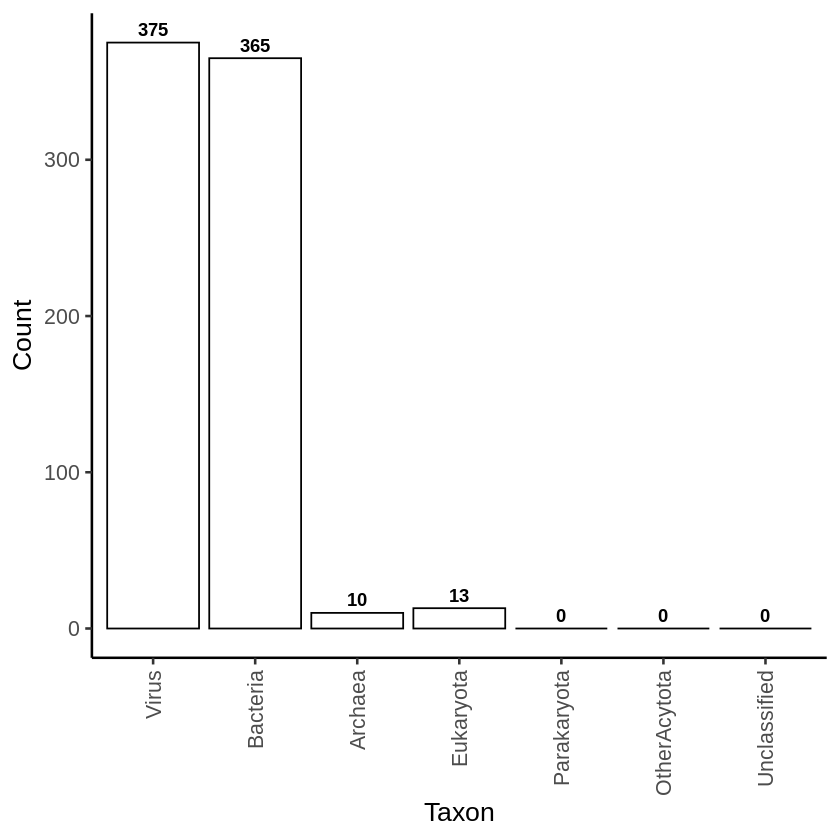

In [ ]:
tax <- read.csv("tax_psiblast.csv", header = FALSE)
tax <- rename(tax, Taxon = V1)
tax <- rename(tax, Count = V2)
tax

tax$Taxon <- factor(tax$Taxon, levels = unique(tax$Taxon))

b <- ggplot(tax, aes(x=Taxon, y=Count)) + geom_bar(stat = "identity", color = "black", fill = "white") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
b

tax <- rename(tax, PSI_BLAST = Count)
FS <- read.csv("FoldSeek_tax_count.csv", header = FALSE)
FS <- rename(FS, Taxon = V1)
FS <- rename(FS, FoldSeek = V2)

comp <- Reduce(function(x, y) merge(x, y, by = "Taxon", all = TRUE), list(tax, FS))
comp

Taxon        Method    Count
1  Archaea      PSI_BLAST  10  
2  Archaea      FoldSeek   36  
3  Bacteria     PSI_BLAST 365  
4  Bacteria     FoldSeek  702  
5  Eukaryota    PSI_BLAST  13  
6  Eukaryota    FoldSeek   65  
7  OtherAcytota PSI_BLAST   0  
8  OtherAcytota FoldSeek    0  
9  Parakaryota  PSI_BLAST   0  
10 Parakaryota  FoldSeek    0  
11 Unclassified PSI_BLAST   0  
12 Unclassified FoldSeek    7  
13 Virus        PSI_BLAST 375  
14 Virus        FoldSeek  403

Taxon        PSI_BLAST FoldSeek  
1 Archaea       1.310616  2.9678483
2 Bacteria     47.837484 57.8730420
3 Eukaryota     1.703801  5.3586150
4 OtherAcytota  0.000000  0.0000000
5 Parakaryota   0.000000  0.0000000
6 Unclassified  0.000000  0.5770816
7 Virus        49.148100 33.2234130

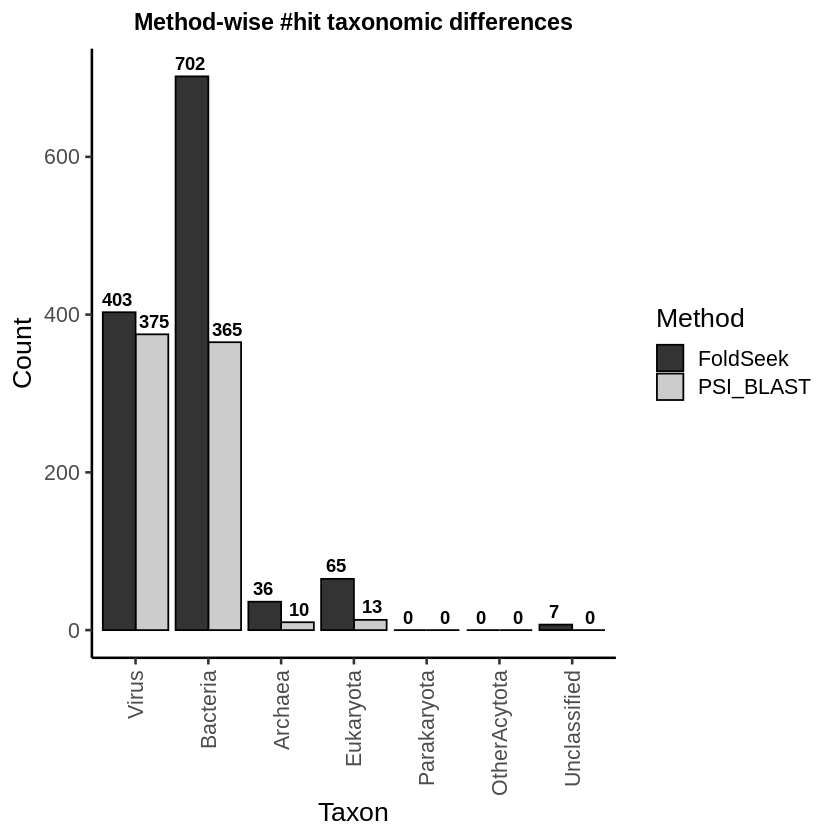

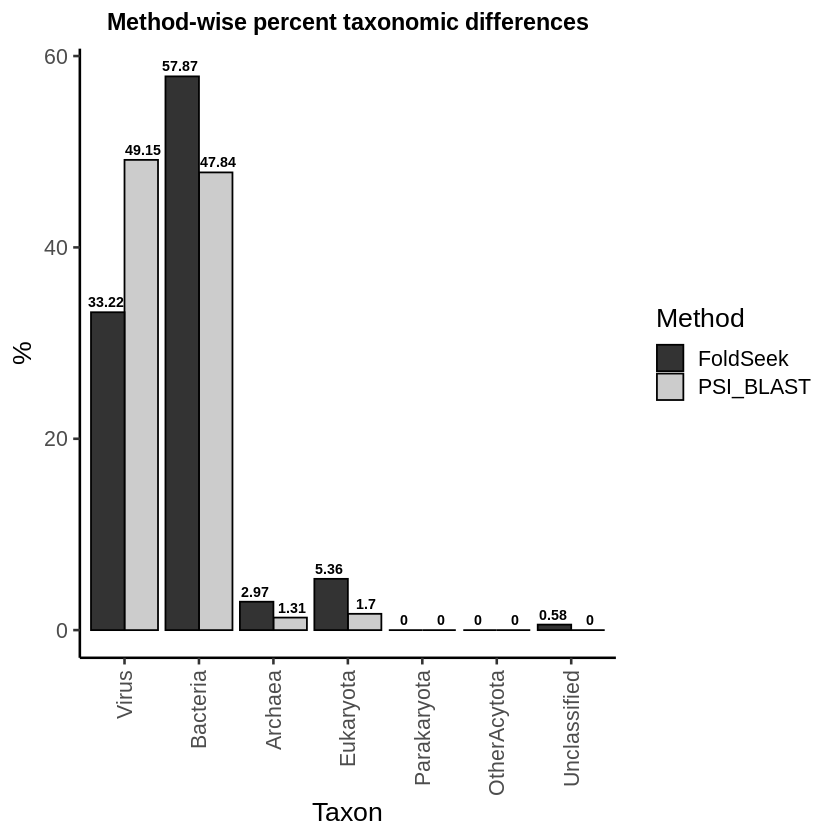

In [ ]:
df_long <- tidyr::pivot_longer(
  comp,
  cols = c(PSI_BLAST, FoldSeek),
  names_to = "Method",
  values_to = "Count"
)

df_long

plot <- ggplot(df_long, aes(x = Taxon, y = Count, fill = Method,)) +
  geom_bar(stat = "identity", position = "dodge",  color = "black")  +
  geom_text(aes(label = Count), vjust = -0.5, position = position_dodge(1), fontface = "bold") +
  theme_classic(base_size = 16) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) +
  ggtitle("Method-wise #hit taxonomic differences") +
  xlab("Taxon") +
  ylab("Count") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  scale_fill_grey()
print(plot)


df_percentage <- apply(comp[, -1], 2, function(x) { x * 100 / sum(x, na.rm = TRUE) })
df_percentage <- cbind(comp[, 1, drop = FALSE], as.data.frame(df_percentage))
df_percentage

df_long2 <- tidyr::pivot_longer(
  df_percentage,
  cols = c(PSI_BLAST, FoldSeek),
  names_to = "Method",
  values_to = "Count"
)


plot2 <- ggplot(df_long2, aes(x = Taxon, y = Count, fill = Method,)) +
  geom_bar(stat = "identity", position = "dodge",  color = "black")  +
  geom_text(aes(label = round(Count, digits = 2)), vjust = -0.5, position = position_dodge(1), fontface = "bold", size = 3) +
  theme_classic(base_size = 16) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) +
  ggtitle("Method-wise percent taxonomic differences") +
  xlab("Taxon") +
  ylab("%") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold")) +
  scale_fill_grey()
print(plot2)

In [ ]:
results <- read.csv("PSI-BLAST_results_updated.csv", header=TRUE, sep=",")
pref <- read.csv("Prefilt_PSI-BLAST_results_updated.csv", header=TRUE, sep=",")
dedup <- read.csv("Dedup_PSI-BLAST_results_updated.csv", header=TRUE, sep=",")

full <- as.data.frame(table(results$TP))
full <- rename(full, TP = Var1)
full <- rename(full, PSI_BLAST = Freq)

Prefilt <- as.data.frame(table(pref$TP))
Prefilt <- rename(Prefilt, TP = Var1)
Prefilt <- rename(Prefilt, Prefiltering = Freq)

Dedup <- as.data.frame(table(dedup$TP))
Dedup <- rename(Dedup, TP = Var1)
Dedup <- rename(Dedup, Deduplication = Freq)

final <- Reduce(function(x, y) merge(x, y, by = "TP", all = TRUE), list(full, Prefilt, Dedup))
final[is.na(final)] <- 0
final

write.csv(final, "PSI-BLAST_cleansing_pipeline.csv")

TP             PSI_BLAST Prefiltering Deduplication
1  ABV             11        10            5          
2  AP50           134       129           18          
3  Av-1           178       178           38          
4  Ayka           214       213           14          
5  BAdV-3         512       468            1          
6  Bam35          146       134           29          
7  Chedec11       394       389           38          
8  Cp1             13        12            6          
9  CPAdV-2        521       474            5          
10 CrAdV-1        506       471            0          
11 ctnWS46        206       205           15          
12 Curie          223       223            7          
13 DAdV-1         505       469            5          
14 DLc1           160       153            8          
15 DSL-LC02       995       992          477          
16 EAdV-1         514       469           11          
17 Evcara         237       237            6          
18 FAdV-8         507       465            3          
19 Forthebois       3         2            1          
20 GA1            350       345           16          
21 GAdV-4         510       472            2          
22 GC1            383       337          271          
23 hAd2           517       465           11          
24 Harambe        281       273            3          
25 His1             3         2            1          
26 Karezi         366       360           21          
27 LY3            169       159            6          
28 PAdV-4         516       471            0          
29 phi29          414       406          113          
30 phiYS61          3         2            1          
31 phiZP2           9         8            4          
32 PiAdV-1        506       461          116          
33 PineapplePizza 236       235            6          
34 PRD1            11         9            4          
35 PsAdv-3        502       497            7          
36 S-CREM2        571       571           13          
37 S-SCSM1        548       548           52          
38 Sato           117       111           12          
39 St134           47        40           15          
40 Tillums        208       208            7          
41 Toil             5         4            2          
42 viph1008o       15        14            4          
43 viph1249b       24        23            4          
44 Voltaire       209       209            7          
45 WhyPhy         356       352           10

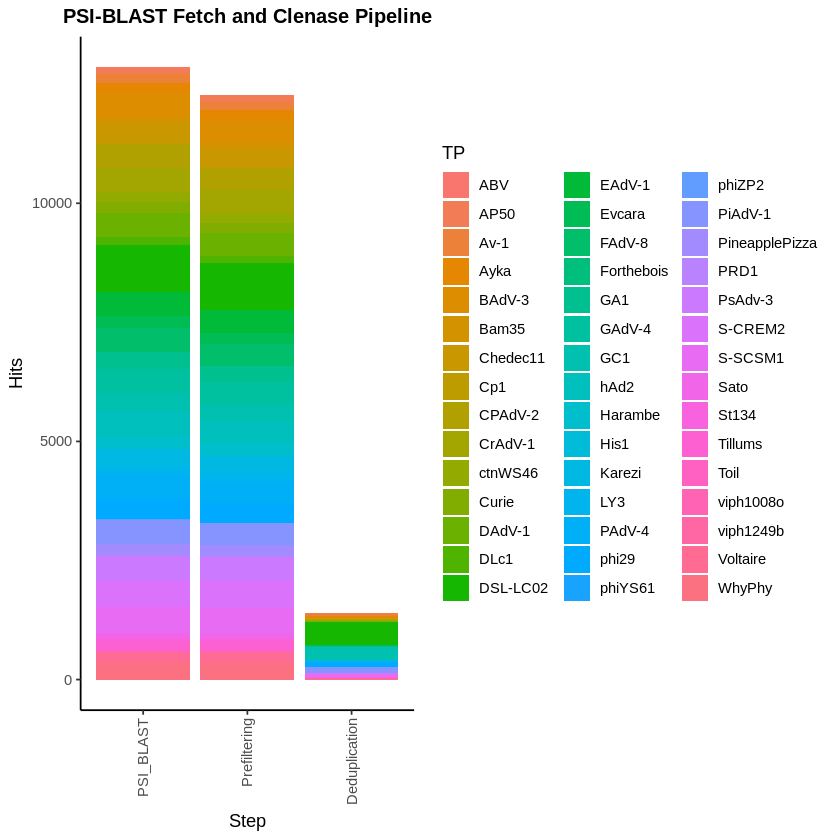

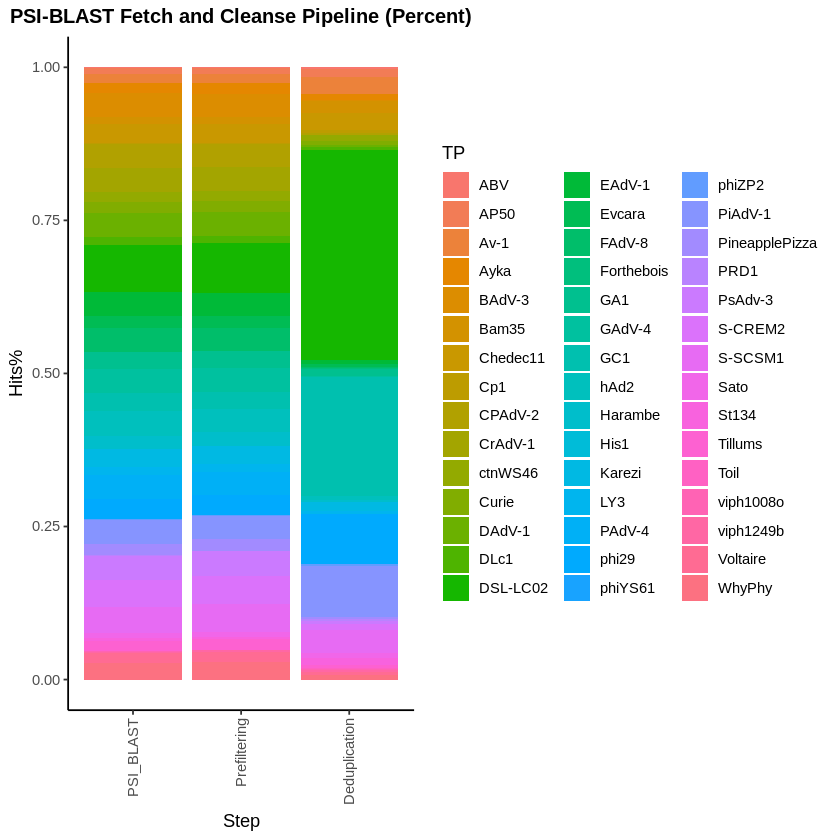

In [ ]:
# Load necessary library
library(ggplot2)
library(tidyr)

# Reshape the data to long format
long <- final %>%
  pivot_longer(
    cols = -TP, # Exclude the ID column
    names_to = "Step", # Name for the new condition column
    values_to = "Hits" # Name for the new value column
  )

long$Step <- factor(long$Step, levels = unique(long$Step))

# Stacked bar plot
ggplot(long, aes(x = Step, y = Hits, fill = TP)) +
  geom_bar(stat = "identity") + # Stacked bar plot
  theme_minimal() +
  labs(title = "PSI-BLAST Fetch and Clenase Pipeline",
       x = "Step",
       y = "Hits") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

ggplot(long, aes(x = Step, y = Hits, fill = TP)) +
  geom_bar(position = "fill", stat = "identity") + # Stacked bar plot
  theme_minimal() +
  labs(title = "PSI-BLAST Fetch and Cleanse Pipeline (Percent)",
       x = "Step",
       y = "Hits%") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 13802 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


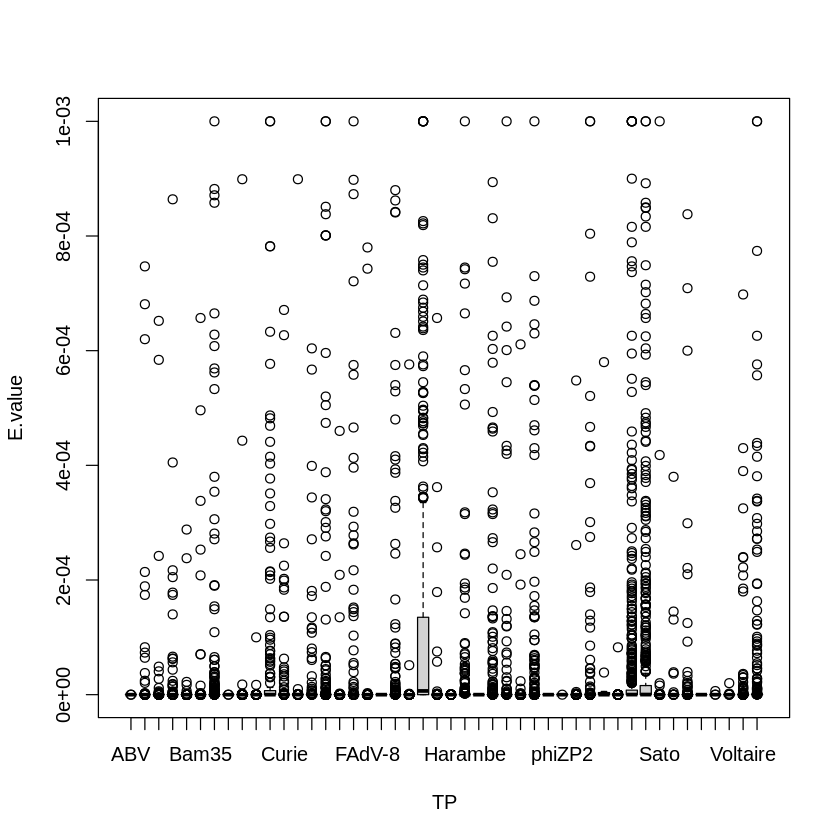

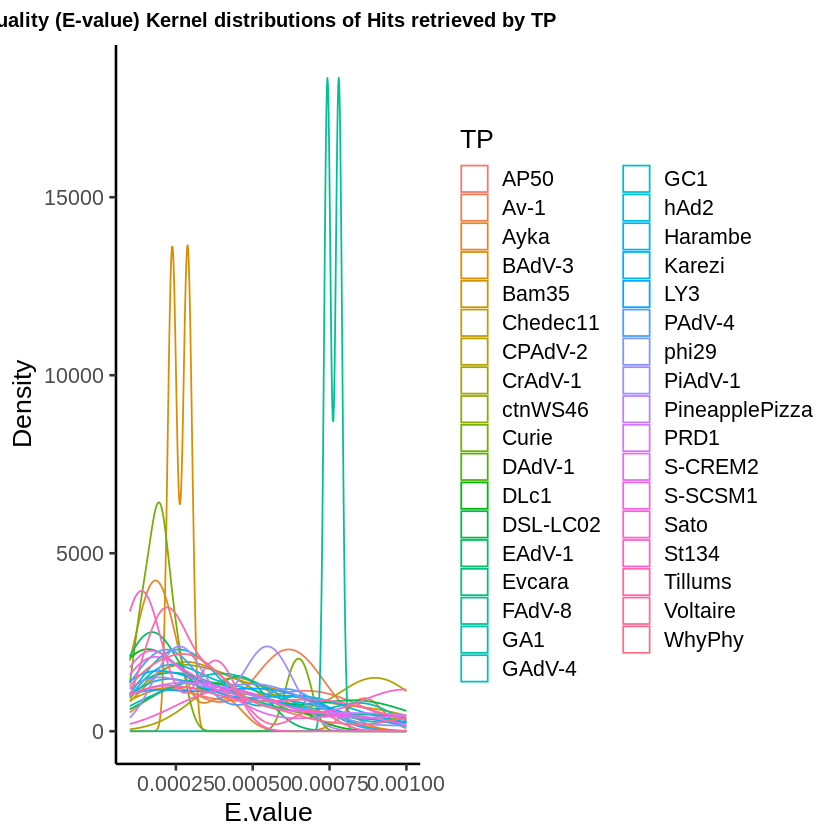

In [ ]:
library("ggplot2")

Hits <- read.csv("PSI-BLAST_results.csv", header=TRUE, sep=",")

boxplot(E.value ~ TP, data = Hits)

plt <- ggplot(Hits, aes(x=TP, y=E.value)) + geom_violin(trim=FALSE) + scale_y_log10()
q <- plt + stat_summary(fun=mean, geom="point", shape=23, size=2, color="red") + geom_jitter(height = 0, width = 0.1, color = "lightgrey") + geom_boxplot(width=0.1, color="black", alpha=0.2) + theme_classic(base_size = 16)

p <- ggplot(Hits, aes(x=E.value, color=TP)) + geom_density() + scale_x_log10() + xlim(0.0001, 0.001) + labs(title = "Quality (E-value) Kernel distributions of Hits retrieved by TP", y = "Density")+ theme_classic(base_size = 16) + theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))
p

Empire  Realm         Kingdom        Phylum                      
1   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
2   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
3   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
4   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
5   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
6   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
7   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
8   Viruses Duplodnaviria Heunggongvirae Uroviricota                 
9   Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
10  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
11  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
12  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
13  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
14  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
15  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
16  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
17  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
18  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
19  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
20  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
21  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
22  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
23  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
24  Cytota  Bacteria      Pseudomonadati Pseudomonadota              
25  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
26  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
27  Cytota  Bacteria      Pseudomonadati Pseudomonadota              
28  Cytota  Bacteria      Pseudomonadati Pseudomonadota              
29  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
30  Viruses Varidnaviria  Bamfordvirae   Preplasmiviricota           
⋮   ⋮       ⋮             ⋮              ⋮                           
734 Cytota  Bacteria      Pseudomonadati Candidatus Brocadiales      
735 Cytota  Bacteria      Pseudomonadati Kiritimatiellota            
736 Cytota  Bacteria      Pseudomonadati Pseudomonadota              
737 Cytota  Bacteria      Bacillati      Actinomycetota              
738 Cytota  Bacteria      Pseudomonadati Candidatus Acidiferrum      
739 Cytota  Bacteria      Bacillati      Actinomycetota              
740 Cytota  Bacteria      Bacillati      Actinomycetota              
741 Cytota  Bacteria      Pseudomonadati Pseudomonadota              
742 Cytota  Eukaryota     Fungi          Basidiomycota               
743 Cytota  Bacteria      Bacillati      Bacillota                   
744 Cytota  Bacteria      Pseudomonadati Pseudomonadota              
745 Cytota  Eukaryota     Fungi          Ascomycota                  
746 Cytota  Bacteria      Pseudomonadati Pseudomonadota              
747 Viruses Duplodnaviria Heunggongvirae Uroviricota                 
748 Cytota  Bacteria      Bacillati      Actinomycetota              
749 Cytota  Bacteria      Bacillati      Bacillota                   
750 Cytota  Bacteria      Pseudomonadati Pseudomonadota              
751 Cytota  Bacteria      Bacillati      Actinomycetota              
752 Cytota  Bacteria      Pseudomonadati Pseudomonadota              
753 Cytota  Bacteria      Bacillati      Actinomycetota              
754 Cytota  Bacteria      Bacillati      Bacillota                   
755 Cytota  Bacteria      Pseudomonadati Pseudomonadota              
756 Cytota  Bacteria      Pseudomonadati Bacteroidota                
757 Cytota  Bacteria      Bacillati      Bacillota                   
758 Cytota  Bacteria      Pseudomonadati Candidatus Bathyanammoxibius
759 Cytota  Ba

Realm         Count
1 Varidnaviria  139  
2 Duplodnaviria 224  
3 Bacteria      355  
4 UNKNOWN        12  
5 Archaea        20  
6 Eukaryota      13

Realm         Count
1 Varidnaviria  139  
2 Duplodnaviria 224  
3 UNKNOWN        12

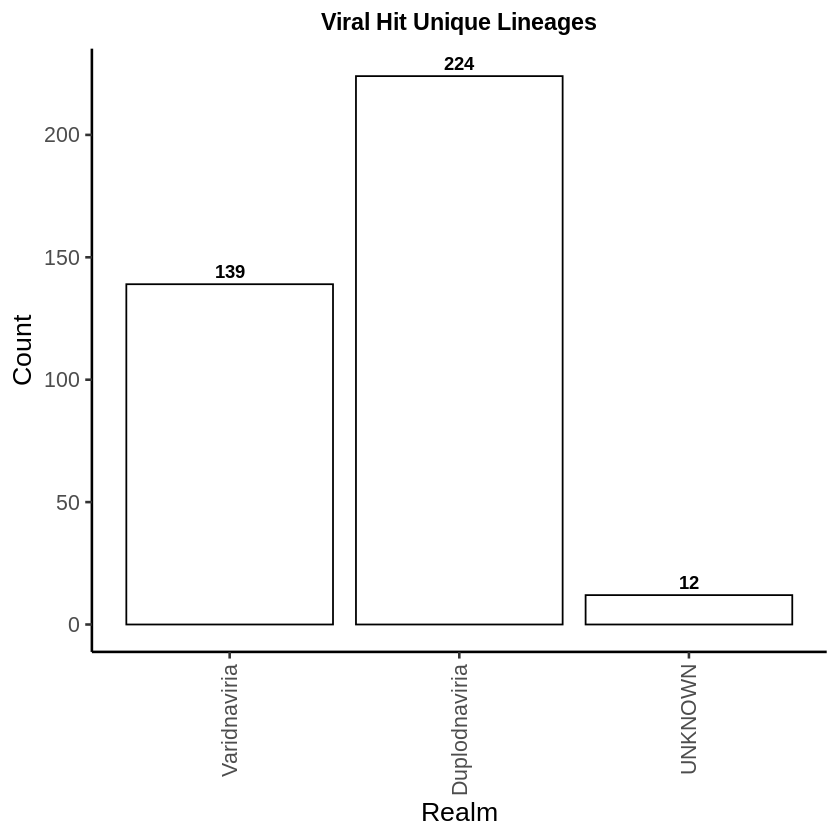

In [ ]:
library(ggplot2)
library(tidyr)
library(dplyr)

lin <- read.csv("lineage_classification_results_updated.csv", header = TRUE, sep = ",")
lin

lin <- lin %>%
  mutate(Realm = ifelse(Realm == "" | is.na(Realm), "UNKNOWN", Realm))
lin$Realm <- factor(lin$Realm, levels = unique(lin$Realm))

real <- as.data.frame(table(lin$Realm))
real <- rename(real, Realm = Var1)
real <- rename(real, Count = Freq)
real

filt <- real %>%
  filter(!Realm %in% c("Bacteria", "Archaea", "Eukaryota"))

filt


b <- ggplot(filt, aes(x=Realm, y=Count)) + geom_bar(stat = "identity", fill = "white", color = "black") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), plot.title = element_text(hjust = 0.5, size = 14, face = "bold")) + ggtitle("Viral Hit Unique Lineages")
b

#**Combined Scrutiny**

In [ ]:
install.packages("ggVennDiagram")
install.packages("lessR")
library("ggVennDiagram")
library("ggplot2")
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridGraphics’, ‘ggfun’, ‘ggplotify’, ‘patchwork’, ‘admisc’, ‘aplot’, ‘venn’, ‘yulab.utils’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘interp’, ‘DEoptimR’, ‘svglite’, ‘latticeExtra’, ‘robustbase’, ‘ellipse’, ‘leaps’, ‘openxlsx’, ‘colorspace’, ‘kableExtra’, ‘xts’, ‘zoo’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
main <- read.csv("FINAL_results_updated.csv", header = TRUE, sep = ",")
main

pre <- read.csv("WHOLESET_results.csv", header = TRUE, sep = ",")

Hit            GenBankID       aln_hit X.I    P.H.  E.value  Bit.Score
1    AOC84064.1     AOC84064.1      352     99.148 1     0        716      
2    ANA50312.1     ANA50312.1      354     98.023 1     0        711      
3    XEQ86939.1     XEQ86939.1      374     99.465 1     0        752      
4    QOV03173.1     QOV03173.1      378     72.487 1     0        549      
5    AGT76236.1     AGT76236.1      442     74.661 1     0        573      
6    QWK52450.1     QWK52450.1      415     68.675 1     0        561      
7    WJJ54608.1     WJJ54608.1      534     61.798 1     0        578      
8    DAW83362.1     DAW83362.1      281     89.324 1     0        521      
9    BCZ16696.1     BCZ16696.1      566     62.898 1     0        624      
10   YP_010790674.1 YP_010790674.1  585     60.684 1     0        622      
11   NP_043879.1    NP_043879.1     571     58.844 1     0        590      
12   WZB38155.1     WZB38155.1      572     33.217 1     0        586      
13   UPO25000.1     UPO25000.1      570     79.649 1     0        794      
14   DBA48924.1     DBA48924.1      588     33.163 1     0        609      
15   WXG22698.1     WXG22698.1      594     31.313 1     0        643      
16   WXG22478.1     WXG22478.1      594     31.313 1     0        629      
17   YP_009388312.1 YP_009388312.1  598     29.766 1     0        593      
18   WXG22732.1     WXG22732.1      600     31.167 1     0        656      
19   XBH23610.1     XBH23610.1      601     32.779 1     0        644      
20   WRQ19845.1     WRQ19845.1      596     31.544 1     0        631      
21   AYC35462.1     AYC35462.1      622     56.270 1     0        602      
22   NP_050282.1    NP_050282.1     613     56.117 1     0        590      
23   AEK79911.1     AEK79911.1      602     30.897 1     0        636      
24   QRV11644.1     QRV11644.1      597     30.318 1     0        632      
25   NP_108659.1    NP_108659.1     601     31.281 1     0        628      
26   XCK17000.1     XCK17000.1      620     31.129 1     0        608      
27   YP_010796273.1 YP_010796273.1  623     32.424 1     0        577      
28   WXG22927.1     WXG22927.1      603     29.519 1     0        574      
29   QQD36934.1     QQD36934.1      601     50.083 1     0        585      
30   UKS51808.1     UKS51808.1      602     61.296 1     0        650      
⋮    ⋮              ⋮               ⋮       ⋮      ⋮     ⋮        ⋮        
3280 A0A1L2JY30     KX965989        166     12.0   0.505 0.009404  51      
3281 Q9Z7G7         AE001363        215     11.1   0.872 0.009489  65      
3282 Q9Z7G7         AE002161        215     11.1   0.872 0.009489  65      
3283 Q9Z7G7         BA000008        215     11.1   0.872 0.009489  65      
3284 Q9Z7G7         AE009440        215     11.1   0.872 0.009489  65      
3285 A0A1T5A5E6     FUYR01000001    431     10.9   1.000 0.009525 109      
3286 A0A5A7NZL0     BKCP01000558    466     11.8   0.998 0.009525  94      
3287 A0A7J2RCA5     DRGA01001252    456     10.7   0.995 0.009525  88      
3288 H8KMQ8         CP003349        475     11.7   0.993 0.009525  86      
3289 A0A5C7PSK2     SSEM01000350    551     10.1   0.991 0.009525  84      
3290 A0A1W6JSW6     KY780482        450     11.5   0.990 0.009525  83      
3291 A0A535HK61     VBIW01000167    617     11.6   0.981 0.009525  79      
3292 A0A4R1NMB7     SJOI01000001    595      9.7   0.975 0.009525  77      
3293 A0A5B8IHV2     MK250085        394     11.1   0.956 0.009525  73      
3294 A0A7J4UMS7     DUHL01000141    168     10.7   1.000 0.009556 102      
3295 A0A3D3CDB3     DPWY01000010    159     10.0   0.999 0.009556  96      
3296 A0A101FLQ8     LGFQ01000046    166     13.2   0.998 0.009556  93      
3297 Q9M1L0         AY050383        490     12.0   0.956 0.009556  73      
3298 Q9M1L0         AL138654        490     12.0   0.956 0.009556  73      
3299 A0A8S5QKM9     BK015667        134     11.9   0.986 0.009868  81      
3300 A0A1C0Z251     MATO01000008    389     11.0   1.

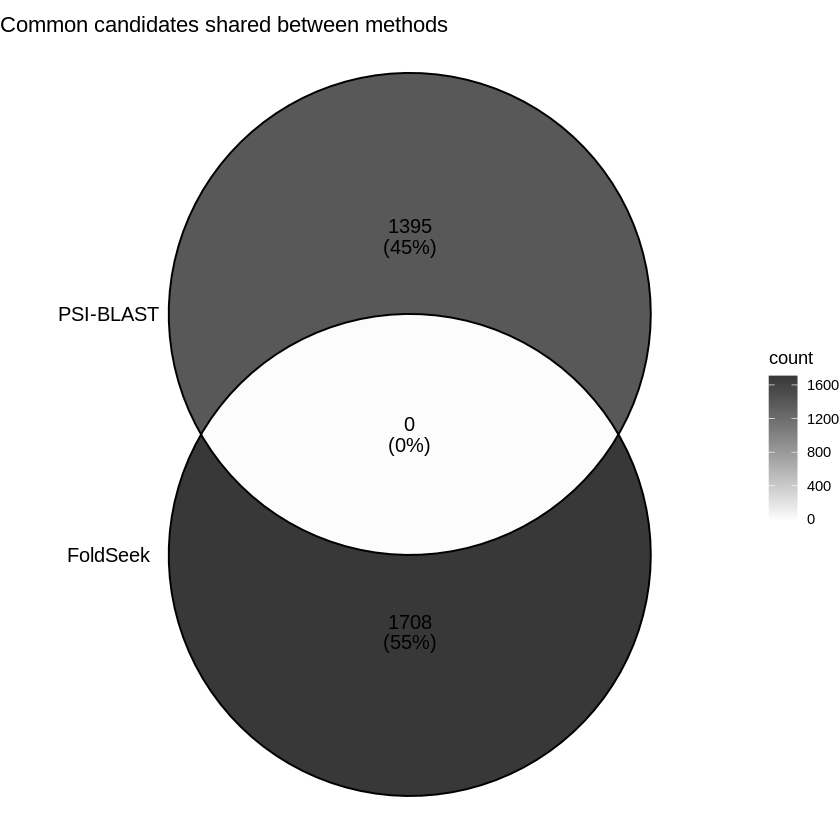

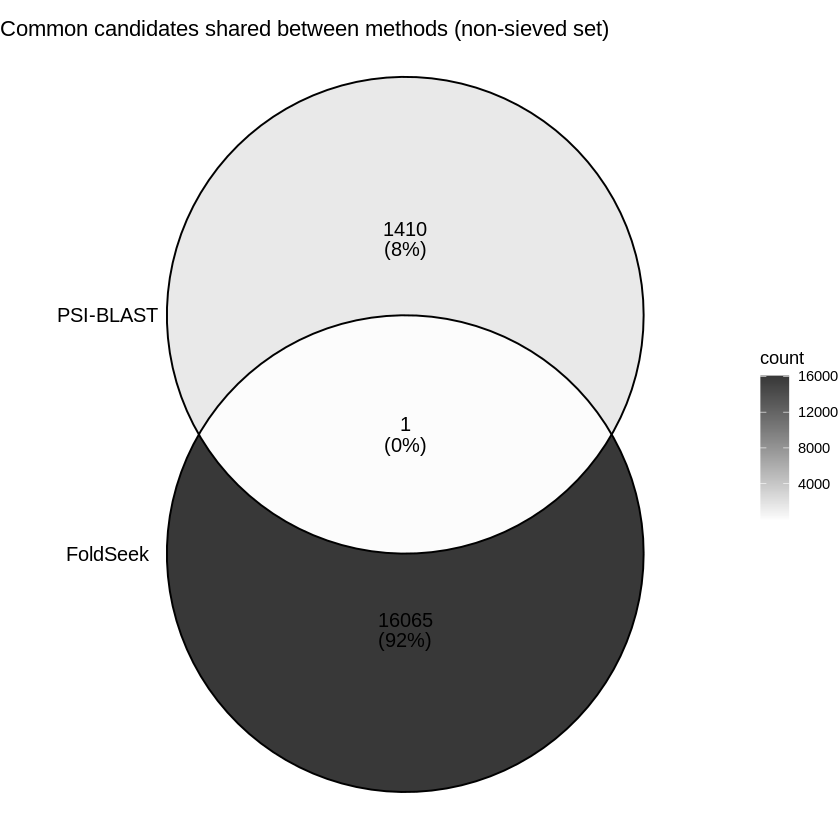

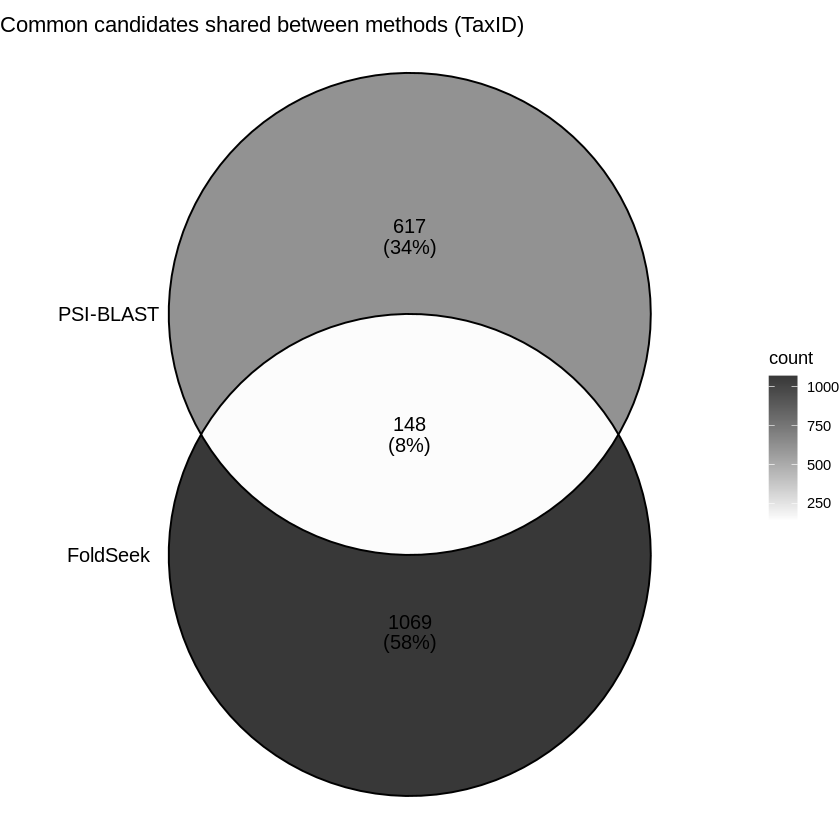

In [ ]:
library(stringr)

main <- main %>%
  mutate(GenBankID = if_else(Method == "PSI-BLAST", str_sub(GenBankID, 1, -3), GenBankID))
venn_data <- split(main$GenBankID, main$Method)
venn_plot <- ggVennDiagram(
  venn_data,
  label_alpha = 0, # Make labels opaque for better readability
  edge_size = 0.55  # Adjust edge thickness
) +
  scale_fill_gradient(low = "gray99", high = "gray22") +
  scale_x_continuous(expand = expansion(mult = .2)) +
  ggtitle("Common candidates shared between methods")

# Print the plot
print(venn_plot)

pre <- pre %>%
  mutate(GenBankID = if_else(Method == "PSI-BLAST", str_sub(GenBankID, 1, -3), GenBankID))
venn_pre <- split(pre$GenBankID, pre$Method)
venn_plot_pre <- ggVennDiagram(
  venn_pre,
  label_alpha = 0, # Make labels opaque for better readability
  edge_size = 0.55  # Adjust edge thickness
) +
  scale_fill_gradient(low = "gray99", high = "gray22") +
  scale_x_continuous(expand = expansion(mult = .2)) +
  ggtitle("Common candidates shared between methods (non-sieved set)")

# Print the plot
print(venn_plot_pre)



venn_tax <- split(main$TaxID, main$Method)
venn_tax_plot <- ggVennDiagram(
  venn_tax,
  label_alpha = 0,
  edge_size = 0.55
) +
  scale_fill_gradient(low = "gray99", high = "gray22") +
  scale_x_continuous(expand = expansion(mult = .2)) +
  ggtitle("Common candidates shared between methods (TaxID)")
print(venn_tax_plot)

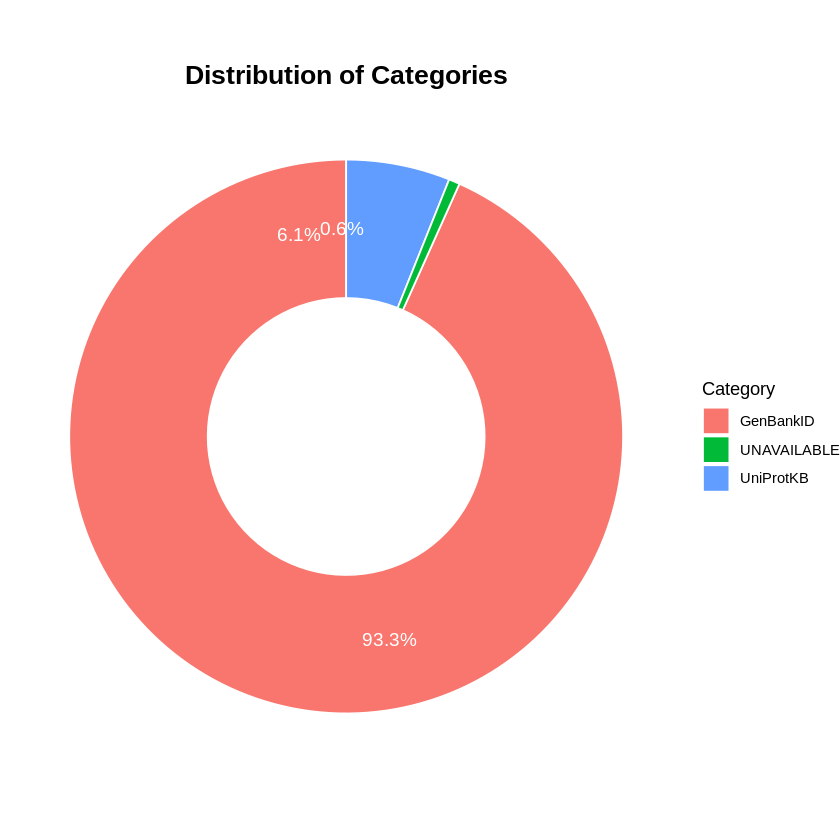

In [ ]:
# Load required libraries
library(ggplot2)

# Your dataset
ret <- data.frame(
  Category = c("GenBankID", "UniProtKB", "UNAVAILABLE"),
  Count = c(4368, 284, 30)
)


ret$Percentage <- ret$Count / sum(ret$Count) * 100
ret$Cumulative <- cumsum(ret$Count) - (ret$Count / 2)


# Create a doughnut chart
ggplot(ret, aes(x = 2, y = Count, fill = Category)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  theme_void() +
  geom_text(aes(
    y = Cumulative,
    label = paste0(round(Percentage, 1), "%")
  ), color = "white", size = 4) +
  xlim(0.5, 2.5) +
  ggtitle("Distribution of Categories") +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))


Taxon        Count
1 Virus        1263 
2 Bacteria     1696 
3 Archaea       106 
4 Eukaryota     165 
5 Parakaryota     0 
6 OtherAcytota    0 
7 Unclassified   79

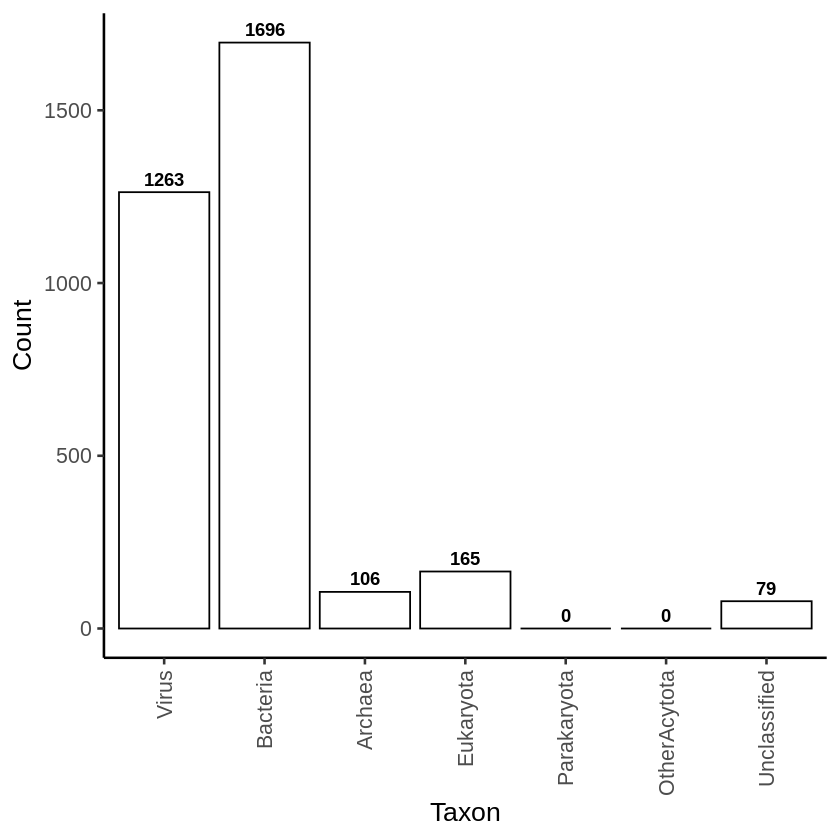

In [ ]:
library(dplyr)
library(ggplot2)
tax <- read.csv("tax_count_FULL.csv", header = FALSE)
tax <- rename(tax, Taxon = V1)
tax <- rename(tax, Count = V2)
tax

tax$Taxon <- factor(tax$Taxon, levels = unique(tax$Taxon))

b <- ggplot(tax, aes(x=Taxon, y=Count)) + geom_bar(stat = "identity", color = "black", fill = "white") + geom_text(aes(label = Count), vjust = -0.5, fontface = "bold") + theme_classic(base_size = 16) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
b

Description                                                                                                                                                                                                                                                                                                                      
1   -                                                                                                                                                                                                                                                                                                                                
2   Belongs to the helicase family. UvrD subfamily                                                                                                                                                                                                                                                                                   
3   Pectate lyase superfamily protein                                                                                                                                                                                                                                                                                                
4   PD-(D/E)XK nuclease superfamily                                                                                                                                                                                                                                                                                                  
5   Adenoviral DNA terminal protein                                                                                                                                                                                                                                                                                                  
6   Domain of unknown function DUF83                                                                                                                                                                                                                                                                                                 
7   CRISPR-associated protein Cas4                                                                                                                                                                                                                                                                                                   
8   Belongs to the glycosyl hydrolase 28 family                                                                                                                                                                                                                                                                                      
9   PDDEXK-like domain of unknown function (DUF3799)                                                                                                                                                                                                                                                                                 
10  Periplasmic copper-binding protein (NosD)                                                                                                                                                                                                                                                                                        
11  outer membrane                                                                                                                                                                                                                                                                                                                   
12  Glycosyl hydrolases family 28                                                           

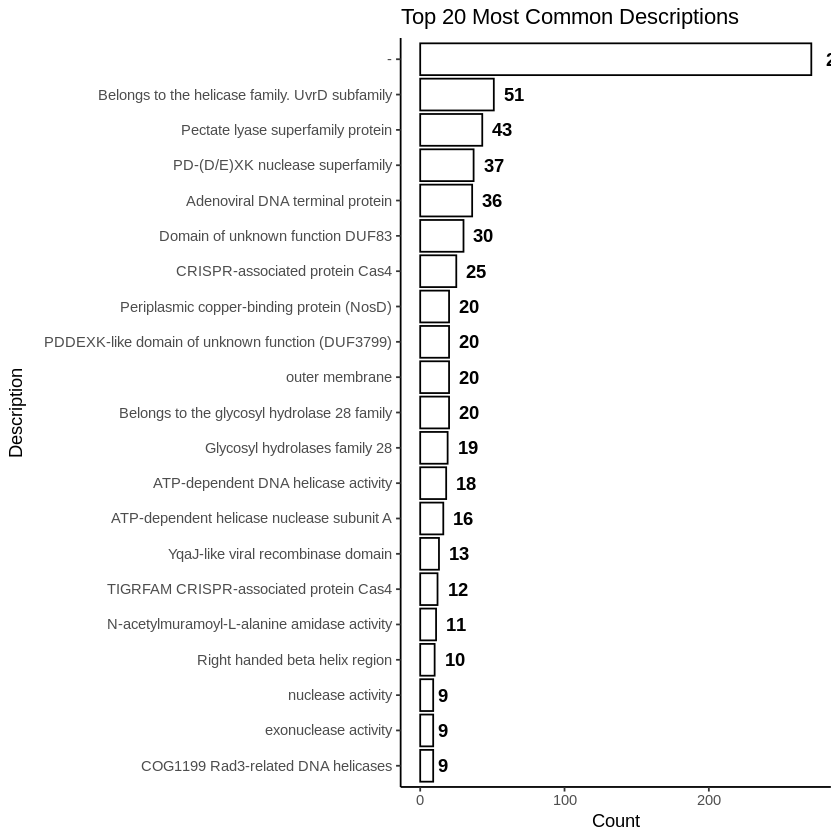

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
annotations <- read.csv("TP_annotation_eggNOG.tsv", header = TRUE, sep = "\t", comment = "#")

# Assuming df is your dataframe
# Count occurrences of each unique description
description_counts <- annotations %>%
  count(Description, sort = TRUE)  # Count occurrences and sort

description_counts
description_counts <- description_counts %>% filter(!is.na(Description))

# Plot the bar chart
top_descriptions <- description_counts %>%
  top_n(20, n)  # Show only the top 20 descriptions

desc <- ggplot(top_descriptions, aes(x = reorder(factor(Description), n), y = n)) +
  geom_bar(stat = "identity", color = "black", fill = "white") +
  geom_text(aes(label = n), hjust = -0.5, fontface = "bold") +
  coord_flip() +
  labs(title = "Top 20 Most Common Descriptions",
       x = "Description",
       y = "Count") +
  theme_classic()
desc

In [ ]:
ggsave("Descriptions.pdf", plot = desc, width = 12, height = 6, units = "in", useDingbats = FALSE)

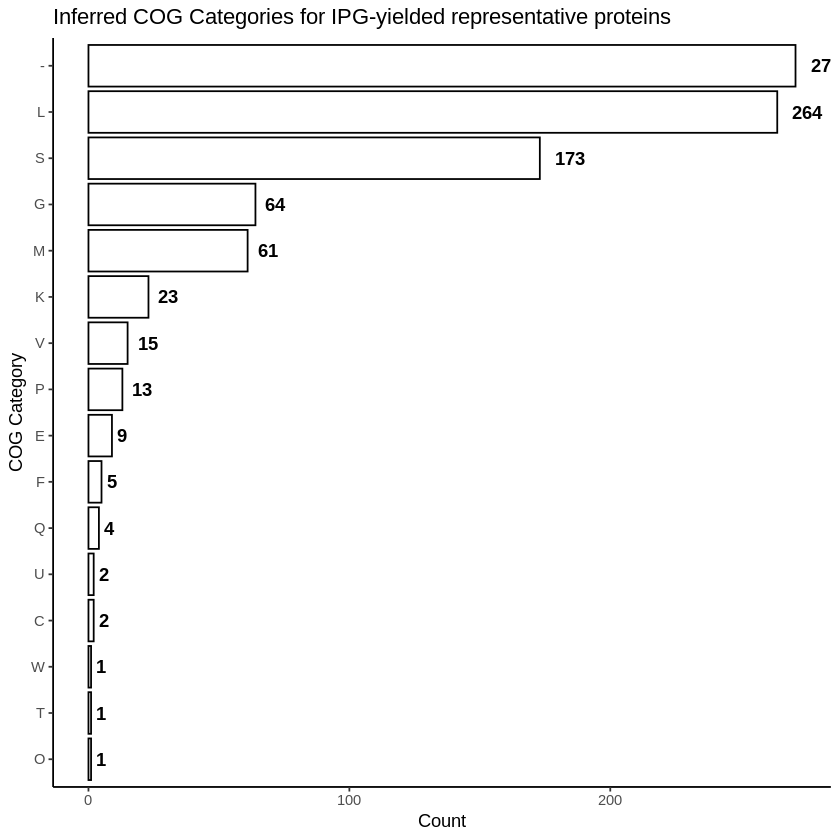

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)

annotations <- read.csv("TP_annotation_eggNOG.tsv", header = TRUE, sep = "\t", comment = "#")

# Split multi-letter COG_category into multiple rows (e.g., "AB" → "A", "B")
annotations <- annotations %>%
  mutate(COG_category = as.character(COG_category)) %>%
  separate_rows(COG_category, sep = "")

# Remove empty strings that can result from the split
annotations <- annotations %>%
  filter(COG_category != "")

# Count occurrences and sort
description_counts <- annotations %>%
  count(COG_category, sort = TRUE) %>%
  filter(!is.na(COG_category))

# Show top 20
top_descriptions <- description_counts %>%
  top_n(20, n)

# Plot
desc <- ggplot(top_descriptions, aes(x = reorder(factor(COG_category), n), y = n)) +
  geom_bar(stat = "identity", color = "black", fill = "white") +
  geom_text(aes(label = n), hjust = -0.5, fontface = "bold") +
  coord_flip() +
  labs(title = "Inferred COG Categories for IPG-yielded representative proteins",
       x = "COG Category",
       y = "Count") +
  theme_classic()

desc

In [ ]:
ggsave("COG_distibution.pdf", plot = desc, width = 8.5, height = 6, units = "in", useDingbats = FALSE)

novel_fam n 
1  NOVRBAUE  11
2  NOVTOAE9  10
3  NOV8BIW6   6
4  NOVVKA6S   4
5  NOV3U2RV   2
6  NOVBYDJM   2
7  NOVG0224   2
8  NOVQVVKF   2
9  NOVREAUA   1
10 NOVX1VXG   1

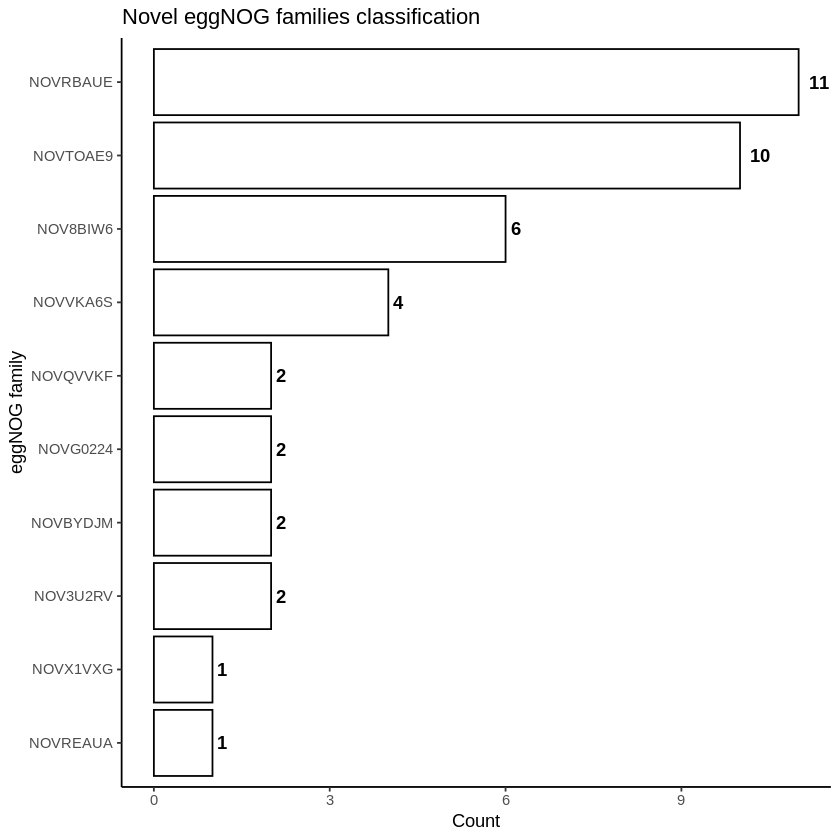

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
annotations <- read.csv("TP_annotation_eggNOG_novel.tsv", header = TRUE, sep = "\t", comment = "#")

# Count occurrences of each unique description
description_counts <- annotations %>%
  count(novel_fam, sort = TRUE)  # Count occurrences and sort

description_counts
description_counts <- description_counts %>% filter(!is.na(novel_fam))

desc <- ggplot(description_counts, aes(x = reorder(factor(novel_fam), n), y = n)) +
  geom_bar(stat = "identity", color = "black", fill = "white") +
  geom_text(aes(label = n), hjust = -0.5, fontface = "bold") +
  coord_flip() +
  labs(title = "Novel eggNOG families classification",
       x = "eggNOG family",
       y = "Count") +
  theme_classic()
desc

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



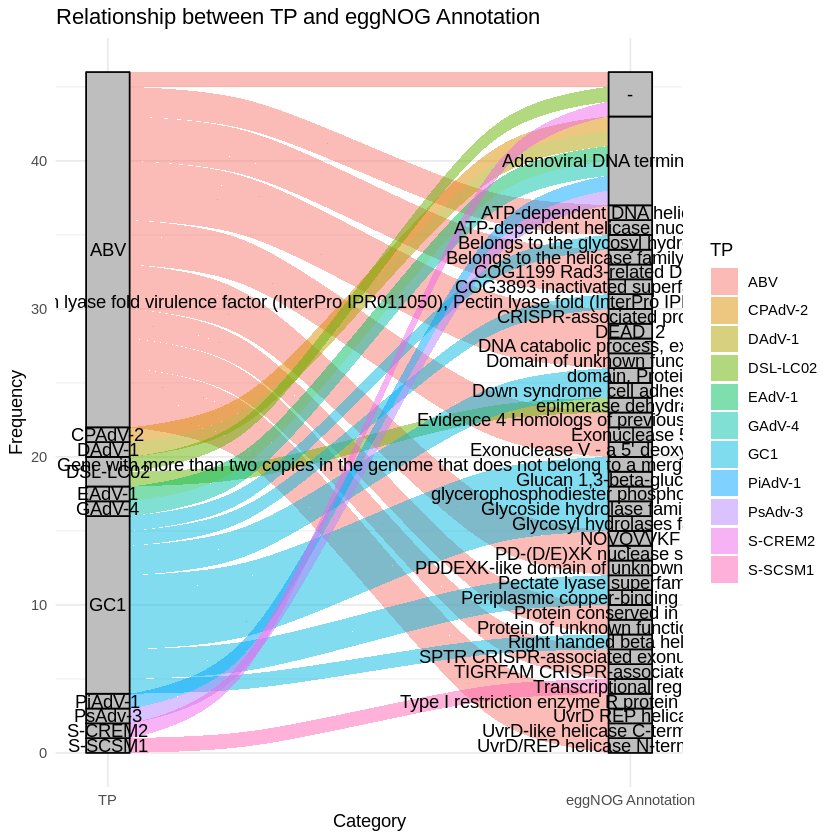

In [ ]:
install.packages("ggalluvial")

library(ggplot2)
library(ggalluvial)


df <- read.csv("Query_TP_eggNOG_funcs.csv", stringsAsFactors = FALSE)


df <- df[!is.na(df$eggNOG_Annotation) & df$eggNOG_Annotation != "", ]


egg_plot <- ggplot(df,
       aes(axis1 = TP, axis2 = eggNOG_Annotation)) +
  geom_alluvium(aes(fill = TP), width = 1/12) +
  geom_stratum(width = 1/12, fill = "grey", color = "black") +
  geom_text(stat = "stratum", aes(label = after_stat(stratum))) +
  scale_x_discrete(limits = c("TP", "eggNOG Annotation"), expand = c(0.05, 0.05)) +
  labs(title = "Relationship between TP and eggNOG Annotation",
       x = "Category",
       y = "Frequency") +
  theme_minimal()

egg_plot

In [ ]:
ggsave("eggNOG_nv_alluvial.pdf", plot = egg_plot, width = 12, height = 6, units = "in", useDingbats = FALSE)

V1                                              
1   domain, Protein                                 
2   NOVQVVKF                                        
3   nan                                             
4   Adenoviral DNA terminal protein                 
5   Periplasmic copper-binding protein (NosD)       
6   nan                                             
7   nan                                             
8   nan                                             
9   Domain of unknown function DUF83                
10  Periplasmic copper-binding protein (NosD)       
11  glycerophosphodiester phosphodiesterase activity
12  CRISPR-associated protein Cas4                  
13  ATP-dependent DNA helicase activity             
14  nan                                             
15  nan                                             
16  ATP-dependent helicase nuclease subunit A       
17  Domain of unknown function DUF83                
18  nan                                             
19  -                                               
20  Belongs to the helicase family. UvrD subfamily  
21  TIGRFAM CRISPR-associated protein Cas4          
22  nan                                             
23  nan                                             
24  nan                                             
25  Adenoviral DNA terminal protein                 
26  nan                                             
27  nan                                             
28  nan                                             
29  nan                                             
30  epimerase dehydratase                           
⋮   ⋮                                               
289 ATP-dependent DNA helicase activity             
290 ATP-dependent DNA helicase activity             
291 nan                                             
292 nan                                             
293 Domain of unknown function DUF83                
294 nan                                             
295 nan                                             
296 nan                                             
297 nan                                             
298 Belongs to the glycosyl hydrolase 28 family     
299 UvrD REP helicase                               
300 Adenoviral DNA terminal protein                 
301 Adenoviral DNA terminal protein                 
302 nan                                             
303 nan                                             
304 nan                                             
305 Domain of unknown function DUF83                
306 Domain of unknown function DUF83                
307 nan                                             
308 -                                               
309 Domain of unknown function DUF83                
310 Glycosyl hydrolases family 28                   
311 nan                                             
312 nan                                             
313 nan                                             
314 Pectate lyase superfamily protein               
315 Glucan 1,3-beta-glucosidase                     
316 nan                                             
317 nan                                             
318 nan

V1                                                                                                                                                                                                                                           
2  Belongs to the helicase family. UvrD subfamily                                                                                                                                                                                               
3  Domain of unknown function DUF83                                                                                                                                                                                                             
4  Adenoviral DNA terminal protein                                                                                                                                                                                                              
5  PD-(D/E)XK nuclease superfamily                                                                                                                                                                                                              
6  CRISPR-associated protein Cas4                                                                                                                                                                                                               
7  ATP-dependent DNA helicase activity                                                                                                                                                                                                          
8  Glycosyl hydrolases family 28                                                                                                                                                                                                                
9  Pectate lyase superfamily protein                                                                                                                                                                                                            
10 Periplasmic copper-binding protein (NosD)                                                                                                                                                                                                    
11 -                                                                                                                                                                                                                                            
12 Belongs to the glycosyl hydrolase 28 family                                                                                                                                                                                                  
13 ATP-dependent helicase nuclease subunit A                                                                                                                                                                                                    
14 Protein conserved in bacteria                                                                                                                                                                                                                
15 DEAD_2                                                                                                                                                                                                                                       
16 DNA catabolic process, exonucleolytic                                                                                                                                                                                                        
17 Exonuclease V - a 5' deoxyribonuclease                                                                                                          

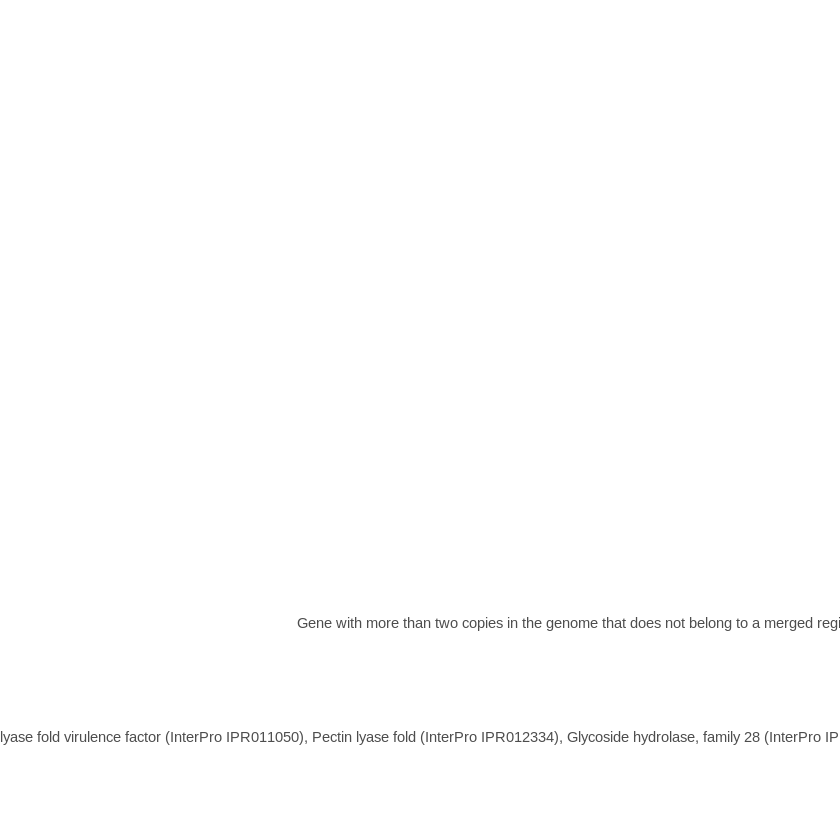

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
annotations <- read.csv("Non_viral_eggNOG_funcs_expanded.txt", header = FALSE, sep="\t")
annotations

# Count occurrences of each unique description
description_counts <- annotations %>%
  count(V1, sort = TRUE)  # Count occurrences and sort

description_counts <- description_counts %>% filter(!is.na(V1))
description_counts <- description_counts[!(description_counts $V1 %in% "nan"),]
description_counts

desc <- ggplot(description_counts, aes(x = reorder(factor(V1), n), y = n)) +
  geom_bar(stat = "identity", color = "black", fill = "white") +
  geom_text(aes(label = n), hjust = -0.5, fontface = "bold") +
  coord_flip() +
  labs(title = "Novel eggNOG families classification",
       x = "eggNOG family",
       y = "Count") +
  theme_classic()
desc

In [ ]:
ggsave("Descriptions_nv.pdf", plot = desc, width = 20, height = 6, units = "in", useDingbats = FALSE)

TP     
1   GC1    
2   ABV    
3   GC1    
4   PiAdV-1
5   GC1    
6   GC1    
7   GC1    
8   GC1    
9   ABV    
10  GC1    
11  GC1    
12  ABV    
13  ABV    
14  ABV    
15  GC1    
16  ABV    
17  ABV    
18  ABV    
19  GC1    
20  ABV    
21  ABV    
22  ABV    
23  GC1    
24  GC1    
25  GC1    
26  PiAdV-1
27  ABV    
28  ABV    
29  GC1    
30  GC1    
⋮   ⋮      
402 GC1    
403 ABV    
404 GC1    
405 ABV    
406 GC1    
407 GC1    
408 GC1    
409 ABV    
410 EAdV-1 
411 PiAdV-1
412 ABV    
413 ABV    
414 GC1    
415 GC1    
416 ABV    
417 ABV    
418 ABV    
419 ABV    
420 ABV    
421 GC1    
422 GC1    
423 ABV    
424 GC1    
425 GC1    
426 GC1    
427 GC1    
428 GC1    
429 GC1    
430 ABV    
431 GC1

TP        n  
1  ABV       192
2  GC1       143
3  PiAdV-1    65
4  DSL-LC02    6
5  EAdV-1      5
6  CPAdV-2     3
7  DAdV-1      2
8  St134       2
9  Ayka        1
10 Chedec11    1
11 Curie       1
12 GAdV-4      1
13 PRD1        1
14 PsAdv-3     1
15 S-CREM2     1
16 S-SCSM1     1
17 Sato        1
18 WhyPhy      1
19 phi29       1
20 phiZP2      1
21 viph1008o   1

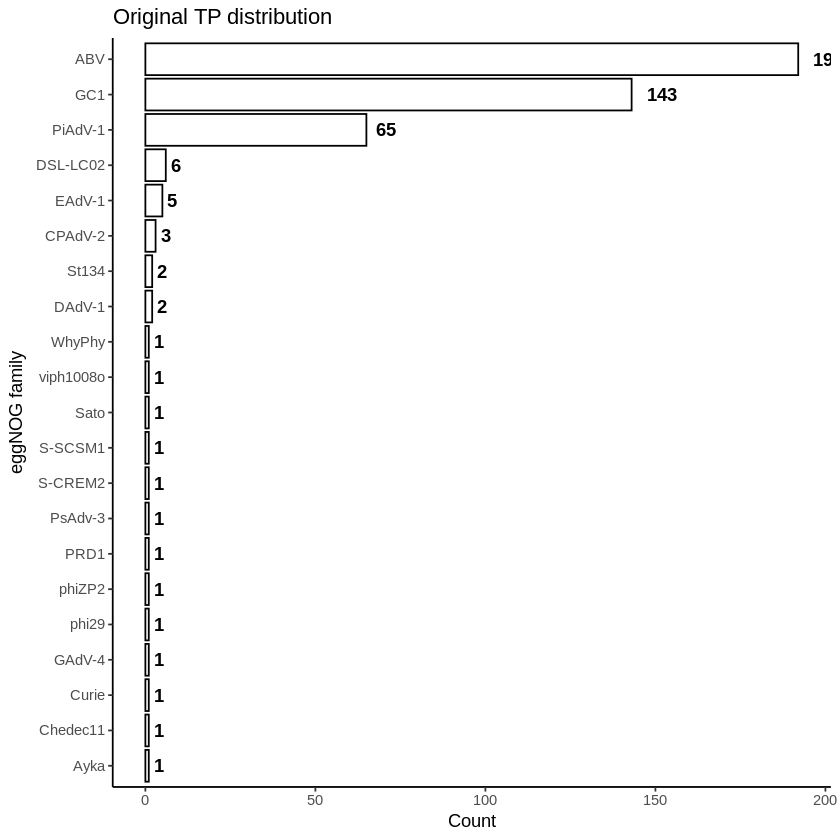

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
annotations <- read.csv("Non_viral_query_TP_pseudorollback.csv", header = TRUE, sep="\t")
annotations

# Count occurrences of each unique description
TP_counts <- annotations %>%
  count(TP, sort = TRUE)  # Count occurrences and sort

TP_counts <- TP_counts %>% filter(!is.na(TP))
TP_counts <- TP_counts[!(TP_counts $TP %in% "nan"),]
TP_counts

query_tp_plot <- ggplot(TP_counts, aes(x = reorder(factor(TP), n), y = n)) +
  geom_bar(stat = "identity", color = "black", fill = "white") +
  geom_text(aes(label = n), hjust = -0.5, fontface = "bold") +
  coord_flip() +
  labs(title = "Original TP distribution",
       x = "eggNOG family",
       y = "Count") +
  theme_classic()
query_tp_plot

#**qTMcluster**

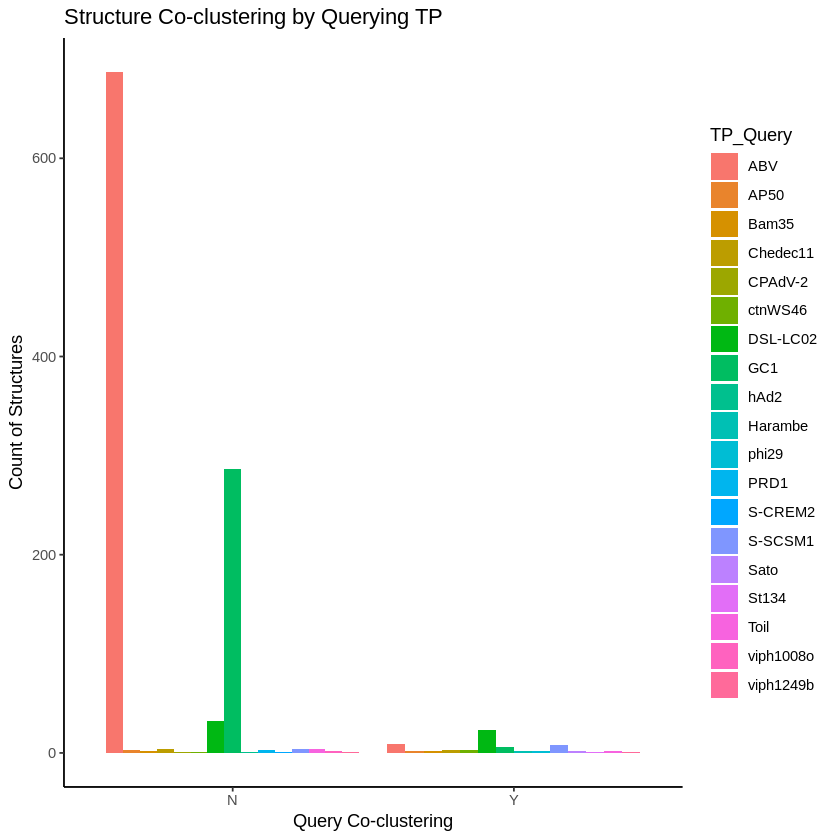

In [ ]:
library(dplyr)
library(ggplot2)

qTM_df <- read.csv("qTMcluster_results_updated.csv", header = TRUE, sep=",")
df_clean <- qTM_df %>%
  filter(!is.na(TP_Query) & TP_Query != "",
         !is.na(Query_Coclustering) & Query_Coclustering != "")

coclust_plot <- ggplot(df_clean, aes(x = Query_Coclustering, fill = TP_Query)) +
  geom_bar(position = "dodge") +
  labs(
    x = "Query Co-clustering",
    y = "Count of Structures",
    title = "Structure Co-clustering by Querying TP"
  ) +
  theme_classic()
coclust_plot

`summarise()` has grouped output by 'TP_Query'. You can override using the
`.groups` argument.


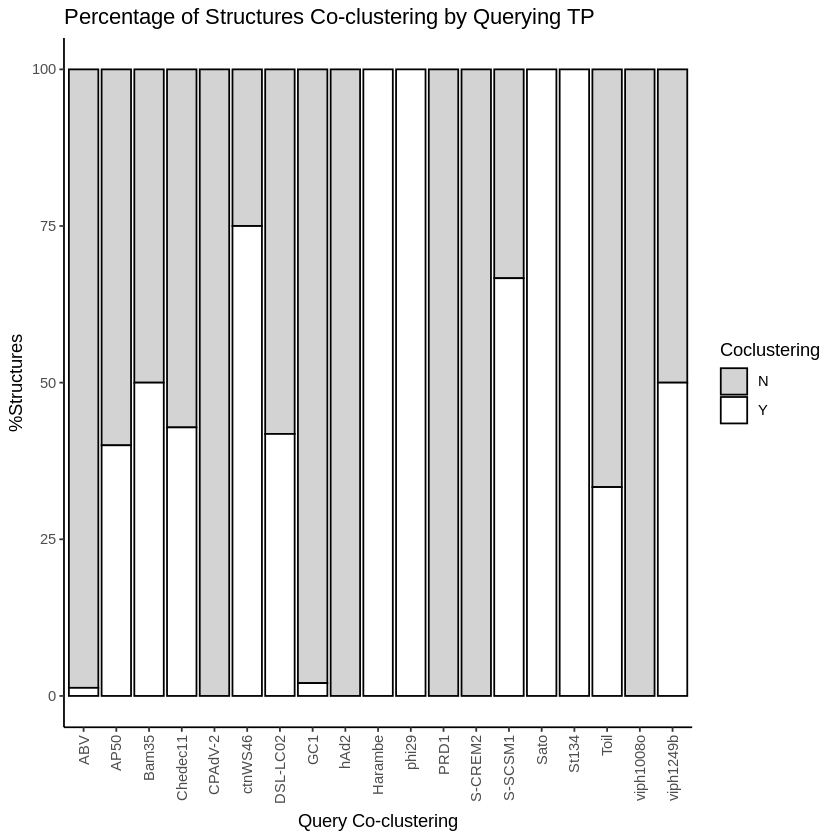

In [ ]:
library(ggplot2)
library(dplyr)

df_clean <- qTM_df %>%
  filter(!is.na(TP_Query), Query_Coclustering %in% c("Y", "N"))

df_percent <- df_clean %>%
  group_by(TP_Query, Query_Coclustering) %>%
  summarise(Count = n()) %>%
  mutate(Percent = Count / sum(Count) * 100)

ggplot(df_percent, aes(x = TP_Query, y = Percent, fill = Query_Coclustering)) +
  geom_bar(stat = "identity", position = "stack", color = "black") +
  scale_fill_manual(values = c("Y" = "white", "N" = "lightgrey")) +
  labs(
    x = "Query Co-clustering",
    y = "%Structures",
    fill = "Coclustering",
    title = "Percentage of Structures Co-clustering by Querying TP"
  ) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

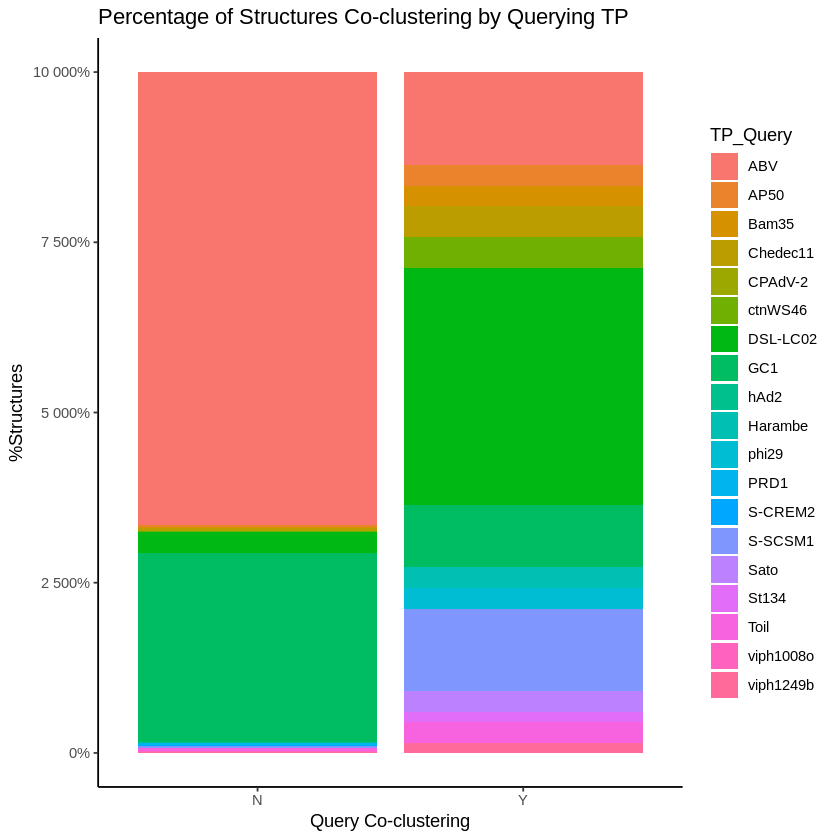

In [ ]:
library(dplyr)
library(ggplot2)

df_clean <- qTM_df %>%
  filter(!is.na(TP_Query), TP_Query != "",
         !is.na(Query_Coclustering), Query_Coclustering %in% c("Y", "N"))

df_summary <- df_clean %>%
  group_by(Query_Coclustering, TP_Query) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Query_Coclustering) %>%
  mutate(Percent = Count / sum(Count) * 100)

ggplot(df_summary, aes(x = Query_Coclustering, y = Percent, fill = TP_Query)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    x = "Query Co-clustering",
    y = "%Structures",
    title = "Percentage of Structures Co-clustering by Querying TP"
  ) +
  theme_classic() +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  theme(legend.position = "right")

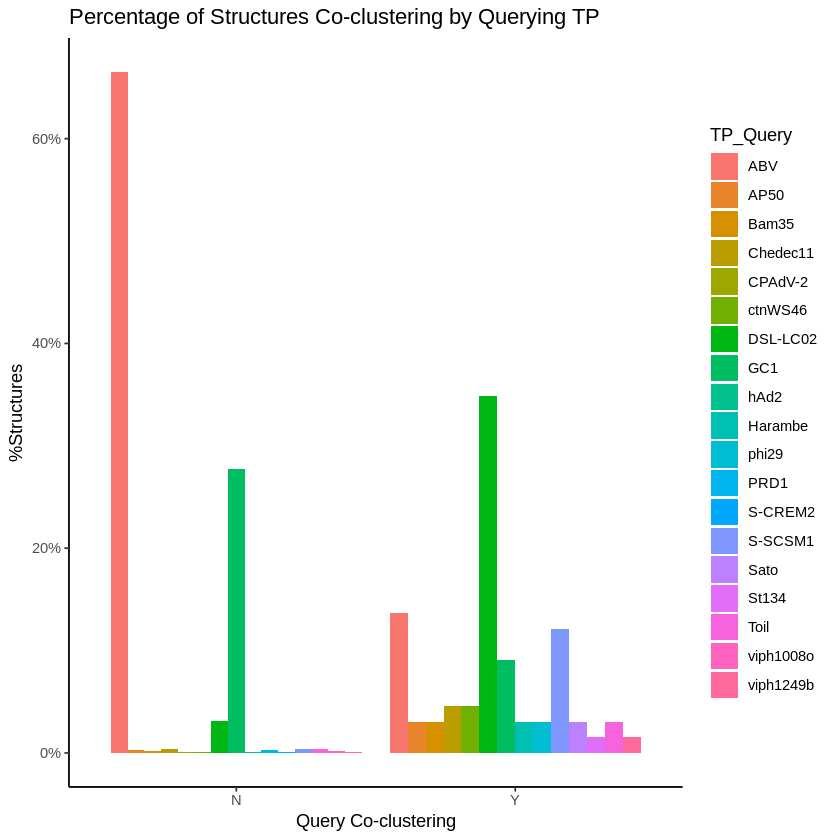

In [ ]:
library(dplyr)
library(ggplot2)

# Clean the data: remove NA/empty values
df_clean <- qTM_df %>%
  filter(!is.na(TP_Query), TP_Query != "",
         !is.na(Query_Coclustering), Query_Coclustering %in% c("Y", "N"))

# Summarize counts
df_summary <- df_clean %>%
  group_by(Query_Coclustering, TP_Query) %>%
  summarise(Count = n(), .groups = "drop") %>%
  group_by(Query_Coclustering) %>%
  mutate(Percent = Count / sum(Count) * 100)

# Plot
ggplot(df_summary, aes(x = Query_Coclustering, y = Percent, fill = TP_Query)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  labs(
    x = "Query Co-clustering",
    y = "%Structures",
    title = "Percentage of Structures Co-clustering by Querying TP"
  ) +
  theme_classic() +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  theme(legend.position = "right")


`summarise()` has grouped output by 'TP_Query'. You can override using the
`.groups` argument.


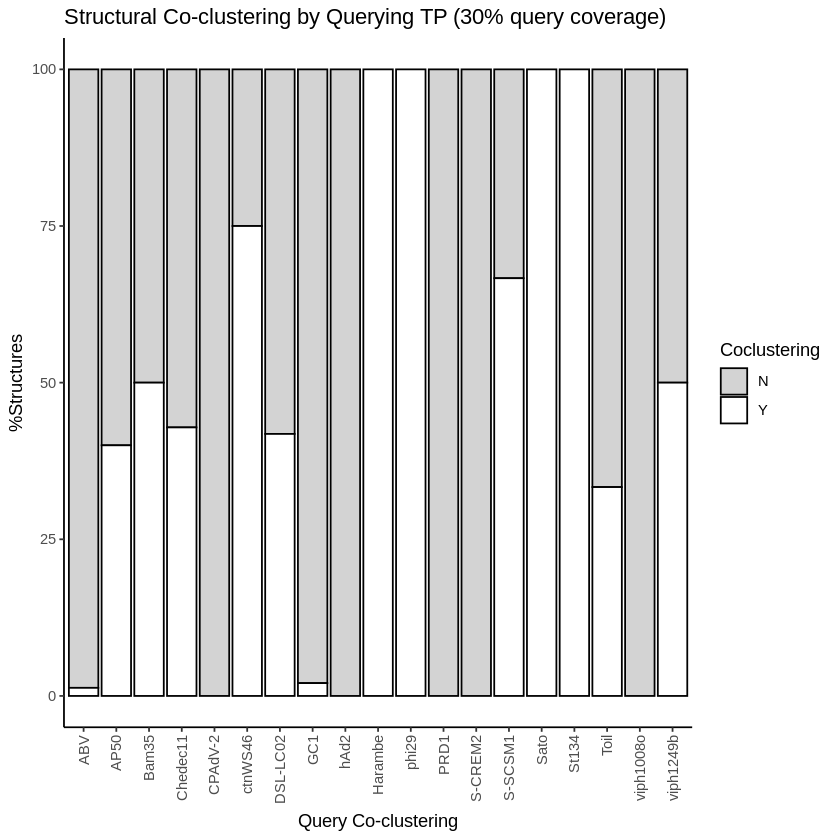

In [ ]:
# Query coverage impact on co-clustering success
library(ggplot2)
library(dplyr)

qTM_df <- read.csv("qTMcluster_coverage_90.csv", header = TRUE, sep=",")
df_clean <- qTM_df %>%
  filter(!is.na(TP_Query), Query_Coclustering %in% c("Y", "N"))

df_percent <- df_clean %>%
  group_by(TP_Query, Query_Coclustering) %>%
  summarise(Count = n()) %>%
  mutate(Percent = Count / sum(Count) * 100)

ggplot(df_percent, aes(x = TP_Query, y = Percent, fill = Query_Coclustering)) +
  geom_bar(stat = "identity", position = "stack", color = "black") +
  scale_fill_manual(values = c("Y" = "white", "N" = "lightgrey")) +
  labs(
    x = "Query Co-clustering",
    y = "%Structures",
    fill = "Coclustering",
    title = "Structural Co-clustering by Querying TP (90% query coverage)"
  ) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

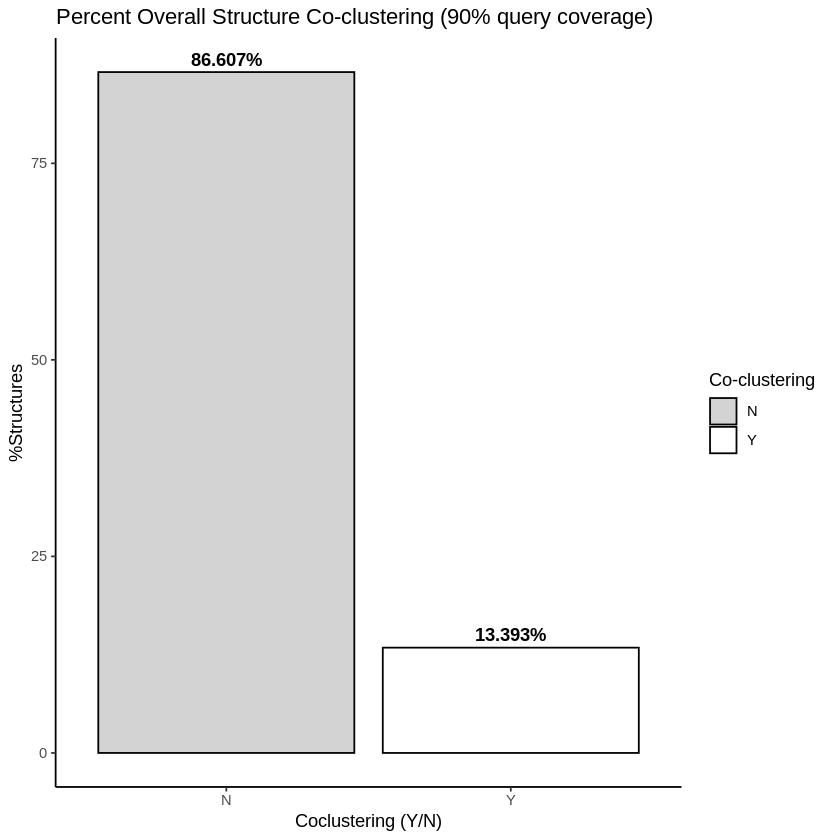

In [ ]:
library(dplyr)
library(ggplot2)

qTM_df <- read.csv("qTMcluster_coverage_90.csv", header = TRUE, sep=",")
df_clean <- qTM_df %>%
  filter(!is.na(Query_Coclustering), Query_Coclustering %in% c("Y", "N"))

df_summary <- df_clean %>%
  group_by(Query_Coclustering) %>%
  summarise(Count = n()) %>%
  mutate(Percent = Count / sum(Count) * 100)

ggplot(df_summary, aes(x = Query_Coclustering, y = Percent, fill = Query_Coclustering)) +
  geom_bar(stat = "identity", color = "black") +
  geom_text(aes(label = sprintf("%.3f%%", Percent)), vjust = -0.5 , fontface = "bold") +
  scale_fill_manual(values = c("Y" = "white", "N" = "lightgrey")) +
  labs(
    x = "Coclustering (Y/N)",
    y = "%Structures",
    title = "Percent Overall Structure Co-clustering (90% query coverage)",
    fill = "Co-clustering"
  ) +
  theme_classic()

#**COG**

V1 
1   U  
2   nan
3   nan
4   S  
5   M  
6   nan
7   nan
8   nan
9   L  
10  S  
11  C  
12  V  
13  L  
14  nan
15  nan
16  L  
17  V  
18  nan
19  -  
20  L  
21  L  
22  nan
23  nan
24  nan
25  S  
26  nan
27  nan
28  nan
29  nan
30  G  
⋮   ⋮  
293 L  
294 L  
295 nan
296 nan
297 L  
298 nan
299 nan
300 nan
301 nan
302 G  
303 L  
304 S  
305 S  
306 nan
307 nan
308 nan
309 L  
310 L  
311 nan
312 -  
313 S  
314 M  
315 nan
316 nan
317 nan
318 G  
319 O  
320 nan
321 nan
322 nan

V1 n 
2  L  79
3  S  22
4  G  15
5  M  10
6  -   5
7  K   5
8  V   4
9  P   2
10 C   1
11 F   1
12 O   1
13 T   1
14 U   1

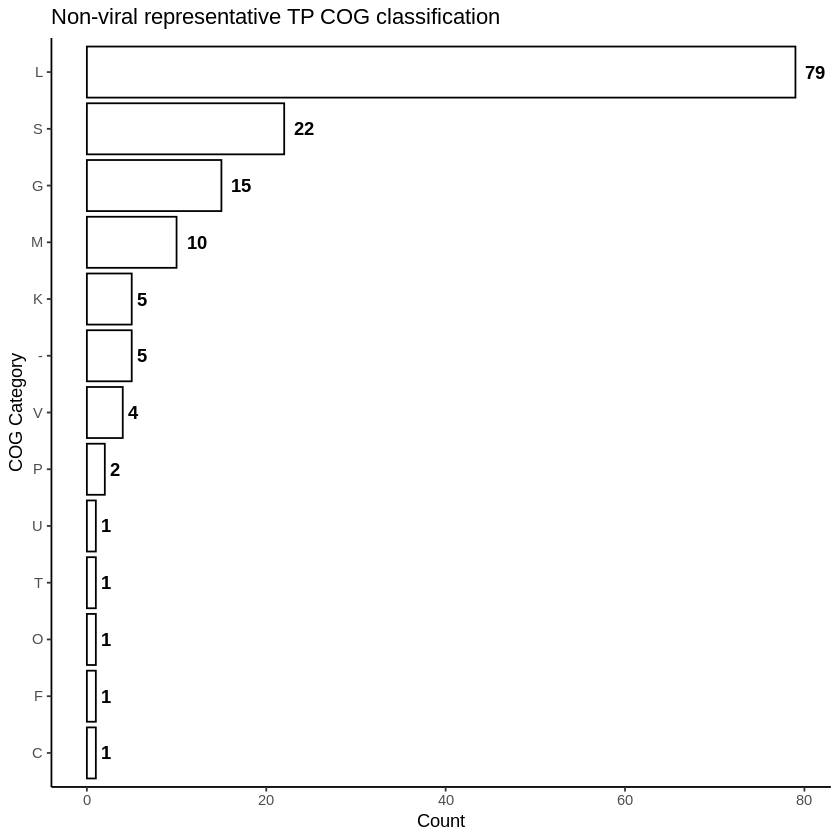

In [ ]:
library(dplyr)
library(tidyr)
library(ggplot2)
annotations <- read.csv("Non_viral_COG.txt", header = FALSE, sep="\t")
annotations

# Count occurrences of each unique description
description_counts <- annotations %>%
  count(V1, sort = TRUE)  # Count occurrences and sort

description_counts <- description_counts %>% filter(!is.na(V1))
description_counts <- description_counts[!(description_counts $V1 %in% "nan"),]
description_counts

cog_plot <- ggplot(description_counts, aes(x = reorder(factor(V1), n), y = n)) +
  geom_bar(stat = "identity", color = "black", fill = "white") +
  geom_text(aes(label = n), hjust = -0.5, fontface = "bold") +
  coord_flip() +
  labs(title = "Non-viral representative TP COG classification",
       x = "COG Category",
       y = "Count") +
  theme_classic()
cog_plot

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



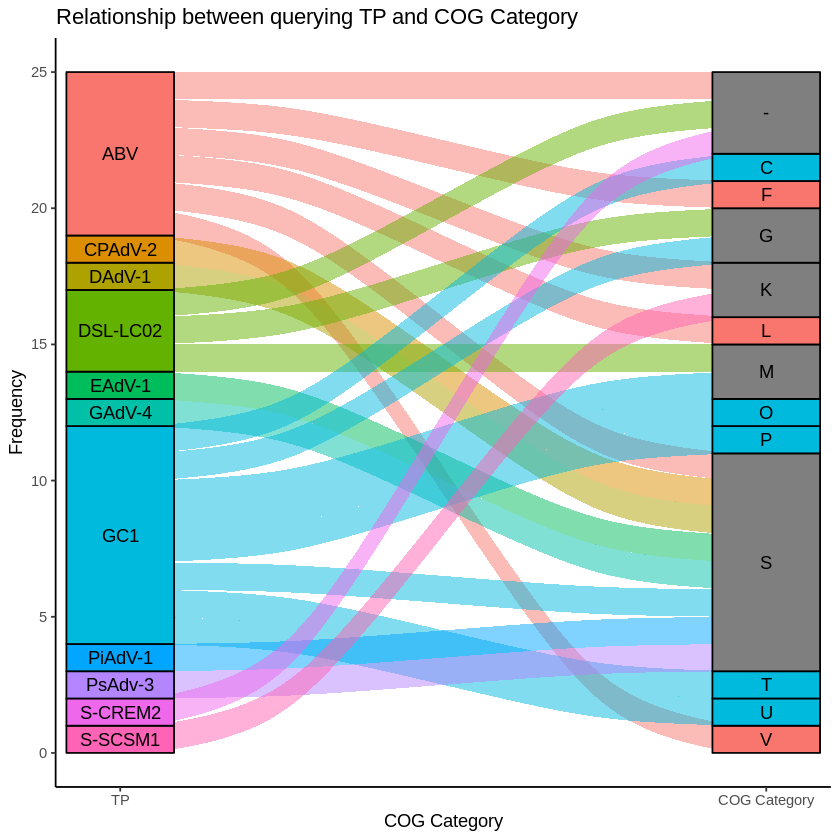

In [ ]:
install.packages("ggalluvial")
library(ggplot2)
library(ggalluvial)

df <- read.csv("Query_TP_eggNOG_COG.csv", stringsAsFactors = FALSE)
df <- df[!is.na(df$COG_Category) & df$COG_Category != "", ]

cog_alluvial <- ggplot(df,
       aes(axis1 = TP, axis2 = COG_Category)) +
  geom_alluvium(aes(fill = TP), width = 1/12) +
  geom_stratum(width = 1/6, aes(fill = TP), color = "black") +
  geom_text(stat = "stratum", aes(label = after_stat(stratum))) +
  scale_x_discrete(limits = c("TP", "COG Category"), expand = c(0.05, 0.05)) +
  labs(title = "Relationship between querying TP and COG Category",
       x = "COG Category",
       y = "Frequency") +
  theme_classic() +
  theme(legend.position = "none")
cog_alluvial

#**Phylogeny**

In [ ]:
install.packages(c("ape", "dendextend", "phytools"))
library(ape)
library(dendextend)
library(phytools)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘fastmatch’, ‘igraph’, ‘quadprog’, ‘maps’, ‘clusterGeneration’, ‘coda’, ‘combinat’, ‘DEoptim’, ‘doParallel’, ‘expm’, ‘foreach’, ‘mnormt’, ‘numDeriv’, ‘optimParallel’, ‘phangorn’, ‘scatterplot3d’


Loading required package: maps


Attaching package: ‘phytools’


The following object is masked from ‘package:dendextend’:

    untangle




In [ ]:
tree1 <- read.tree("Initial_Dataset_MSA_Tree.nwk.tre")
tree2 <- read.tree("Initial_Dataset_MSTA_Tree.nwk.tre")
tree2$tip.label <- sub("pdb$", "", tree2$tip.label)
tree2$tip.label <- sub("Av1$", "Av-1", tree2$tip.label)
tree2$tip.label <- sub("viph1008o$", "viph1080o", tree2$tip.label)
tree1$tip.label <- sub("BBJ21541.1$", "CrAdV-1", tree2$tip.label)






dend1 <- as.dendrogram(hclust(cophenetic(tree1)))
dend2 <- as.dendrogram(hclust(cophenetic(tree2)))

In [ ]:
# Get distance matrix and check for NA values
dist1 <- cophenetic(tree1)
dist2 <- cophenetic(tree2)

# Check for NAs
anyNA(dist1)  # Returns TRUE if there are missing values

# Keep only rows/cols without NA values (intersection of complete cases)
valid_tips1 <- rownames(dist1)[complete.cases(dist1)]
valid_tips2 <- rownames(dist2)[complete.cases(dist2)]

# Get shared valid tips only
common_tips <- intersect(valid_tips1, valid_tips2)

# Prune trees to those common tips
tree1_clean <- drop.tip(tree1, setdiff(tree1$tip.label, common_tips))
tree2_clean <- drop.tip(tree2, setdiff(tree2$tip.label, common_tips))

# Recompute distance matrices
dist1_clean <- cophenetic(tree1_clean)
dist2_clean <- cophenetic(tree2_clean)

# Convert to hclust and dendrogram
dend1 <- as.dendrogram(hclust(as.dist(dist1_clean)))
dend2 <- as.dendrogram(hclust(as.dist(dist2_clean)))

Warning message in dist.nodes(x):
“the tree has no branch length: fixing them to one.”


[1] FALSE

Warning message in dist.nodes(x):
“the tree has no branch length: fixing them to one.”


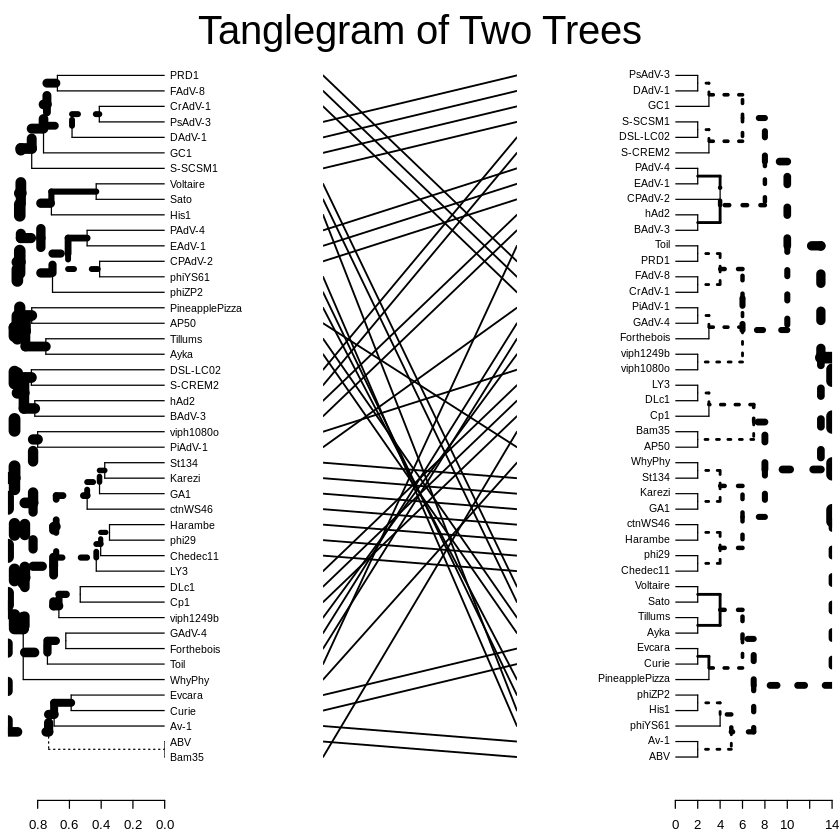

In [ ]:
tanglegram(dend1, dend2,
           main = "Tanglegram of Two Trees",
           lab.cex = 0.8,
           margin_inner = 10,
           lwd = 1.5,
           color_lines = TRUE)

Loading required namespace: colorspace



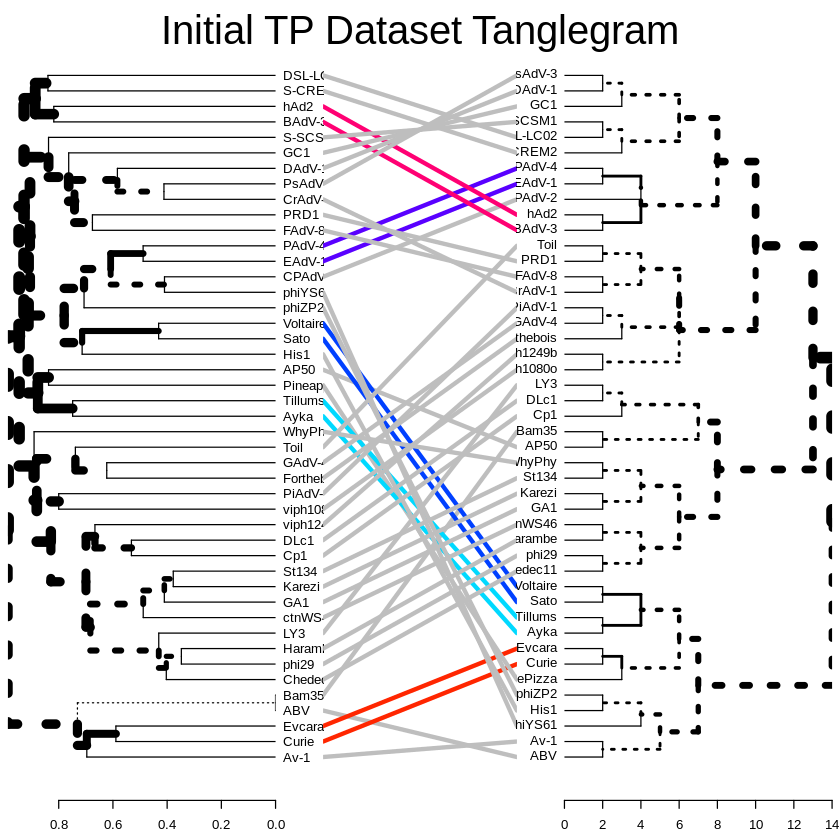

In [ ]:
dend_list <- dendlist(dend1, dend2)
dend_list <- untangle(dend_list, method = "step1side")
tanglegram(dend_list[[1]], dend_list[[2]],
           main = "Initial TP Dataset Tanglegram",
           common_subtrees_color_lines = TRUE)

In [ ]:
tree1_clean <- drop.tip(tree1, setdiff(tree1$tip.label, common_tips))
tree2_clean <- drop.tip(tree2, setdiff(tree2$tip.label, common_tips))

# Create distance matrices and hclust
dist1 <- cophenetic(tree1_clean)
dist2 <- cophenetic(tree2_clean)

dend1 <- as.dendrogram(hclust(as.dist(dist1)))
dend2 <- as.dendrogram(hclust(as.dist(dist2)))

# Draw tanglegram
dend_list <- dendlist(dend1, dend2) %>% untangle(method = "step1side")

Warning message in dist.nodes(x):
“the tree has no branch length: fixing them to one.”


Loading required namespace: colorspace



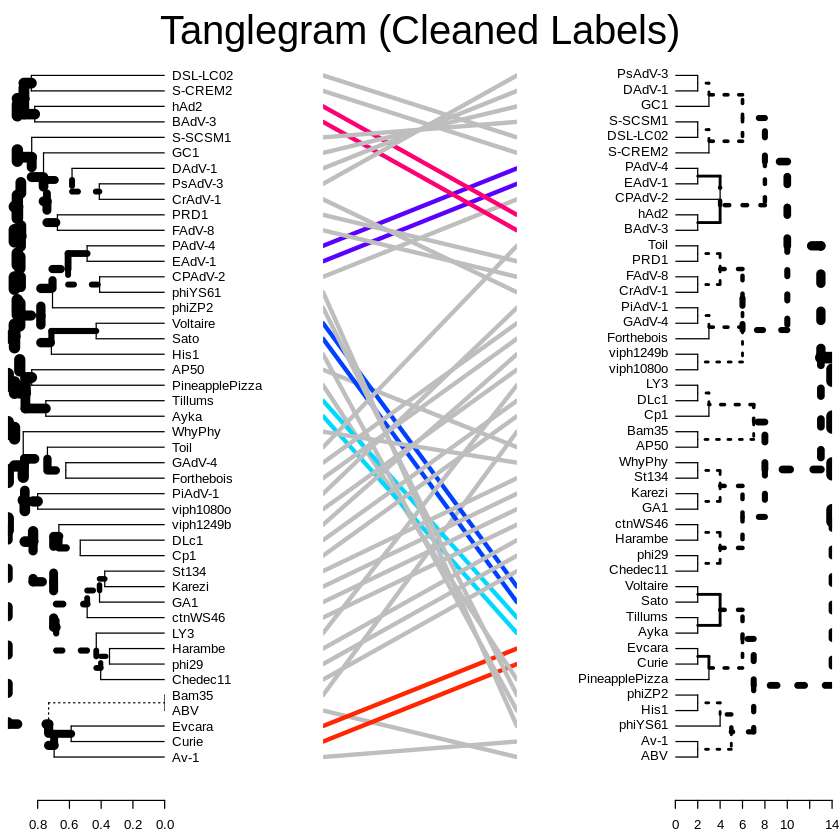

In [ ]:
tanglegram(dend_list[[1]], dend_list[[2]],
           main = "Tanglegram (Cleaned Labels)",
           margin_inner = 10,
           common_subtrees_color_lines = TRUE)

Rotating nodes to optimize matching...
Done.


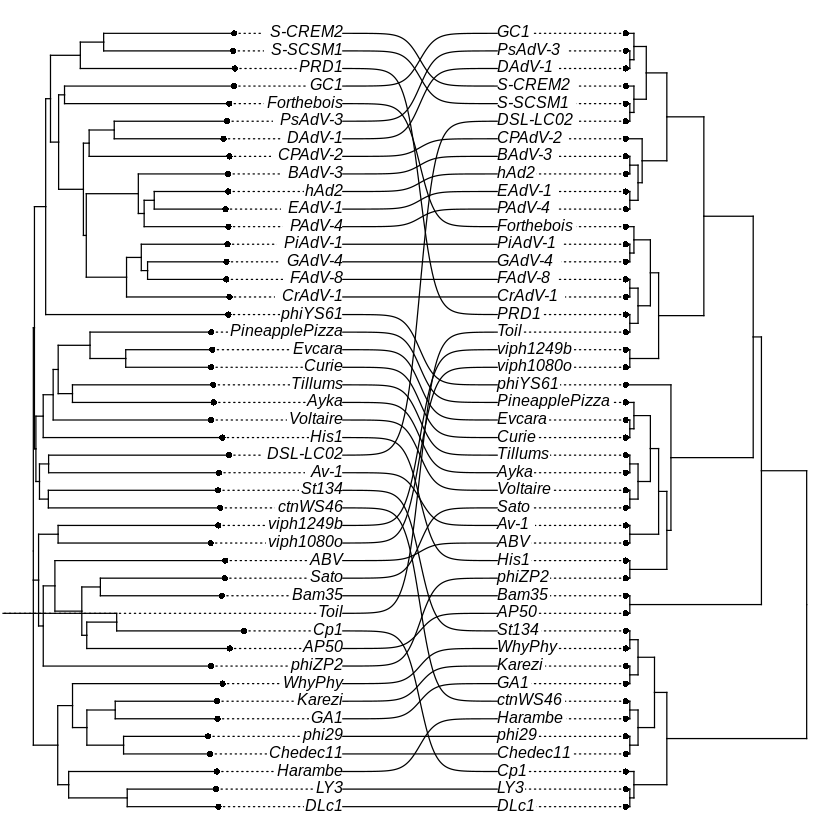

In [ ]:
tree1 <- read.tree("Initial_Dataset_MSA_Tree.nwk.tre")
tree2 <- read.tree("Initial_Dataset_MSTA_Tree.nwk.tre")

tree2$tip.label <- substr(tree2$tip.label, 1, nchar(tree2$tip.label) - 3)
tree2$tip.label[tree2$tip.label == "Av1"] <- "Av-1"
tree2$tip.label[tree2$tip.label == "viph1008o"] <- "viph1080o"
tree1$tip.label[tree1$tip.label == "BBJ21541.1"] <- "CrAdV-1"

# Ensure that both trees have exactly matching tip labels (otherwise, cophylo may fail)
common_tips <- intersect(tree1$tip.label, tree2$tip.label)
tree1 <- drop.tip(tree1, setdiff(tree1$tip.label, common_tips))
tree2 <- drop.tip(tree2, setdiff(tree2$tip.label, common_tips))

# Create a cophylo object for the tanglegram
cophy <- cophylo(tree1, tree2)

# Plot the tanglegram
plot(cophy, link.type="curved", link.lwd=1, link.lty="solid",
     gap=5, fsize=0.8, ftype="i")
#legend("bottomleft", legend=c("Sequence", "Structure"), col=c("black", "black"), lty=1, title="Tree Type")